# Boulder, Co, Python automatic variable generation file for Circular Buffer

# Import the library

# Follow the below link to install Geopanda


#https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

In [941]:
import time
start = time.time()
# First Run all these in command prompt cell to use geopanda
#conda create -n geo_env
#conda activate geo_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install python=3 geopandas

In [942]:
#conda activate geo_env


In [943]:
#python -m ipykernel install --user --name geo_env

In [944]:
import geopandas as gpd

In [945]:
import pandas as pd
from functools import reduce

In [946]:
import sys
'geopandas' in sys.modules

True

In [947]:
#!pip3 install matplotlib
import matplotlib.pyplot as plt

In [948]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd

In [949]:
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

# All inputs

# Inputr your Euclidean Buffer size or your GIS Customize buffer file Here

In [950]:
#buffer size in meter
size=1207.008 #in m, this input is also required for area conversation,1/10 mile==160.934m,1/4mile=402.336m, 0.5 mile=804.672, 3/4mile=1207.008m, 1 mile=1609.34,1.5 mile=2414.02, 2 mile=3218.69

In [951]:
# Import the non-fill buffer shape file
nf=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/all-aadbt-final-all.csv")
nf=nf[nf["region"]=="Boulder"]
nf=nf[nf["year"]==2019]
nf.head()

site_id                      site_name sensor_type  year   region  \
125  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
126  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
127  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
128  P004BOU            Folsom at South St.   permanent  2019  Boulder   
129  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

     travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
125             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
126             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
127             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
128             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
129             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

      longitude                                            comment  
125 -105.283132                                                NaN  
126 -105.263103                                                NaN  
127 -105.263773  obsolete OSM link parallel to street link (Id=...  
128 -105.263097                                                NaN  
129 -105.278436                                                NaN

In [952]:
c1=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/sites_all_study_area.csv")
c1=c1[c1["region"]=="Boulder"]
c1=c1[c1["in_2019"]==1]
c1=c1[['site_id','osm_id_sensor']]
c1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id  osm_id_sensor
199  P001BOU    385509341.0
200  P002BOU     43176757.0
201  P003BOU    439968204.0
202  P004BOU     43313642.0
203  P005BOU     46148772.0

In [953]:
# merge by site_id
nf1=pd.merge(nf,c1, right_on='site_id', left_on='site_id',how='inner')
nf1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor  
0    385509341.0  
1     43176757.0  
2    439968204.0  
3     43313642.0  
4     46148772.0

In [954]:
emerging_data=nf1.loc[:,['osm_id_sensor','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']]
emerging_data.columns=['osm_id','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']
emerging_data.head(3)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT     stv_adb  stv_c_adb  \
0  385509341.0  P001BOU   permanent  206.745402  102.547945  14.027397   
1   43176757.0  P002BOU   permanent  479.543452   29.739726  10.452055   
2  439968204.0  P003BOU   permanent  607.273809   52.397260  16.424658   

   stl_raw  
0    218.0  
1   5359.0  
2   4518.0

# Input the Strava Annual Network shape file here

In [955]:
strava=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/Boulder_Strava_modified.shp")
print(strava.crs)
# Define the current EPSG
strava = strava.set_crs("EPSG:4326")
# Let's take a copy of our layer
strava_proj = strava.copy()

# Reproject the geometries by replacing the values with projected ones
strava_proj = strava_proj.to_crs(epsg=2772)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


epsg:4326


# Input Bike share data here

In [956]:
#bs1=pd.read_csv("C:/Users/mxm5116/Desktop/Eugene Portland/Eugene-bike-share-trips-2019.csv")
#bs1.head(5)
#print(bs1.shape)

# Mention your Study Region here

In [957]:
region = "Boulder"

# Input OSM file here

In [958]:
# Input OSM land use shape file here
luse = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/landuse.shp")
# Define the current EPSG (normall for OSM this 3D EPSG code does not change)
lusec = luse.set_crs("EPSG:4326")


# Input OSM Natural shape file here
nature=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/natural.shp")
# Define the current EPSG
nature = nature.set_crs("EPSG:4326")

# Input OSM Point shape file here
pts=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/points.shp")
# Define the current EPSG
pts = pts.set_crs("EPSG:4326")

# Input the place of your study Area to calculate the intersection Density (city or county, Country)
#place="Oregon,USA"

# Input OSM road shape file here
road = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/roads.shp")
# Define the current EPSG
road = road.set_crs("EPSG:4326")

# Import OSM Building shape file to get CBD (City Hall)

In [959]:
# Input OSM road shape file here
building = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/buildings.shp")
print(building.crs)
# Define the current EPSG
building1 = building.set_crs("EPSG:4326")

epsg:4326


# Input NHGIS Block Group shape and CSV file here

In [960]:
# Input the block group shape file of your study area here
bg=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/CO_blck_grp_2018.shp")

# Input Race csv file here
race=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/race.csv")

# Input Age by Sex csv file here
gender=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/age by sex.csv")

# Input education csv file here
edu=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/Education attainment.csv")
# Import school enrollmemt 
scll=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/School Enrollment.csv")

# Input Median age csv file here
age=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/median_age.csv")

# Input Median House Hold income csv file here
income=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/median_hh_income.csv")

# Input House hold Type csv file here
hhdensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/household_type.csv")

# Input Population csv file here
pdensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/population.csv")

# Input Employment csv file here
edensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/employment.csv")

# Means of Transportation data
bike_commute=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/Bike_commute_co_2019_blck_grp.csv")

# Insert LEHD Job Data, WAC file

In [961]:
# Input job csv file here
Number_job=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/co_wac_S000_JT00_2018.csv")
Number_job.head(4)
# Input the block group shape file of your study area here
bg_lehd=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/tabblock2010_08_pophu.shp")


# Import Slope File here

In [962]:
eu = rasterio.open('F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/boulderc.img')

# Weather data needs to input three things
1. Chrome driver link (no need for kaggle as it is already set)
2. Dates you want to extract the data (format: yyyy-m, for example, 2019-4)
3. page of weather underground from where you want to extract the data

Please change the dates and page link only for other sttudy area at weather section which you will find before the Random forest variable selections.

WGS84 Latitude/Longitude: "EPSG:4326"

UTM Zones (North): "EPSG:32633"

UTM Zones (South): "EPSG:32733

# Input Study Area Boundary Shape file here

In [963]:
BA_all=gpd.read_file('http://web.pdx.edu/~jbroach/bike-data-fusion/study_area_boundaries.geojson')


In [964]:
BA_all

fid     region              comment  epsg_local  \
0    1    Boulder                 None        2772   
1    2     Eugene                 None        2839   
2    3       Bend                 None        2839   
3    4  Charlotte                 None        3358   
4    5     Dallas                 None        2845   
5    6   Portland  metro planning area        2838   

                                            geometry  
0  MULTIPOLYGON (((-105.64858 40.06198, -105.6480...  
1  MULTIPOLYGON (((-123.73473 43.94406, -123.7392...  
2  MULTIPOLYGON (((-121.40550 44.39315, -121.4025...  
3  MULTIPOLYGON (((-80.74046 35.37771, -80.73779 ...  
4  MULTIPOLYGON (((-96.52941 32.54528, -96.52964 ...  
5  MULTIPOLYGON (((-123.13045 45.47864, -123.1307...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

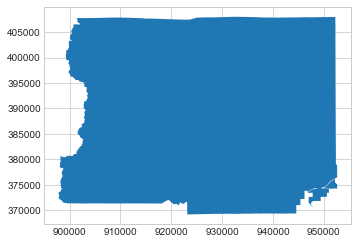

In [965]:
#region = "Eugene"
# select regional boundary and transform to local coords for buffering
local_poly = BA_all[BA_all['region'] == region]
local_srid = int(local_poly['epsg_local'])
local_poly = local_poly.to_crs(local_srid)
local_poly.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

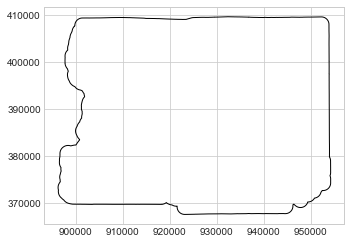

In [966]:
one_mile = 1609.34 # meters
pba = local_poly.buffer(one_mile)
pba.plot(color="none")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

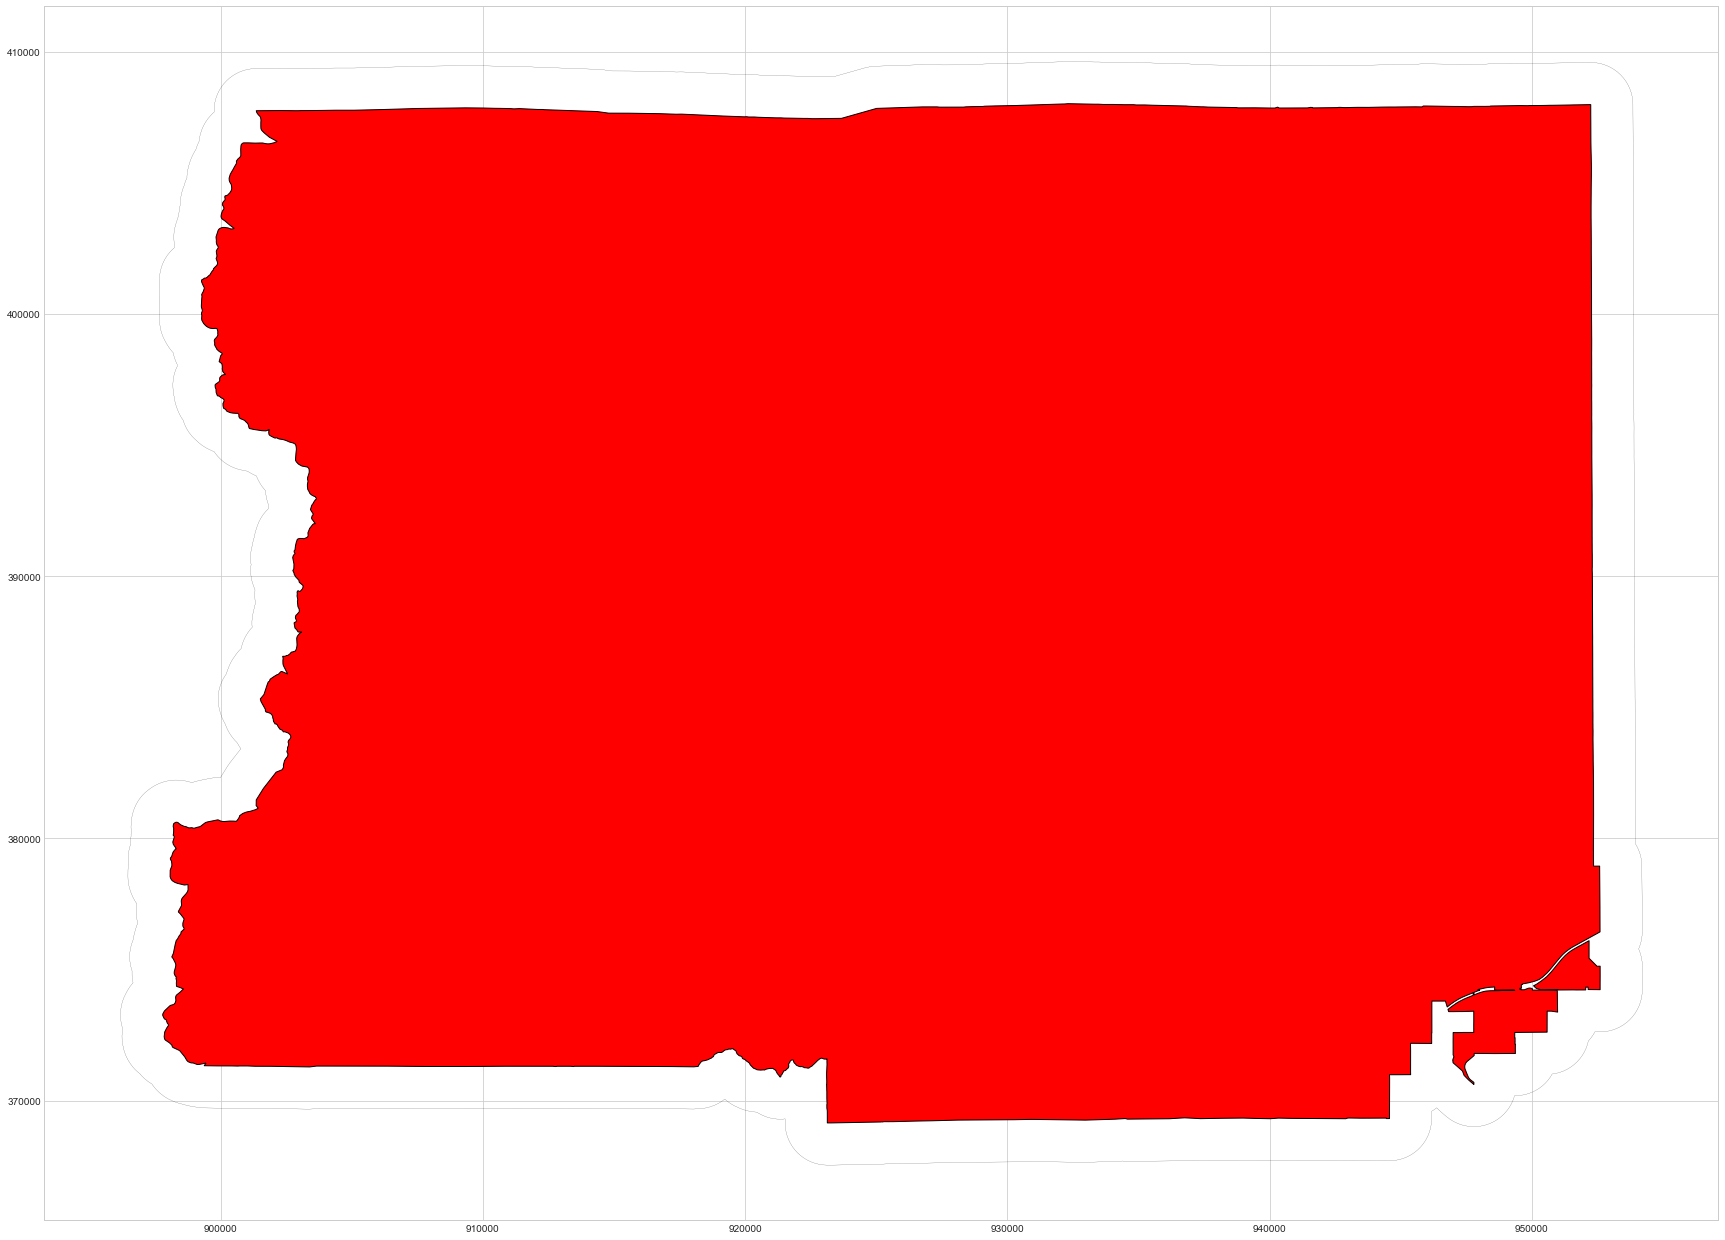

In [967]:
fig, ax = plt.subplots(figsize = (30,25)) 
local_poly.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 0.15,ax=ax) #Use your second dataframe

# Read the Eco and short term location file as gpd to get geometry

In [968]:
df = gpd.GeoDataFrame(
    nf1, geometry=gpd.points_from_xy(nf1.longitude, nf1.latitude))
df.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor                     geometry  
0    385509341.0  POINT (-105.28313 40.06877)  
1     43176757.0  POINT (-105.26310 40.01285)  
2    439968204.0  POINT (-105.26377 40.02420)  
3     43313642.0  POINT (-105.26310 40.01936)  
4     46148772.0  POINT (-105.27844 40.01738)

In [969]:
# set the co-ordinate system first
df = df.set_crs("EPSG:4211")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [970]:
print(df.crs)

EPSG:4211


In [971]:
# Let's take a copy of our layer
gdf0_proj = df.copy()

# Reproject the geometries by replacing the values with projected ones
eco_proj = gdf0_proj.to_crs(epsg=2772)
eco_proj.head()

site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor                       geometry  
0    385509341.0  POINT (932901.665 386478.901)  
1     43176757.0  POINT (934626.854 380273.771)  
2    439968204.0  POINT (934566.338 381533.917)  
3     43313642.0  POINT (934625.443 380996.780)  
4     46148772.0  POINT (933316.523 380773.375)

In [972]:
# We can now plot our ``GeoDataFrame``.
#eco_proj.plot(eco_proj, color='red',figsize=(10,10))
#plt.show()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [973]:
ecoshort0=eco_proj
#ecoshort0=pd.concat([eco_proj,short_proj],axis=0)
ecoshort0.head()

site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor                       geometry  
0    385509341.0  POINT (932901.665 386478.901)  
1     43176757.0  POINT (934626.854 380273.771)  
2    439968204.0  POINT (934566.338 381533.917)  
3     43313642.0  POINT (934625.443 380996.780)  
4     46148772.0  POINT (933316.523 380773.375)

In [974]:
#ecoshort0.reset_index(inplace=True)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [975]:
#ecoshort0[ecoshort0.index.duplicated()]

# Filter the location by Extended Study area Boundary

In [976]:
# Clip the data using GeoPandas clip
ecoshort = gpd.clip(ecoshort0, pba)
ecoshort.head()

site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor                       geometry  
0    385509341.0  POINT (932901.665 386478.901)  
1     43176757.0  POINT (934626.854 380273.771)  
2    439968204.0  POINT (934566.338 381533.917)  
3     43313642.0  POINT (934625.443 380996.780)  
4     46148772.0  POINT (933316.523 380773.375)

In [977]:
count_station=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [978]:
ecoshort=ecoshort.drop_duplicates(subset='osm_id_sensor')
ecoshort.head()

site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor                       geometry  
0    385509341.0  POINT (932901.665 386478.901)  
1     43176757.0  POINT (934626.854 380273.771)  
2    439968204.0  POINT (934566.338 381533.917)  
3     43313642.0  POINT (934625.443 380996.780)  
4     46148772.0  POINT (933316.523 380773.375)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

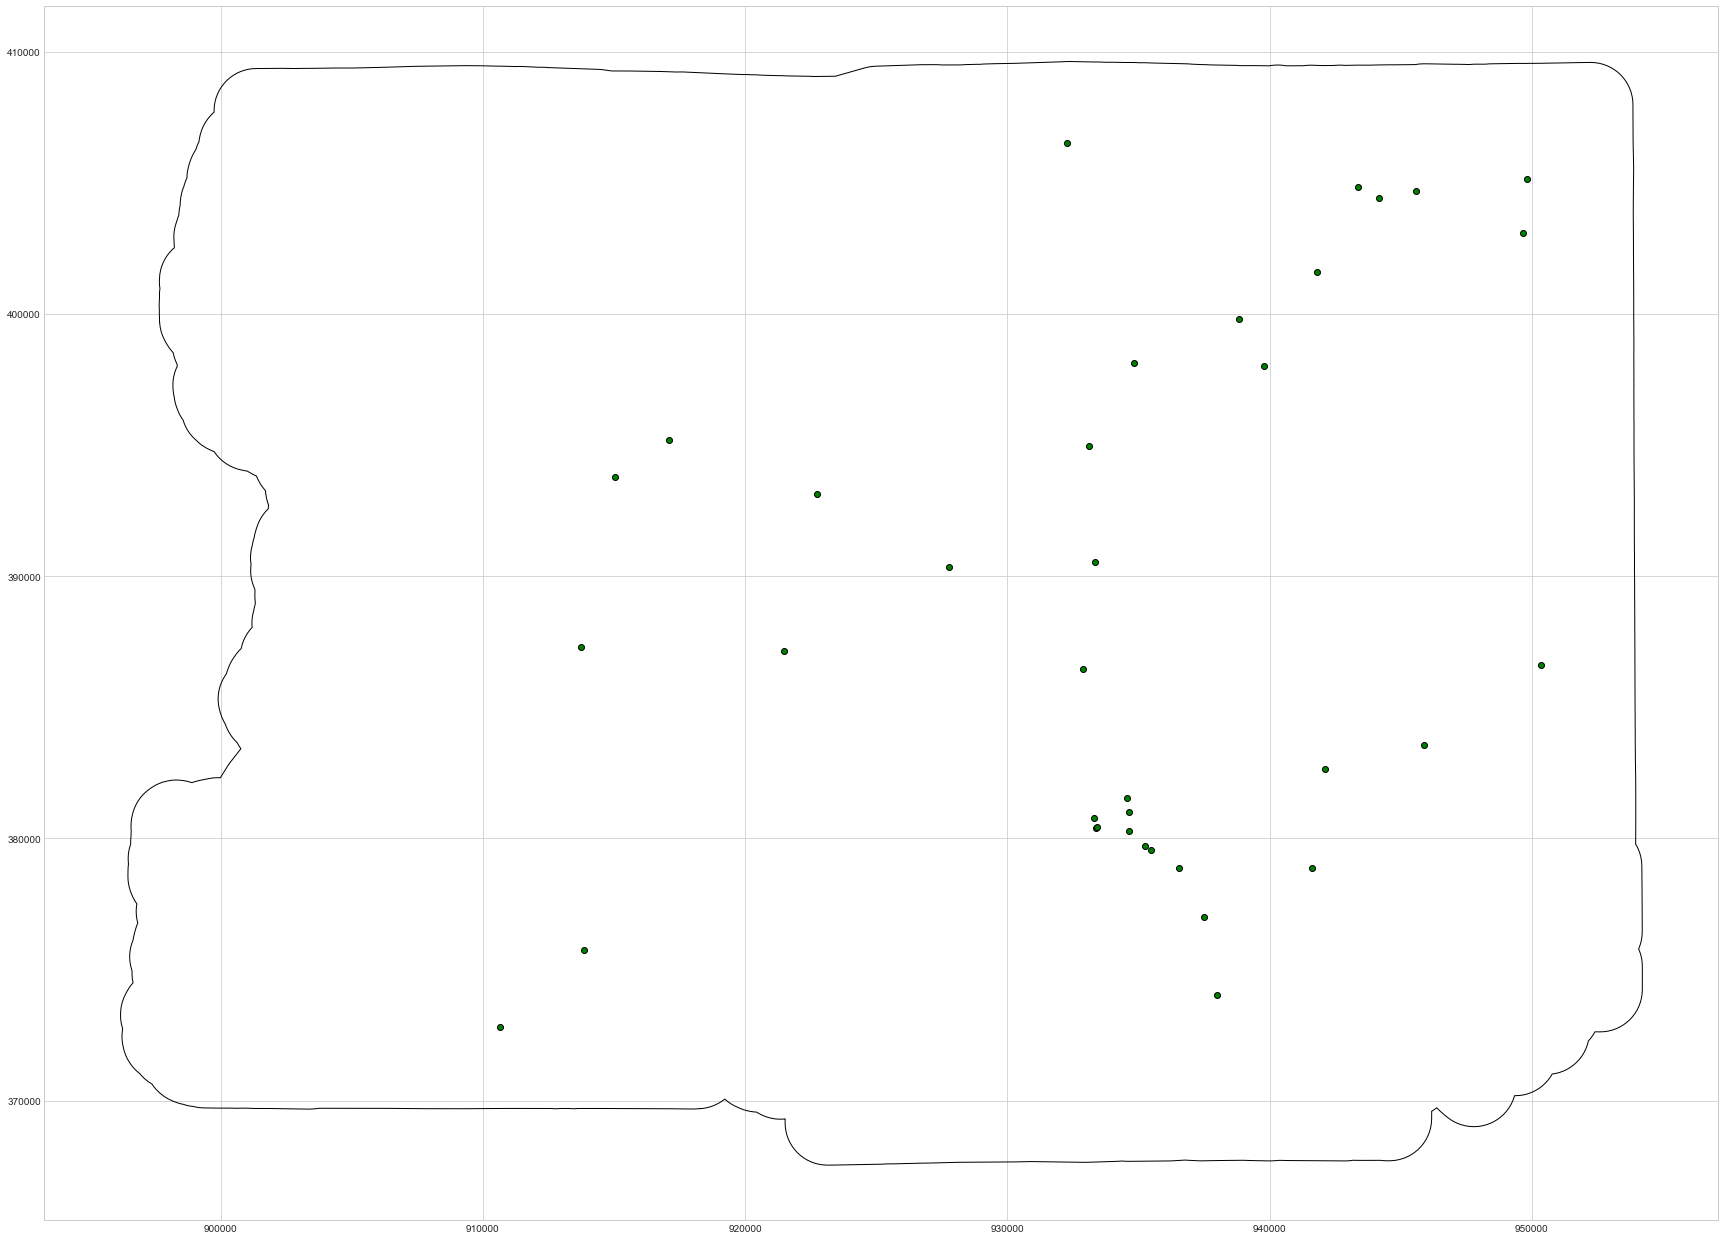

In [979]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="green",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

# geopanda buffer function: https://geopandas.org/docs/user_guide/geometric_manipulations.html

In [980]:
# Buffer file
#gdf1=nf3


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [981]:
gdf1 = ecoshort.copy()
gdf1['geometry'] = gdf1['geometry'].buffer(size)
gdf1.head()

site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor                                           geometry  
0    385509341.0  POLYGON ((934108.673 386478.901, 934102.861 38...  
1     43176757.0  POLYGON ((935833.862 380273.771, 935828.050 38...  
2    439968204.0  POLYGON ((935773.346 381533.917, 935767.534 38...  
3     43313642.0  POLYGON ((935832.451 380996.780, 935826.639 38...  
4     46148772.0  POLYGON ((934523.531 380773.375, 934517.719 38...

In [982]:
#conda install -c conda-forge contextily #install in your geo_env using command prompt 

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#https://geopandas.org/gallery/plotting_basemap_background.html

In [983]:
import contextily as ctx

In [984]:
print(gdf1.crs)

epsg:2772


In [985]:
# Insert City Specific EPSG here to convert 3D to 2D map,for exaple, state plane system EPSG =2838 for Portland
# set the co-ordinate system first
gdfm = gdf1.set_crs("EPSG:2772") # provided by PSU
gdfm = gdfm.to_crs(epsg=3857) # This EPSG just for ploting

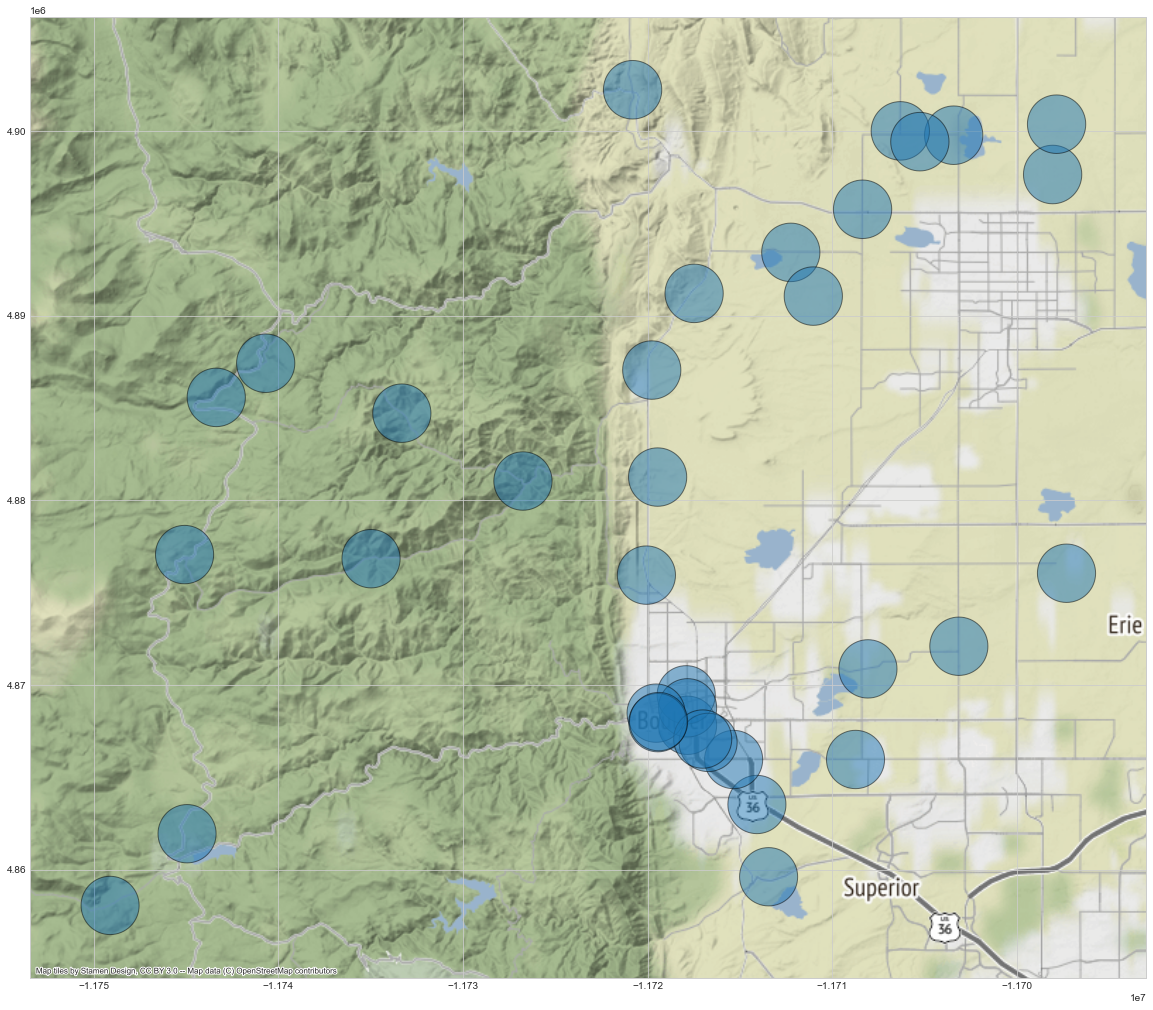

In [986]:
ax = gdfm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# ploting code: http://darribas.org/gds15/content/labs/lab_03.html

# Calculate O, D and OD line

In [987]:
#bs1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [988]:
#bs1['StartLatitude'] = bs1['StartLatitude'].apply(pd.to_numeric, errors='coerce')
#bs1['StartLongitude'] = bs1['StartLongitude'].apply(pd.to_numeric, errors='coerce')
#bs1['EndLatitude'] = bs1['EndLatitude'].apply(pd.to_numeric, errors='coerce')
#bs1['EndLongitude'] = bs1['EndLongitude'].apply(pd.to_numeric, errors='coerce')

In [989]:
#bs3=bs1[bs1['StartLatitude'].notna()]
#bs3.shape

# BS Origin

In [990]:
# Origin
#bso = gpd.GeoDataFrame(bs3, geometry=gpd.points_from_xy(bs3.StartLongitude, bs3.StartLatitude))
#bso=bso.loc[:,['RouteID','StartLatitude','StartLongitude','geometry']]
#bso.head(5)

In [991]:
# set the co-ordinate system first
#bso1 = bso.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
#bso1_proj = bso1.to_crs(epsg=2772)
#bso1_proj.head(5)

In [992]:
# Clip the data using GeoPandas clip
#bso1_clip = gpd.clip(bso1_proj, gdf1)
#bso1_clip.head(5)

In [993]:
 #int_bso=gpd.overlay(gdf1, bso1_clip, how='intersection', make_valid=True, keep_geom_type=False)
 #int_bso.head(5)

In [994]:
#int_bso.shape

In [995]:
#int_bso.geometry.plot()
#ax = gdf1.plot(figsize=(40, 30))
#int_bso.geometry.plot(color="red",edgecolor='k',ax=ax)

In [996]:
#output_origin=int_bso.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
#output_origin.columns=["osm_id","Bike Share Origin"]
#output_origin.head()

# BS destination

In [997]:
# Destination
#bsd = gpd.GeoDataFrame(
#    bs3, geometry=gpd.points_from_xy(bs3.EndLongitude, bs3.EndLatitude))
#bsd=bsd.loc[:,['RouteID','EndLatitude','EndLongitude','geometry']]
#bsd.head(5)

In [998]:
# set the co-ordinate system first
#bsd1 = bsd.set_crs("EPSG:4211")
# Reproject the geometries by replacing the values with projected ones
#bsd1_proj = bsd1.to_crs(epsg=2772)
#bsd1_proj.head(5)

In [999]:
# Clip the data using GeoPandas clip
#bsd1_clip = gpd.clip(bsd1_proj, gdf1)
#bsd1_clip.head(5)

In [1000]:
#int_bsd=gpd.overlay(gdf1, bsd1_clip, how='intersection', make_valid=True, keep_geom_type=False)
#int_bsd.head(5)

In [1001]:
#int_bsd.shape

In [1002]:
#int_bsd.geometry.plot()
#plotting    
#ax = gdf1.plot(figsize=(40, 30))
#int_bsd.geometry.plot(color="red",edgecolor='k',ax=ax)

In [1003]:
#output_destination=int_bsd.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
#output_destination.columns=["osm_id","Bike Share Destination"]
#output_destination.head()

# Bike Share OD line Crossing

In [1004]:
#https://gis.stackexchange.com/questions/303615/creating-linestring-and-length-of-linestring-from-multiple-latlon-points-for-eac
#import shapely.geometry as geom
#bs_all_od=bs3.copy()
#bs_all_od['geometry'] = bs_all_od.apply(lambda x: geom.LineString([(x['StartLongitude'], x['StartLatitude']) , (x['EndLongitude'], x['EndLatitude'])]), axis = 1)
#bs_all_od.head(5)

In [1005]:
# exclude the points outside of Portland
#bs_all_od1=bs_all_od[(bs_all_od.StartLongitude<=-122)&(bs_all_od.StartLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLongitude<=-122)&(bs_all_od1.EndLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.StartLatitude>=45)&(bs_all_od1.StartLatitude<=46)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLatitude>=45)&(bs_all_od1.EndLatitude<=46)]
#bs_all_od1.head(5)

In [1006]:
#print(bs_all_od.crs)

In [1007]:
#print(bs_all_od1.info())

In [1008]:
#bs_all_od2 = gpd.GeoDataFrame(bs_all_od, geometry='geometry', crs={'init': 'epsg:4211'})
#bs_all_od2.head(5)

In [1009]:
#print(bs_all_od2.crs)

In [1010]:
#print(bs_all_od2.info())

In [1011]:
# set the co-ordinate system first
#bs_all_od2 = bs_all_od1.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
#bs_all_od2_proj = bs_all_od2.to_crs(epsg=2772)
#bs_all_od2_proj.head(5)

In [1012]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#bs_all_od2_proj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [1013]:
#spj = gpd.sjoin( bs_all_od2_proj,gdf1, how="inner", op='intersects')

In [1014]:
# Clip the data using GeoPandas clip
#odc1_clip = gpd.clip(bs_all_od2_proj,gdf1)
#odc1_clip.head(5)

In [1015]:
#int_odl=gpd.overlay(gdf1, odc1_clip, how='intersection', make_valid=True, keep_geom_type=False)
#int_odl.head(5)

In [1016]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#spj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [1017]:
#output_odl=spj.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
#output_odl.columns=["osm_id","Bike Share Crossing"]
#output_odl.head()

# Now import land use shape file

In [1018]:
#luse = gpd.read_file("../input/osm-data/landuse.shp")
luse.head(5)

osm_id                  name        type  \
0  23550375  Loveland Burial Park    cemetery   
1  27856736                  None       grass   
2  27856807                  None       grass   
3  33119314                  None       grass   
4  33139710                  None  industrial   

                                            geometry  
0  POLYGON ((-105.07750 40.41442, -105.07318 40.4...  
1  POLYGON ((-105.00569 39.74652, -105.00496 39.7...  
2  POLYGON ((-105.00419 39.74621, -105.00442 39.7...  
3  POLYGON ((-104.99735 40.23960, -104.99584 40.2...  
4  POLYGON ((-104.92429 39.83556, -104.92433 39.8...

# Define and then Convert the co-ordinate system

In [1019]:
# set the co-ordinate system first
#lusec = luse.set_crs("EPSG:4326")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1020]:
# Let's take a copy of our layer
luse_proj = lusec.copy()

# Reproject the geometries by replacing the values with projected ones
luse_proj = luse_proj.to_crs(epsg=2772)
luse_proj.head(5)

osm_id                  name        type  \
0  23550375  Loveland Burial Park    cemetery   
1  27856736                  None       grass   
2  27856807                  None       grass   
3  33119314                  None       grass   
4  33139710                  None  industrial   

                                            geometry  
0  POLYGON ((950261.302 424919.850, 950627.334 42...  
1  POLYGON ((956768.823 350793.686, 956831.389 35...  
2  POLYGON ((956897.910 350759.976, 956878.082 35...  
3  POLYGON ((957173.271 405544.031, 957302.004 40...  
4  POLYGON ((963680.981 360722.147, 963677.981 36...

# Visualize

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

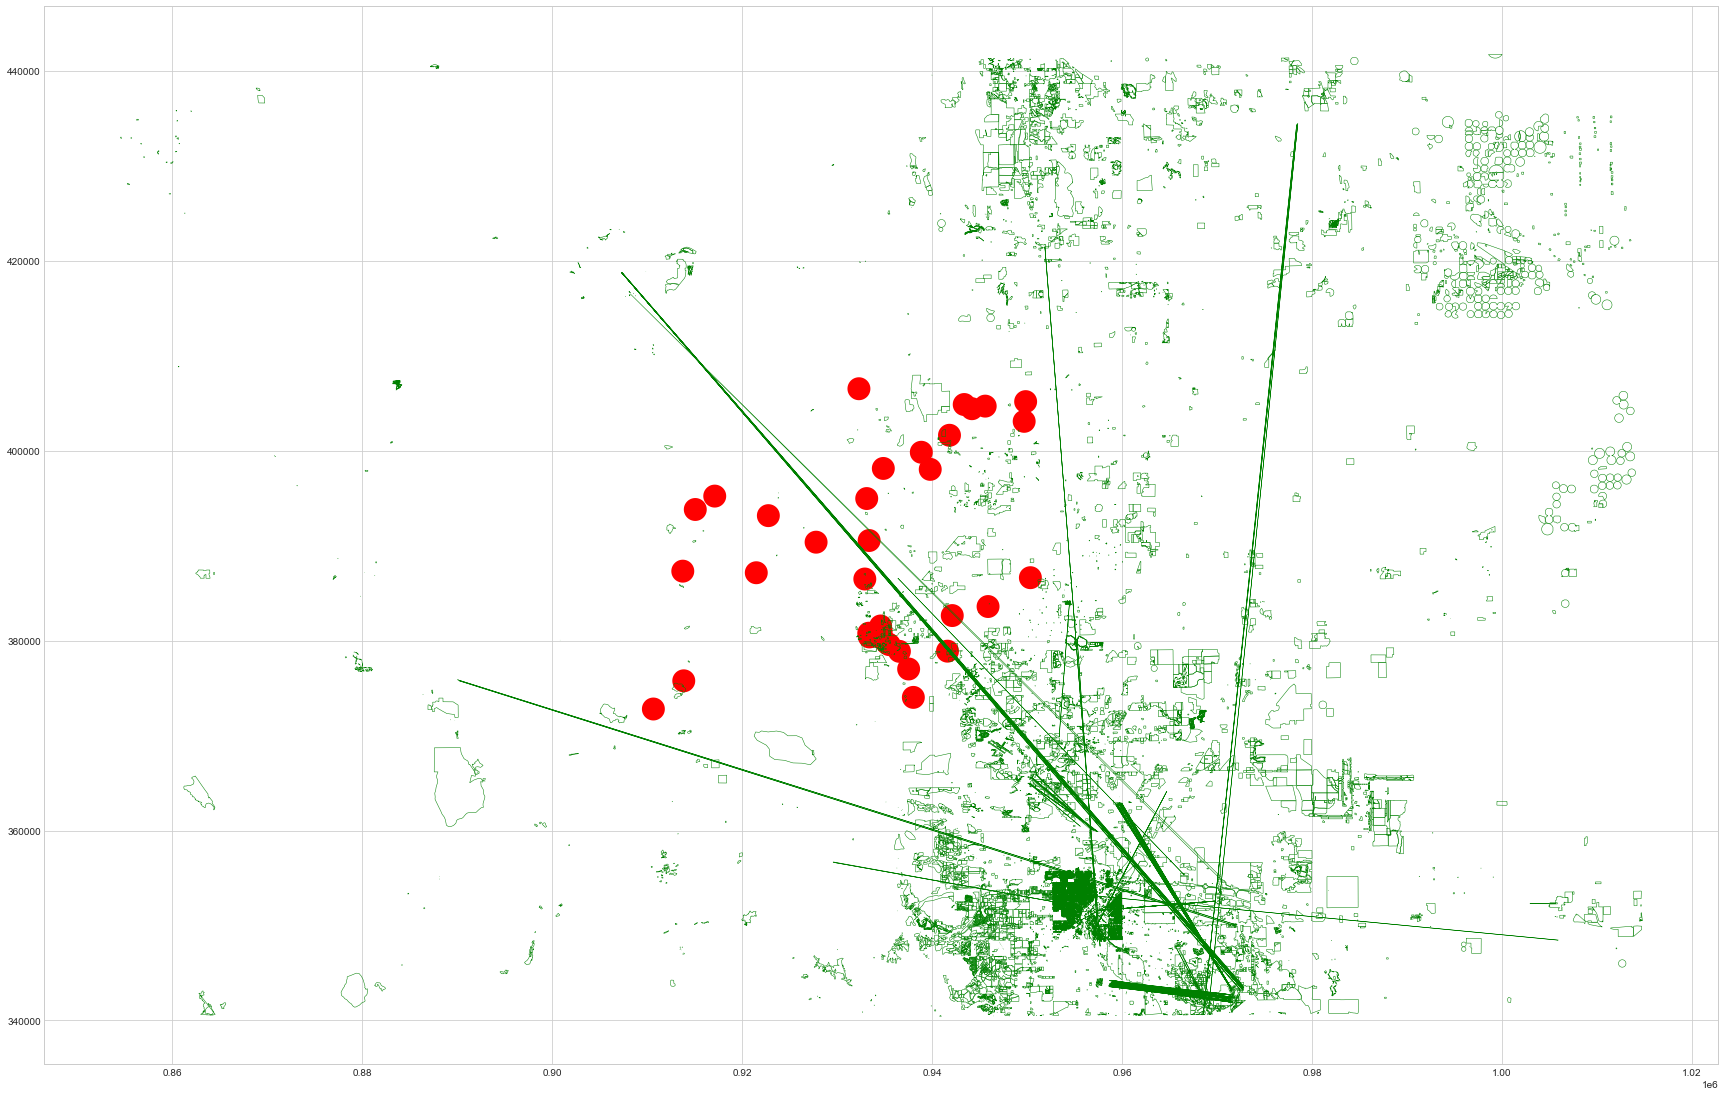

In [1021]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
luse_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# Now clip landuse with buffer

In [1022]:
import os 
from shapely.geometry import Point
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1023]:
#!pip install Rtree
#!pip install pygeos
#!pip install ujson
#!pip install wheel

In [1024]:
#luse_proj.exterior.type

In [1025]:
#gdf1.exterior.type

In [1026]:
#luse_proj.exterior.is_valid

In [1027]:
#gdf1.exterior.is_valid

In [1028]:
# Avoid this error- TopologyException: Input geom 0 is invalid: Self-intersection at 2307899.6553931381 208383.49467431975. Do the followings
luse_proj["geometry2"]=luse_proj.geometry.buffer(0)
# Now drop geometry column and rename geometry 2 equal to geometry again
luse_proj=luse_proj.drop(["geometry"],axis=1)
luse_proj.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
luse_proj.head(5)

osm_id                  name        type  \
0  23550375  Loveland Burial Park    cemetery   
1  27856736                  None       grass   
2  27856807                  None       grass   
3  33119314                  None       grass   
4  33139710                  None  industrial   

                                            geometry  
0  POLYGON ((950261.302 424919.850, 950627.334 42...  
1  POLYGON ((956768.823 350793.686, 956775.894 35...  
2  POLYGON ((956897.910 350759.976, 956878.082 35...  
3  POLYGON ((957173.271 405544.031, 957071.255 40...  
4  POLYGON ((963680.981 360722.147, 963703.751 36...

In [1029]:
# Clip the data using GeoPandas clip
buffer_clip = gpd.clip(luse_proj, gdf1)
buffer_clip.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id        name              type  \
71    46371892        None  recreation_groun   
98    48250632        None  recreation_groun   
99    48250639        None  recreation_groun   
320   95605432        None               yes   
333  101272604  The Armory      construction   

                                              geometry  
71   POLYGON ((934240.249 379704.047, 934240.266 37...  
98   POLYGON ((936768.390 379632.572, 936739.864 37...  
99   POLYGON ((937150.339 379647.166, 937063.772 37...  
320  POLYGON ((945978.519 383865.194, 945996.311 38...  
333  POLYGON ((933005.472 385699.484, 933024.930 38...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


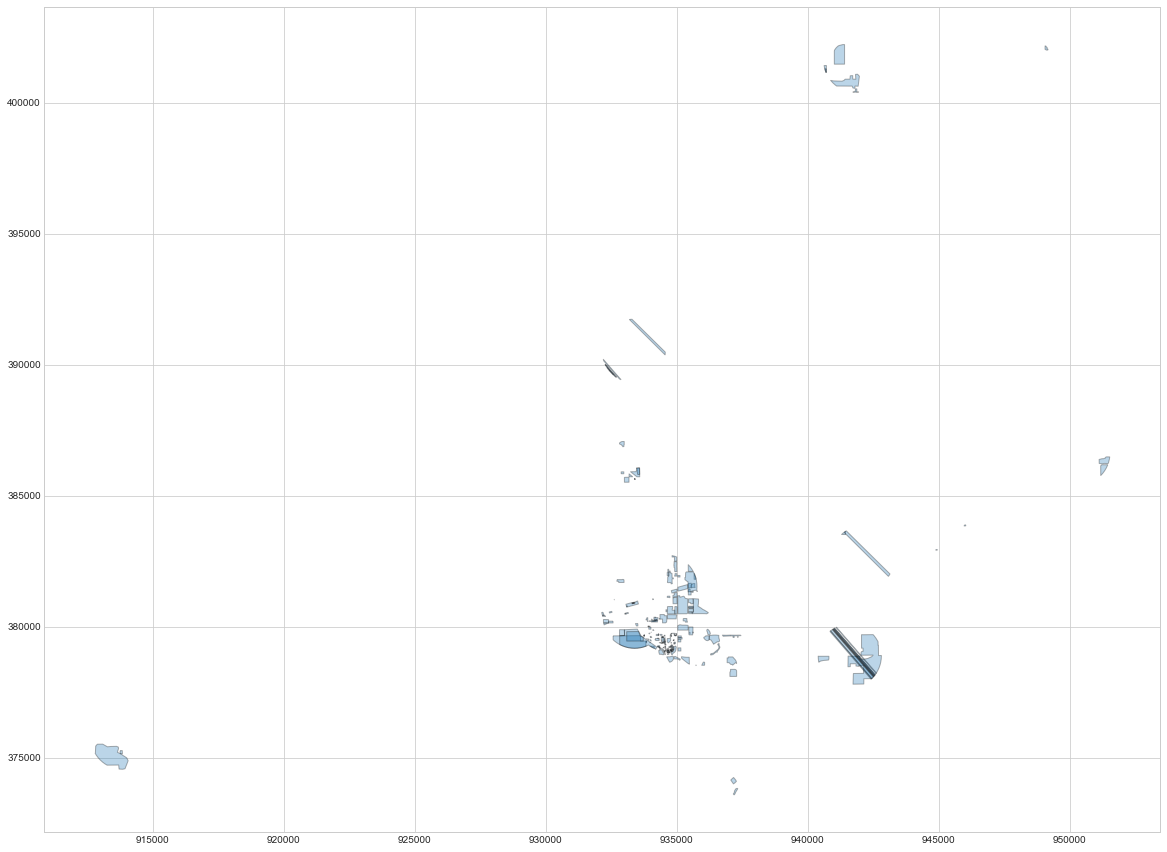

In [1030]:
ax = buffer_clip.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect the clipped area with Buffer ID

In [1031]:
 intdata=gpd.overlay(gdf1, buffer_clip, how='intersection', make_valid=True, keep_geom_type=False)
 intdata.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
2             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
3             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
4             3.0  206.745402  102.547945  14.027397    218.0  40.068772   

    longitude comment  osm_id_sensor     osm_id                     name  \
0 -105.283132     NaN    385509341.0  101272604               The Armory   
1 -105.283132     NaN    385509341.0  423505303  Gateway Park Fun Center   
2 -105.283132     NaN    385509341.0  477639343                     None   
3 -105.283132     NaN    385509341.0  697170866                     None   
4 -105.283132     NaN    385509341.0  797051864                     None   

               type                                           geometry  
0      construction  POLYGON ((933024.930 385700.531, 933175.615 38...  
1  recreation_groun  POLYGON ((933584.386 385814.393, 933586.276 38...  
2             grass  POLYGON ((933568.315 385810.244, 933559.394 38...  
3       residential  POLYGON ((932877.208 385840.747, 932876.860 38...  
4        industrial  POLYGON ((932921.578 386900.278, 932899.175 38...

In [1032]:
intdata["Area"]=intdata["geometry"].area*10.76 # in ft2
intdata.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
2             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
3             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
4             3.0  206.745402  102.547945  14.027397    218.0  40.068772   

    longitude comment  osm_id_sensor     osm_id                     name  \
0 -105.283132     NaN    385509341.0  101272604               The Armory   
1 -105.283132     NaN    385509341.0  423505303  Gateway Park Fun Center   
2 -105.283132     NaN    385509341.0  477639343                     None   
3 -105.283132     NaN    385509341.0  697170866                     None   
4 -105.283132     NaN    385509341.0  797051864                     None   

               type                                           geometry  \
0      construction  POLYGON ((933024.930 385700.531, 933175.615 38...   
1  recreation_groun  POLYGON ((933584.386 385814.393, 933586.276 38...   
2             grass  POLYGON ((933568.315 385810.244, 933559.394 38...   
3       residential  POLYGON ((932877.208 385840.747, 932876.860 38...   
4        industrial  POLYGON ((932921.578 386900.278, 932899.175 38...   

            Area  
0  353693.765821  
1  656717.505985  
2  255564.247345  
3   80238.192821  
4  257519.221547

#https://geopandas.org/docs/user_guide/set_operations.html

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

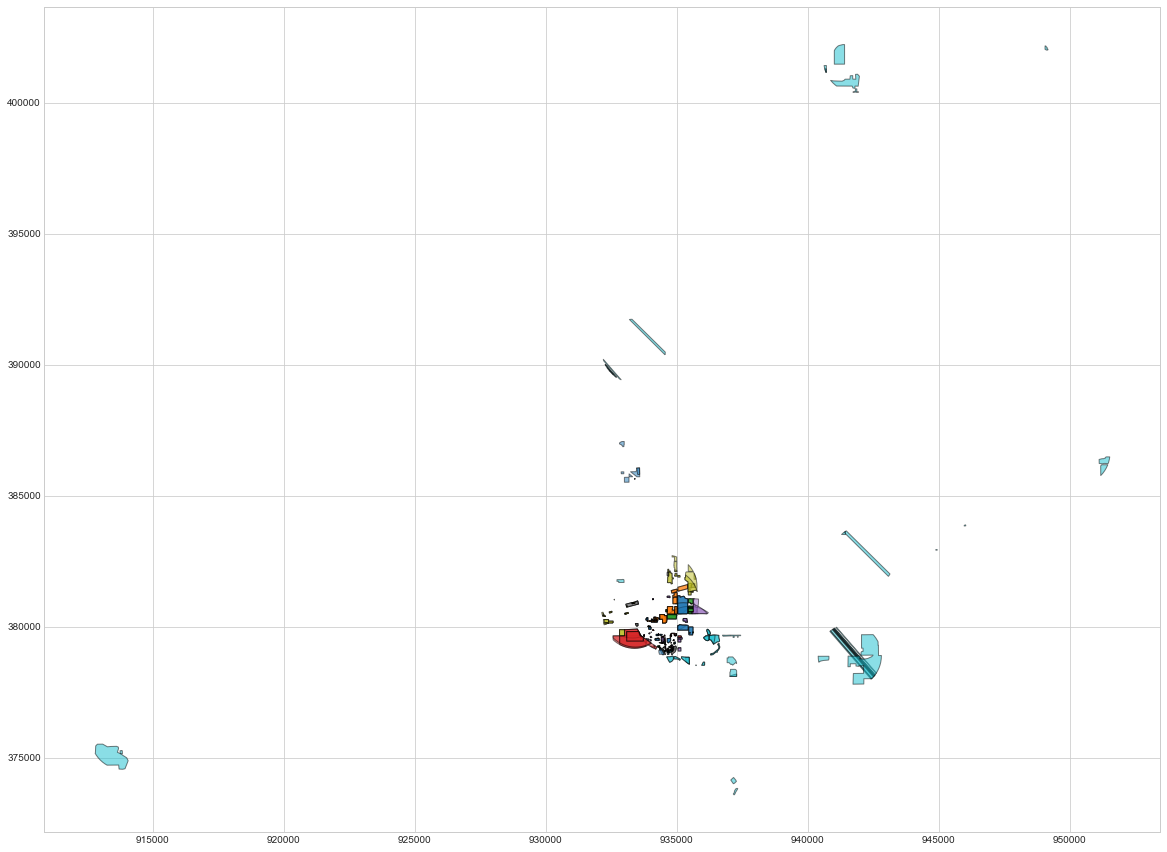

In [1033]:
intdata.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

# Aggregate data by ID

#https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html

In [1034]:
output_landuse=intdata.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_landuse.columns=['osm_id','type','Area']
output_landuse.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id         type          Area
0  17022948.0   commercial  5.187832e+05
1  17022948.0  residential  1.569979e+06
2  17025704.0     cemetery  1.084545e+05
3  17025704.0  residential  7.936798e+06
4  33869417.0   allotments  9.008640e+03

In [1035]:
# Calculate commercial area
commercial  = intdata[intdata['type'].str.contains('commercial')]
output_commercial = commercial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_commercial.columns=['osm_id','Commercial Area ']
output_commercial.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Commercial Area 
0  17022948.0      5.187832e+05
1  33869417.0      4.375933e+04
2  37998424.0      1.415052e+06
3  43176757.0      5.317593e+05
4  43313642.0      1.124118e+06

In [1036]:
gdf1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor                                           geometry  
0    385509341.0  POLYGON ((934108.673 386478.901, 934102.861 38...  
1     43176757.0  POLYGON ((935833.862 380273.771, 935828.050 38...  
2    439968204.0  POLYGON ((935773.346 381533.917, 935767.534 38...  
3     43313642.0  POLYGON ((935832.451 380996.780, 935826.639 38...  
4     46148772.0  POLYGON ((934523.531 380773.375, 934517.719 38...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

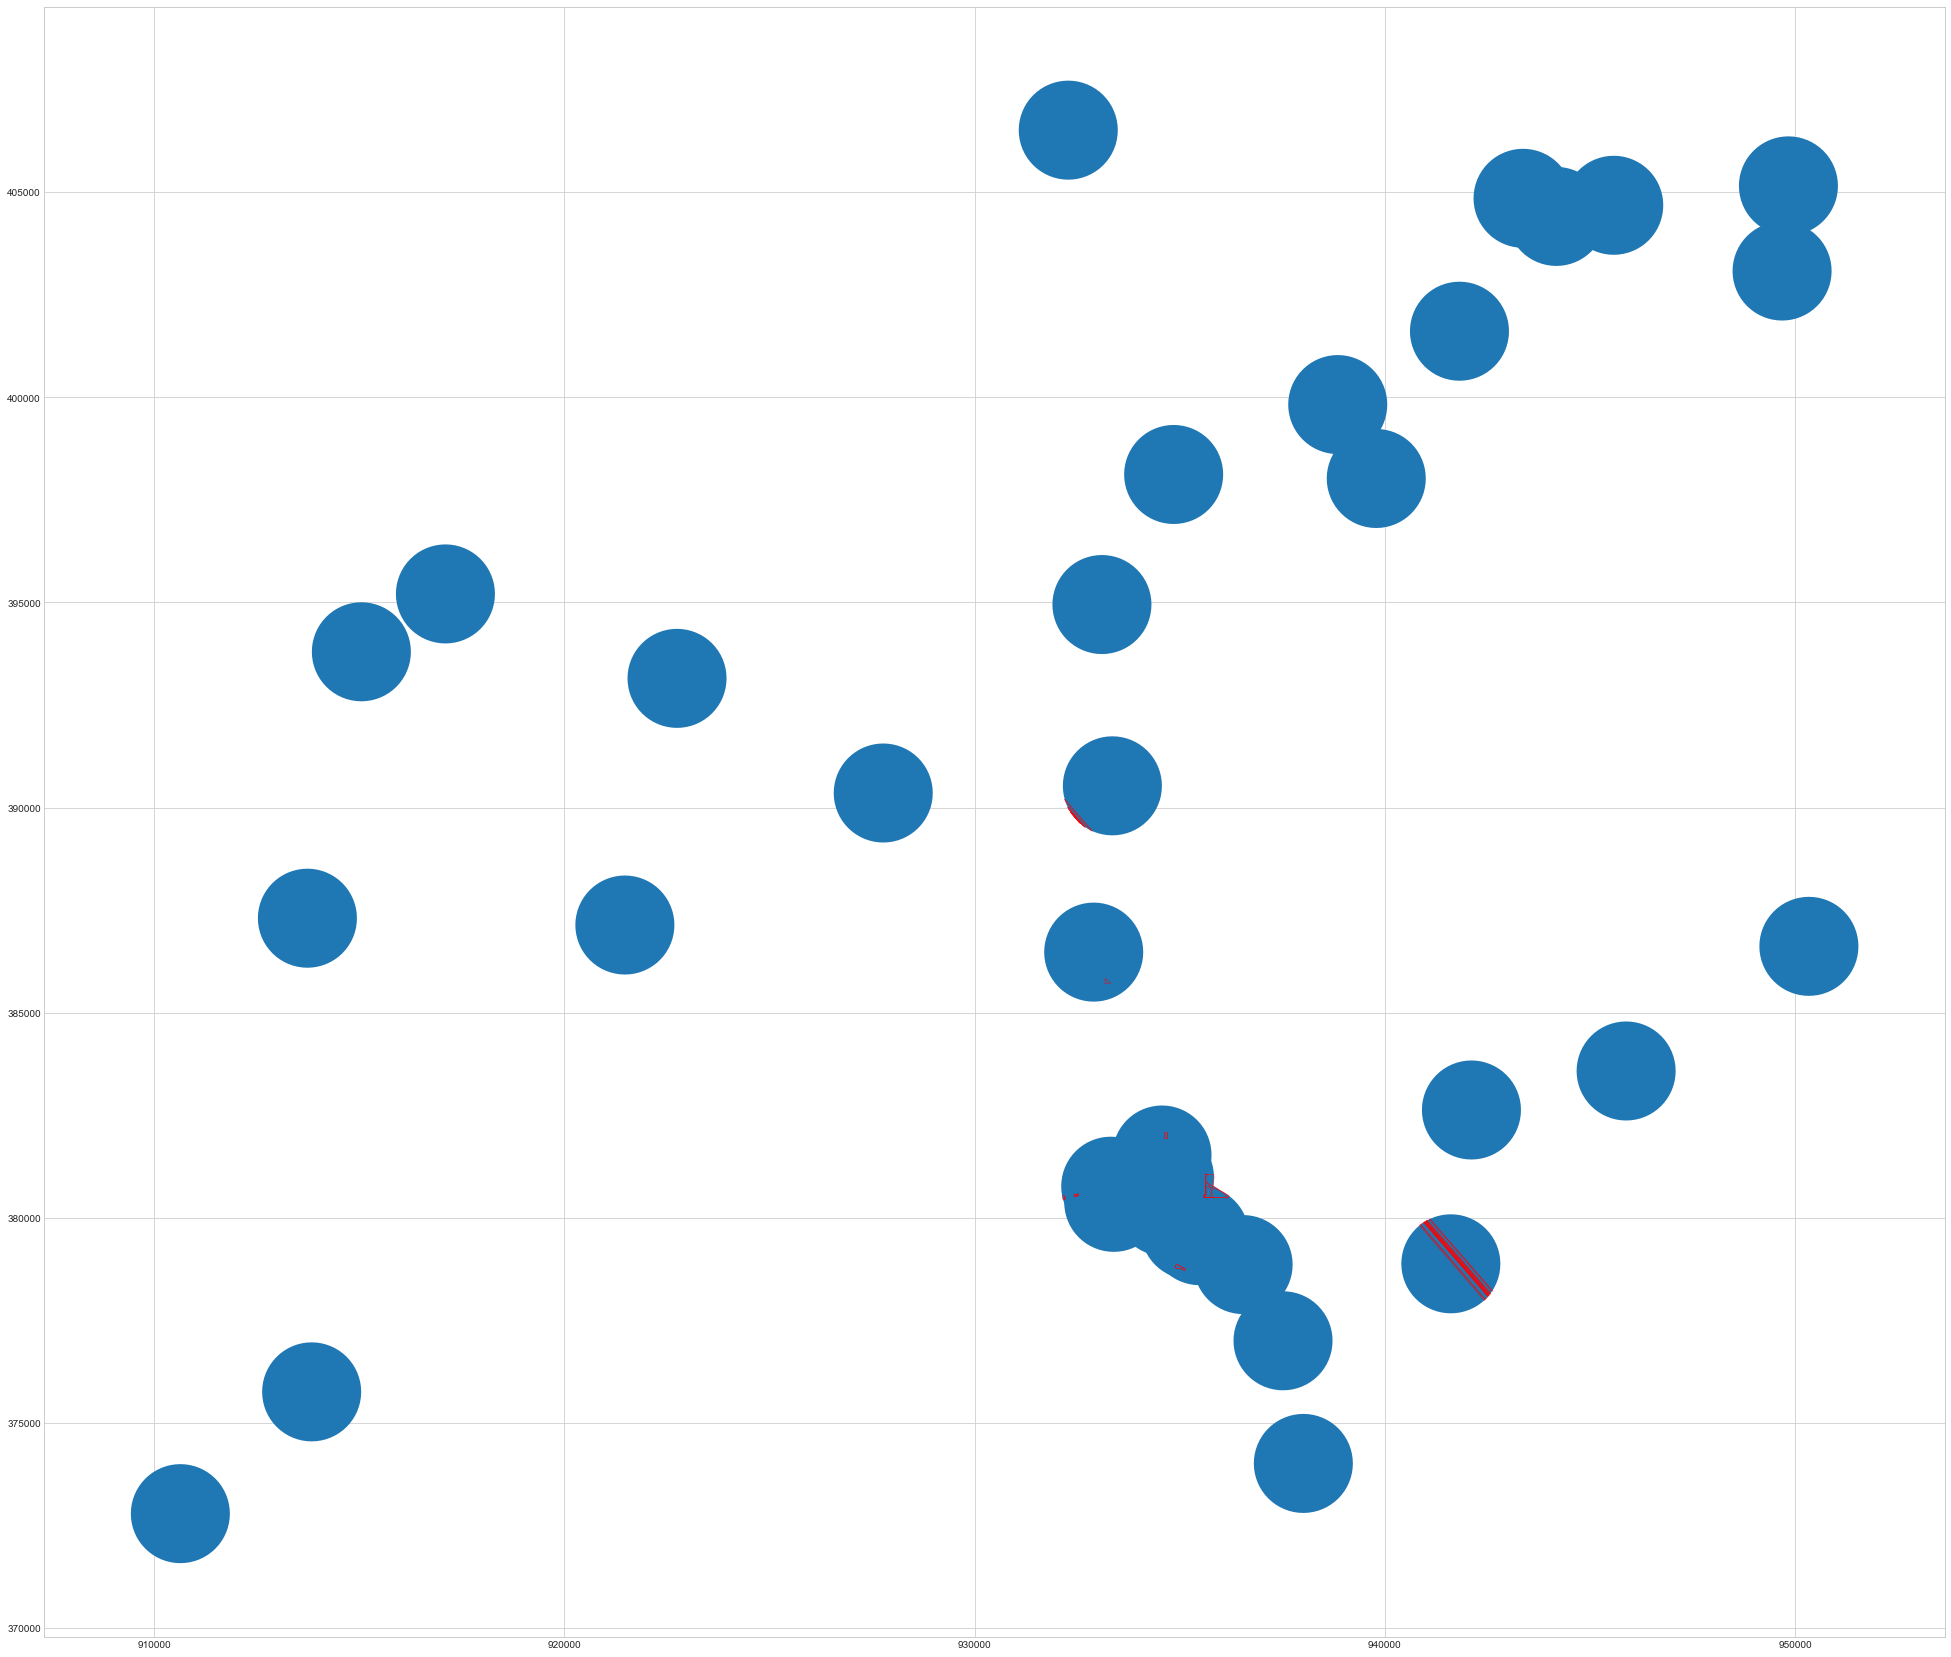

In [1037]:
#plotting    
ax = gdf1.plot(figsize=(40, 30))
commercial.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [1038]:
# Calculate inductrial area
industrial  = intdata[intdata['type'].str.contains('industrial')]
output_industrial = industrial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_industrial.columns=['osm_id','Industrial Area ']
output_industrial.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Industrial Area 
0   43181540.0     104411.904071
1   46331123.0      12900.382344
2  385509341.0     257519.221547

In [1039]:
# Calculate residential area
residential  = intdata[intdata['type'].str.contains('residential')]
output_residential = residential.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_residential.columns=['osm_id','Residential_Area ']
output_residential.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Residential_Area 
0  17022948.0       1.569979e+06
1  17025704.0       7.936798e+06
2  33869417.0       1.376387e+07
3  37998424.0       3.519275e+06
4  43176757.0       3.857973e+06

In [1040]:
residential.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                             site_name sensor_type  year   region  \
3   P001BOU         B90004 US 36 North of Boulder   permanent  2019  Boulder   
41  P002BOU               Folsom at Boulder Creek   permanent  2019  Boulder   
42  P004BOU                   Folsom at South St.   permanent  2019  Boulder   
43  P005BOU              Eco-Totem 13th at Walnut   permanent  2019  Boulder   
44  P010BOU  Broadway Path south of Boulder Creek   permanent  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
3              3.0  206.745402  102.547945  14.027397    218.0  40.068772   
41             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
42             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
43             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   
44             2.0  415.817968   16.698630   6.972603    172.0  40.013833   

     longitude comment  osm_id_sensor     osm_id  name         type  \
3  -105.283132     NaN    385509341.0  697170866  None  residential   
41 -105.263103     NaN     43176757.0  222246434  None  residential   
42 -105.263097     NaN     43313642.0  222246434  None  residential   
43 -105.278436     NaN     46148772.0  222246434  None  residential   
44 -105.277587     NaN     92826267.0  222246434  None  residential   

                                             geometry          Area  
3   POLYGON ((932877.208 385840.747, 932876.860 38...  80238.192821  
41  POLYGON ((933850.092 380298.107, 933861.008 38...  48079.531733  
42  POLYGON ((933850.092 380298.107, 933861.008 38...  48079.531733  
43  POLYGON ((933850.092 380298.107, 933861.008 38...  48079.531733  
44  POLYGON ((933850.092 380298.107, 933861.008 38...  48079.531733

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

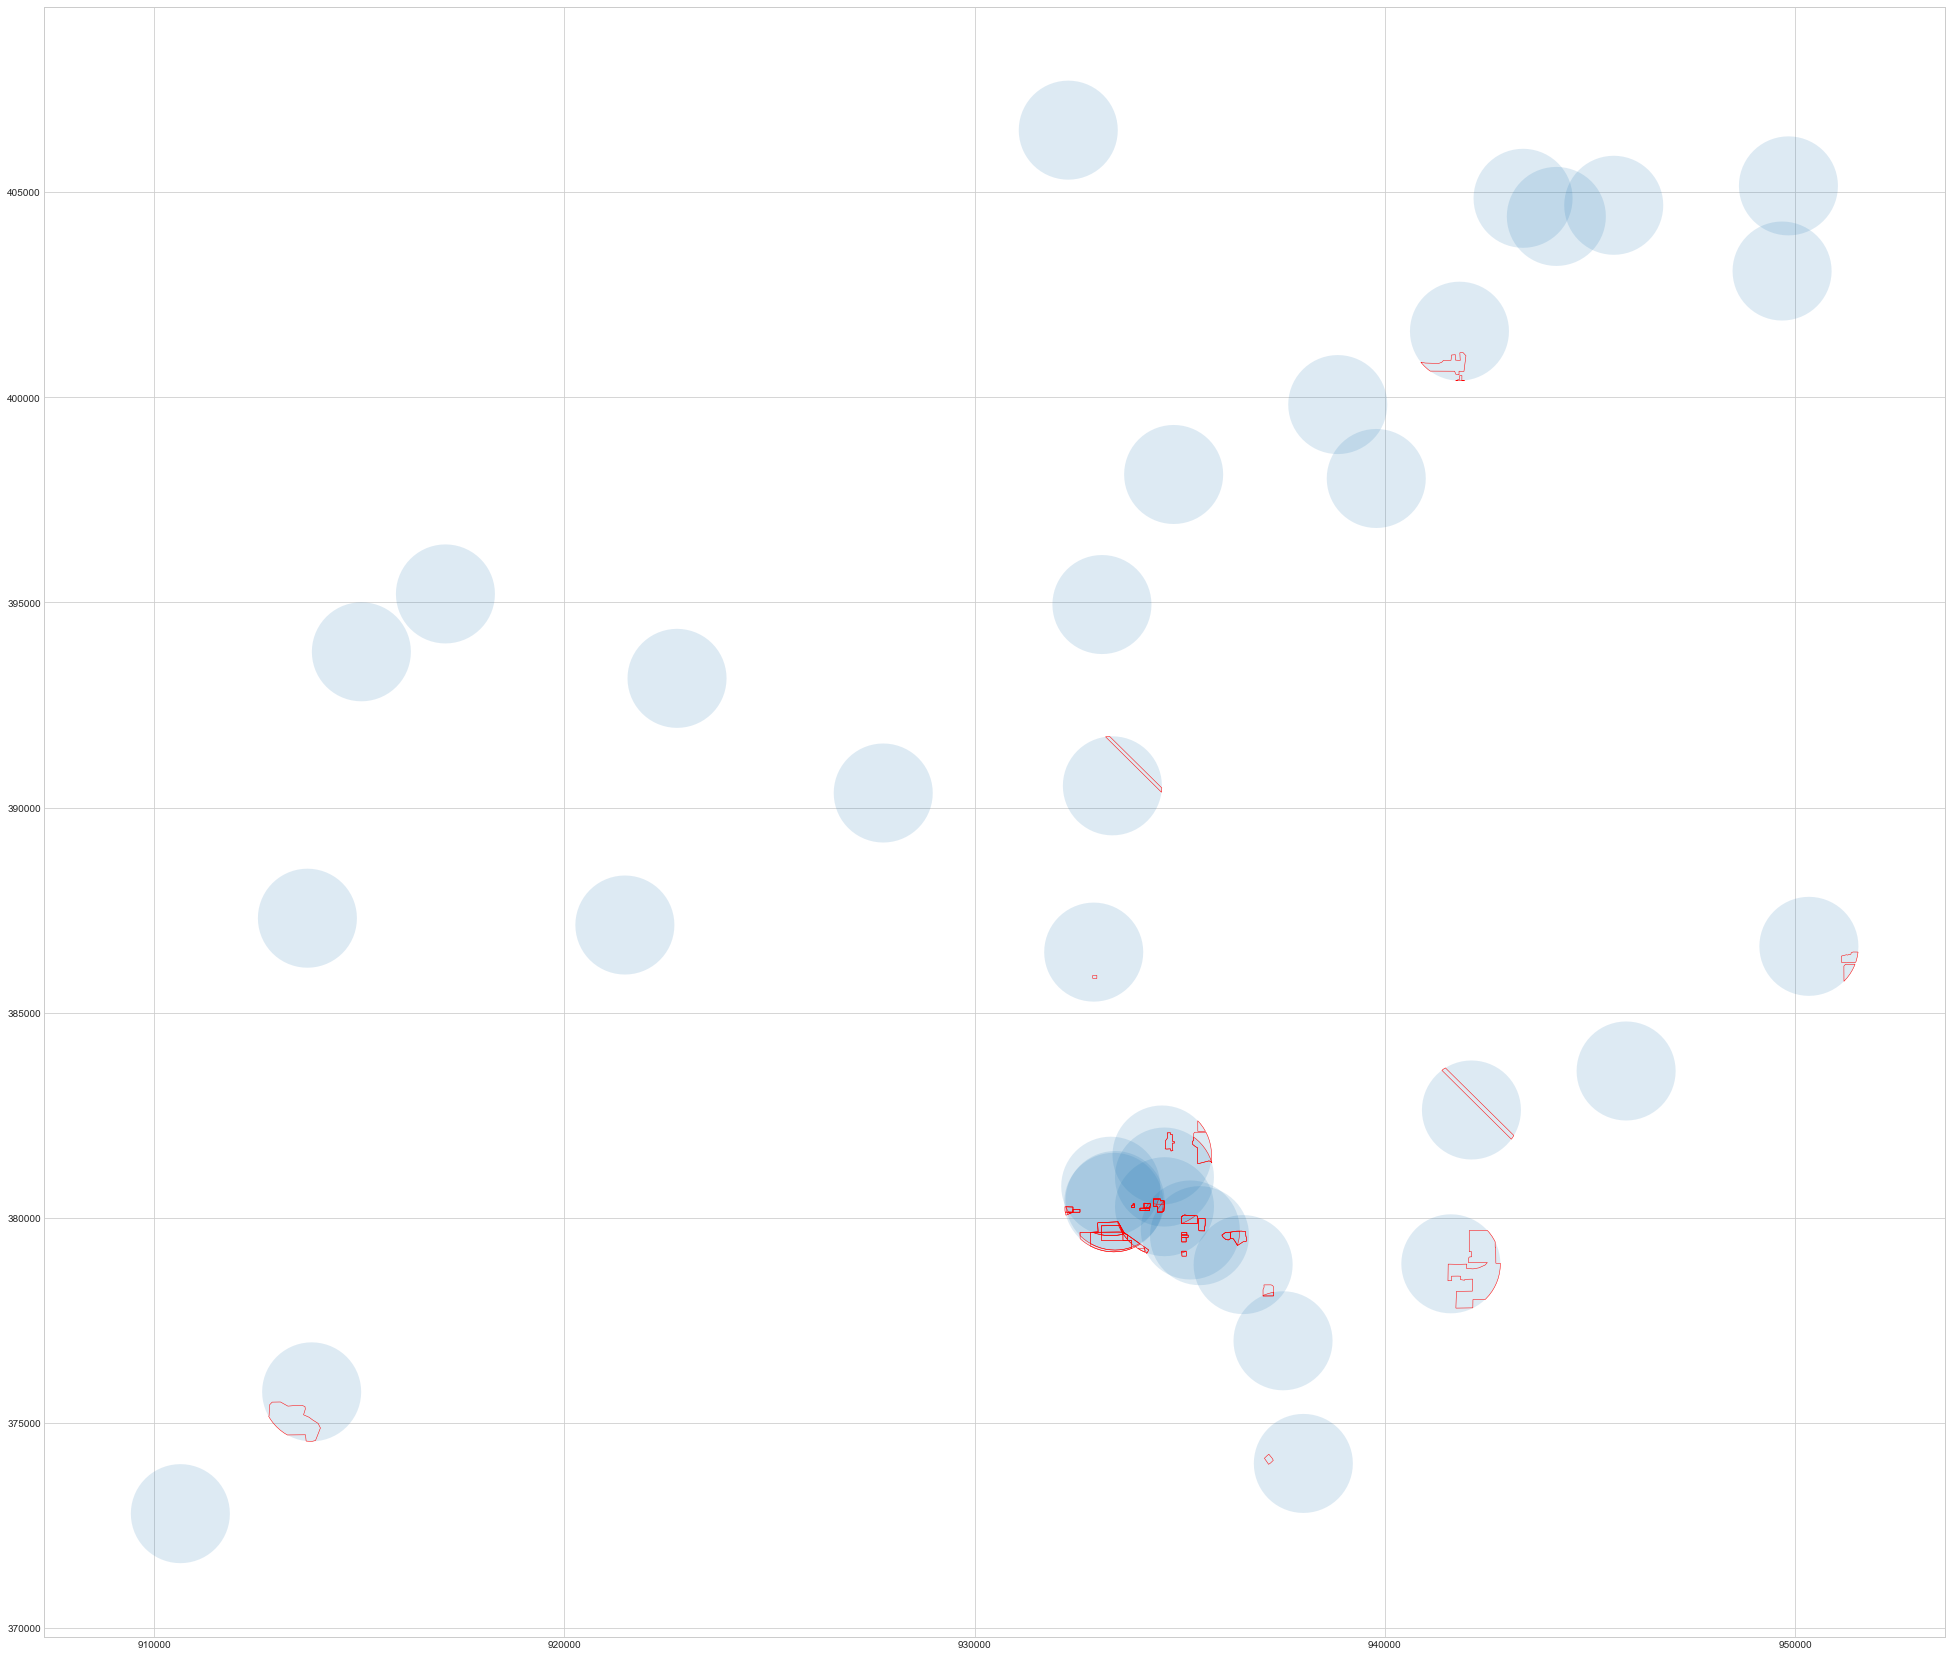

In [1041]:
#plotting    
ax = gdf1.plot(figsize=(40, 30),alpha=0.15)
residential.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [1042]:
# Calculate retail area
retail  = intdata[intdata['type'].str.contains('retail')]
output_retail = retail.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_retail.columns=['osm_id','Retail Area']
output_retail.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   Retail Area
0  33869417.0  5.387901e+05
1  37998424.0  4.712053e+06
2  43176757.0  5.823914e+06
3  43313642.0  6.971024e+06
4  46148772.0  5.182352e+05

In [1043]:
# Calculate grass area
grass  = intdata[intdata['type'].str.contains('grass')]
output_grass = grass.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_grass.columns=['osm_id','Grass Area']
output_grass.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id    Grass Area
0  33869417.0  3.206650e+05
1  37998424.0  1.041575e+06
2  43176757.0  8.827863e+05
3  43313642.0  7.379787e+04
4  46148772.0  2.563845e+05

In [1044]:
output_grass.index

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RangeIndex(start=0, stop=9, step=1)

# Use the Natural Shape file to calculate the Park, water and green spaces

In [1045]:
#nature=gpd.read_file("../input/osm-data/natural.shp")
nature.head(5)

osm_id            name   type  \
0  12559765    Beattie Park   park   
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   

                                            geometry  
0  POLYGON ((-105.08574 40.54563, -105.08573 40.5...  
1  POLYGON ((-105.06571 40.44693, -105.06422 40.4...  
2  POLYGON ((-105.03345 40.45281, -105.03223 40.4...  
3  POLYGON ((-105.06770 40.41485, -105.06640 40.4...  
4  POLYGON ((-105.08273 40.42033, -105.08267 40.4...

In [1046]:
# set the co-ordinate system first
# nature = nature.set_crs("EPSG:4326")
# Let's take a copy of our layer
nature_proj = nature.copy()

# Reproject the geometries by replacing the values with projected ones
nature_proj = nature_proj.to_crs(epsg=2772)
nature_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id            name   type  \
0  12559765    Beattie Park   park   
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   

                                            geometry  
0  POLYGON ((949493.289 439485.899, 949493.890 43...  
1  POLYGON ((951244.135 428534.152, 951369.968 42...  
2  POLYGON ((953977.052 429201.052, 954080.914 42...  
3  POLYGON ((951092.866 424971.450, 951202.803 42...  
4  POLYGON ((949814.218 425574.299, 949819.443 42...

In [1047]:
#nature_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

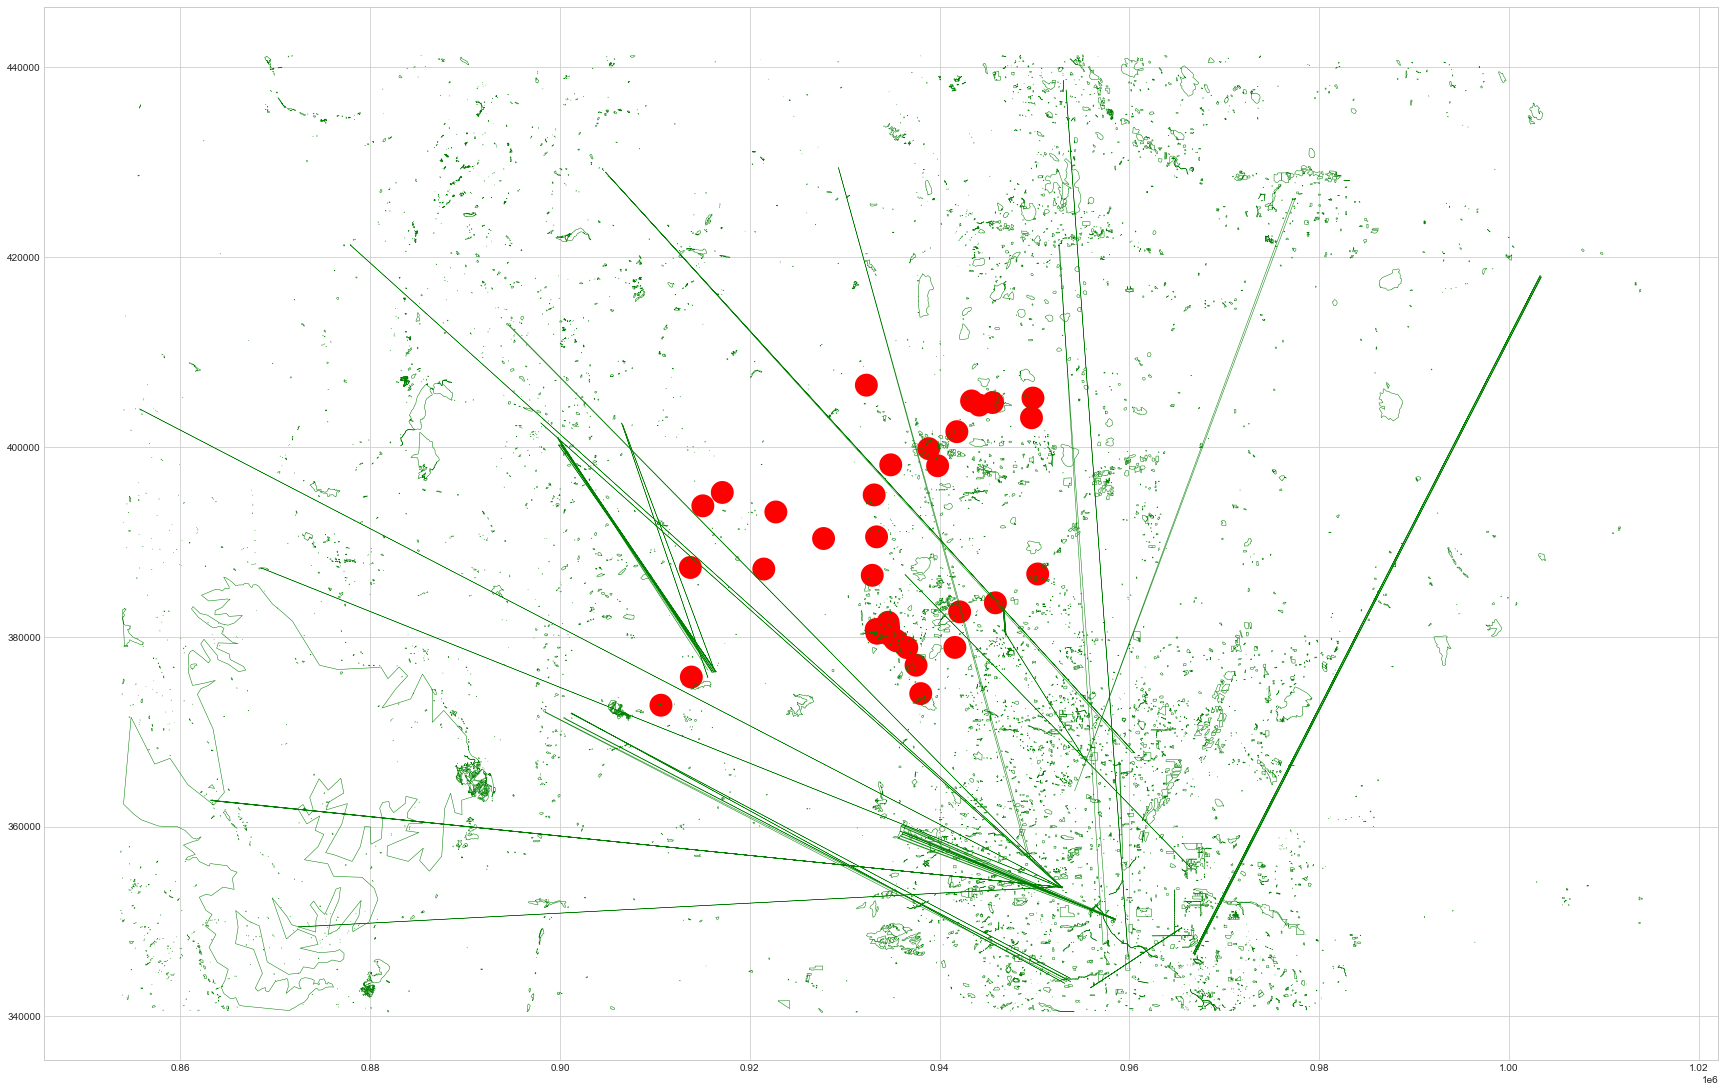

In [1048]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
nature_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# There is some invalid polygon in the shape file that need to pass through zero geom to correct it

In [1049]:
nature_proj["geometry2"]=nature_proj.geometry.buffer(0)
nature_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id            name   type  \
0  12559765    Beattie Park   park   
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   

                                            geometry  \
0  POLYGON ((949493.289 439485.899, 949493.890 43...   
1  POLYGON ((951244.135 428534.152, 951369.968 42...   
2  POLYGON ((953977.052 429201.052, 954080.914 42...   
3  POLYGON ((951092.866 424971.450, 951202.803 42...   
4  POLYGON ((949814.218 425574.299, 949819.443 42...   

                                           geometry2  
0  POLYGON ((949493.289 439485.899, 949493.890 43...  
1  POLYGON ((951244.135 428534.152, 951369.968 42...  
2  POLYGON ((953977.052 429201.052, 954080.914 42...  
3  POLYGON ((951092.866 424971.450, 951202.803 42...  
4  POLYGON ((949814.218 425574.299, 949819.443 42...

In [1050]:
# Now drop geometry column and rename geometry 2 equal to geometry again
nature_proj1=nature_proj.drop(["geometry"],axis=1)
nature_proj1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id            name   type  \
0  12559765    Beattie Park   park   
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   

                                           geometry2  
0  POLYGON ((949493.289 439485.899, 949493.890 43...  
1  POLYGON ((951244.135 428534.152, 951369.968 42...  
2  POLYGON ((953977.052 429201.052, 954080.914 42...  
3  POLYGON ((951092.866 424971.450, 951202.803 42...  
4  POLYGON ((949814.218 425574.299, 949819.443 42...

In [1051]:
nature_proj1.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
nature_proj1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id            name   type  \
0  12559765    Beattie Park   park   
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   

                                            geometry  
0  POLYGON ((949493.289 439485.899, 949493.890 43...  
1  POLYGON ((951244.135 428534.152, 951369.968 42...  
2  POLYGON ((953977.052 429201.052, 954080.914 42...  
3  POLYGON ((951092.866 424971.450, 951202.803 42...  
4  POLYGON ((949814.218 425574.299, 949819.443 42...

In [1052]:
# Clip the data using GeoPandas clip
buffer_clip_nature = gpd.clip(nature_proj1, gdf1)
buffer_clip_nature.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                name   type  \
65   34263886      Greenleaf Park   park   
67   34269214                None   park   
71   34417991  North Boulder Park   park   
96   37350751                None  water   
98   37350918                None  water   
99   37351004                None  water   
101  37351163   Valmont Reservoir  water   
425  39444429                None  water   
427  39444439                None  water   
428  39444451                None  water   

                                              geometry  
65   POLYGON ((934593.401 381318.733, 934608.301 38...  
67   POLYGON ((935451.902 378370.179, 935460.306 37...  
71   POLYGON ((932698.062 381806.118, 932697.723 38...  
96   POLYGON ((936944.996 378415.991, 936951.910 37...  
98   POLYGON ((938207.965 377989.554, 938217.428 37...  
99   POLYGON ((938186.451 377837.618, 938193.738 37...  
101  POLYGON ((940990.264 382425.679, 941014.435 38...  
425  POLYGON ((940011.543 400131.230, 940003.327 40...  
427  POLYGON ((939897.711 400235.006, 939878.046 40...  
428  POLYGON ((939781.108 400125.456, 939784.881 40...

In [1053]:
inter_nature=gpd.overlay(gdf1, buffer_clip_nature, how='intersection', make_valid=True, keep_geom_type=False)
inter_nature.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
2             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
3             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
4             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   

    longitude comment  osm_id_sensor     osm_id                      name  \
0 -105.283132     NaN    385509341.0  230779711         Dakota Ridge Park   
1 -105.283132     NaN    385509341.0  230779713                      None   
2 -105.283132     NaN    385509341.0  533863100              Holiday Park   
3 -105.283132     NaN    385509341.0  765546917  Foothills Community Park   
4 -105.263103     NaN     43176757.0   34263886            Greenleaf Park   

   type                                           geometry  
0  park  POLYGON ((932511.340 386107.127, 932482.571 38...  
1  park  POLYGON ((932646.800 386093.751, 932654.128 38...  
2  park  POLYGON ((933186.234 385528.164, 933194.174 38...  
3  park  POLYGON ((932439.763 385363.771, 932332.686 38...  
4  park  POLYGON ((934608.301 381227.550, 934533.623 38...

In [1054]:
inter_nature["Area"]=inter_nature["geometry"].area*10.76 # in ft2
inter_nature.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
2             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
3             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
4             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   

    longitude comment  osm_id_sensor     osm_id                      name  \
0 -105.283132     NaN    385509341.0  230779711         Dakota Ridge Park   
1 -105.283132     NaN    385509341.0  230779713                      None   
2 -105.283132     NaN    385509341.0  533863100              Holiday Park   
3 -105.283132     NaN    385509341.0  765546917  Foothills Community Park   
4 -105.263103     NaN     43176757.0   34263886            Greenleaf Park   

   type                                           geometry           Area  
0  park  POLYGON ((932511.340 386107.127, 932482.571 38...  150284.039639  
1  park  POLYGON ((932646.800 386093.751, 932654.128 38...   47669.910429  
2  park  POLYGON ((933186.234 385528.164, 933194.174 38...   94751.815497  
3  park  POLYGON ((932439.763 385363.771, 932332.686 38...  237229.675478  
4  park  POLYGON ((934608.301 381227.550, 934533.623 38...   68757.262700

In [1055]:
#inter_nature.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1056]:
output_nature=inter_nature.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_nature.head()

osm_id_sensor   type          Area
0     17013477.0   park  3.048199e+04
1     17013477.0  water  7.331272e+05
2     17018830.0  water  2.238653e+05
3     17022894.0  water  1.196807e+07
4     17022948.0  water  3.458004e+05

In [1057]:
# Calculate park area
park  = inter_nature[inter_nature['type'].str.contains('park')]
output_park = park.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_park.columns=['osm_id',"Park Area"]
output_park.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Park Area
0  17013477.0  3.048199e+04
1  33869417.0  7.420701e+05
2  37998424.0  1.112384e+06
3  43176757.0  1.211944e+06
4  43181540.0  2.961301e+06

In [1058]:
# Calculate water area
water  = inter_nature[inter_nature['type'].str.contains('water')]
output_water= water.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_water.columns=['osm_id',"Water Area"]
output_water.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id    Water Area
0  17013477.0  7.331272e+05
1  17018830.0  2.238653e+05
2  17022894.0  1.196807e+07
3  17022948.0  3.458004e+05
4  17025168.0  9.026981e+05

In [1059]:
# Calculate forest area
forest  = inter_nature[inter_nature['type'].str.contains('forest')]
output_forest= forest.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_forest.columns=['osm_id',"Forest Area"]
output_forest.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   Forest Area
0  33869417.0  2.007335e+06
1  37998424.0  5.289742e+05
2  43176757.0  1.427171e+06
3  43313642.0  9.620377e+05
4  46148772.0  1.888081e+06

# Use the Point Shape file to calculate the Bicycle parking, Bus/Train stops, Intersection Density, School/College/University

In [1060]:
#pts=gpd.read_file("../input/osm-data/points.shp")
pts.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp          name             type  \
0  25689366      None          None  traffic_signals   
1  25689368      None          None   turning_circle   
2  25698637      None  King Soopers             fuel   
3  25757782      None          None  traffic_signals   
4  25757811      None          None         crossing   

                      geometry  
0  POINT (-105.26273 39.98123)  
1  POINT (-105.26134 39.98138)  
2  POINT (-105.24934 39.98546)  
3  POINT (-105.25313 40.00374)  
4  POINT (-105.25353 40.00732)

In [1061]:
# set the co-ordinate system first
#pts = pts.set_crs("EPSG:4326")
# Let's take a copy of our layer
pts_proj = pts.copy()

# Reproject the geometries by replacing the values with projected ones
pts_proj = pts_proj.to_crs(epsg=2772)
pts_proj.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp          name             type  \
0  25689366      None          None  traffic_signals   
1  25689368      None          None   turning_circle   
2  25698637      None  King Soopers             fuel   
3  25757782      None          None  traffic_signals   
4  25757811      None          None         crossing   

                        geometry  
0  POINT (934669.155 376762.300)  
1  POINT (934787.842 376779.862)  
2  POINT (935811.248 377235.581)  
3  POINT (935482.309 379263.921)  
4  POINT (935447.116 379661.816)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

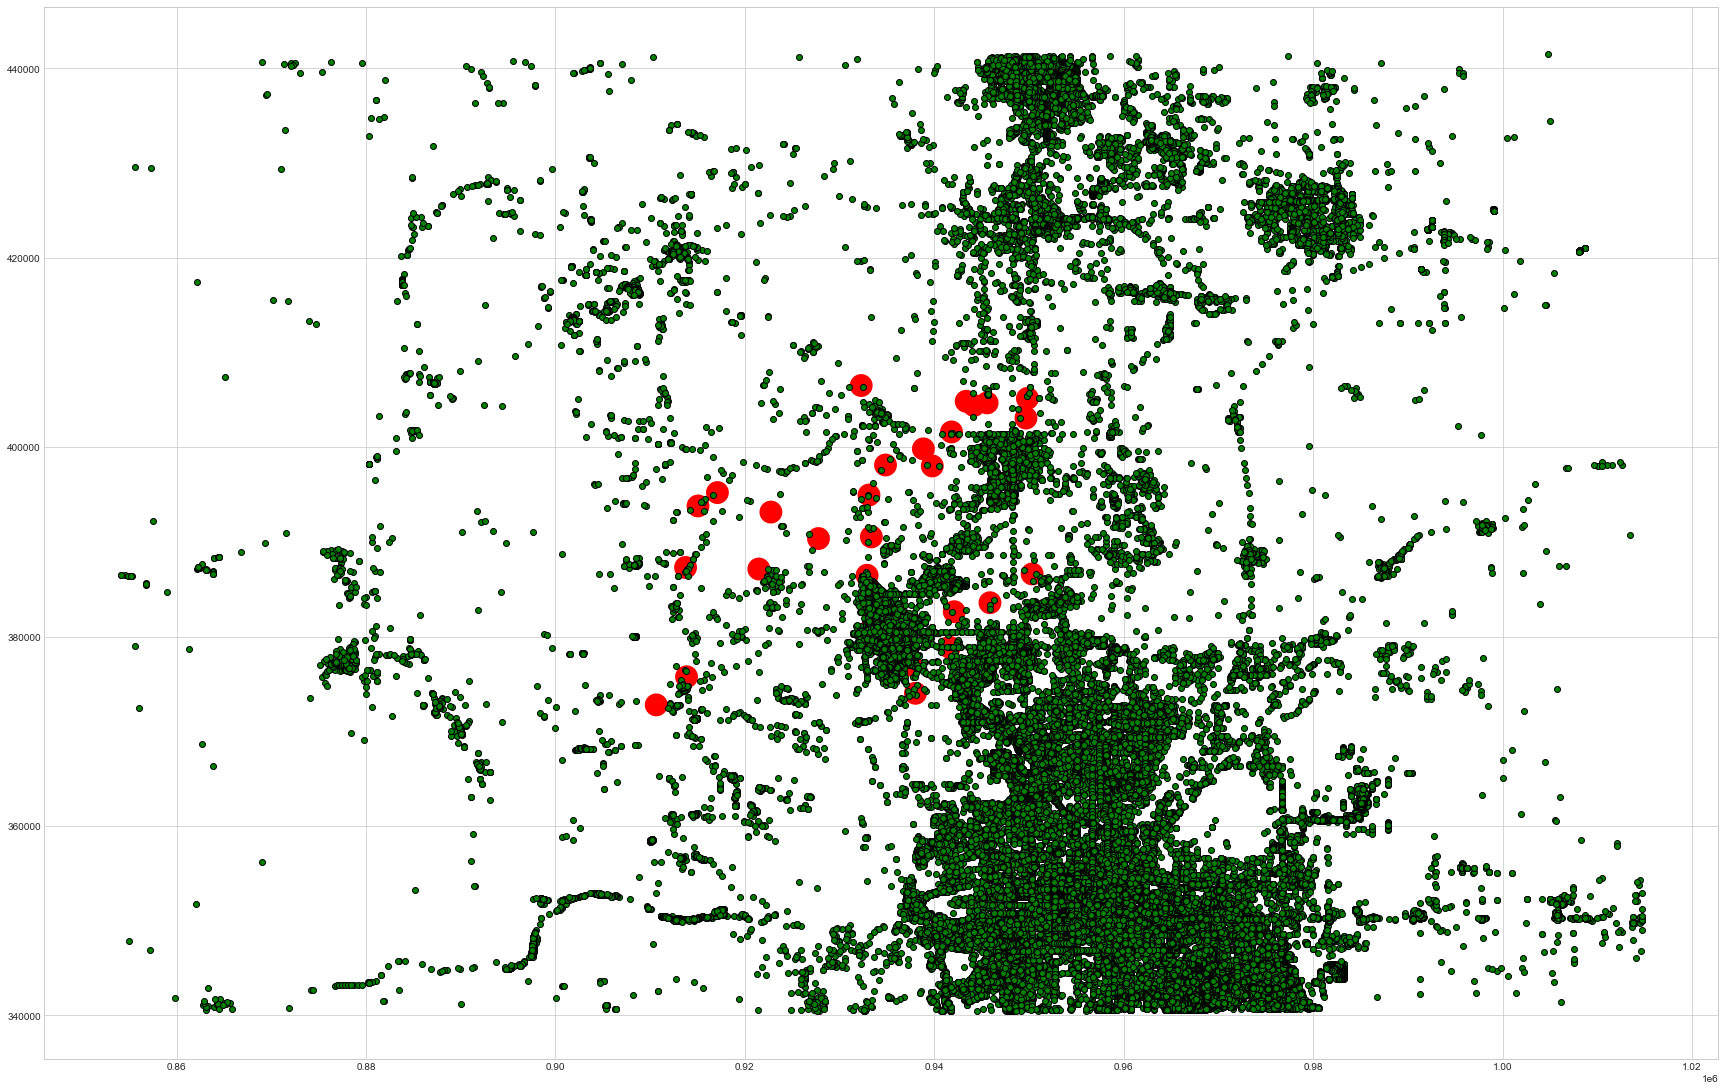

In [1062]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
pts_proj.plot(color="green",edgecolor='k',ax=ax) #Use your second dataframe

In [1063]:
# Clip the data using GeoPandas clip
buffer_clip_pts = gpd.clip(pts_proj, gdf1)
buffer_clip_pts.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp  name             type                       geometry
3  25757782      None  None  traffic_signals  POINT (935482.309 379263.921)
4  25757811      None  None         crossing  POINT (935447.116 379661.816)
5  25758250      None  None         crossing  POINT (935881.041 379696.543)
6  25765902      None  None  traffic_signals  POINT (932858.690 380740.750)
7  25765915      None  None         crossing  POINT (933296.153 380859.656)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


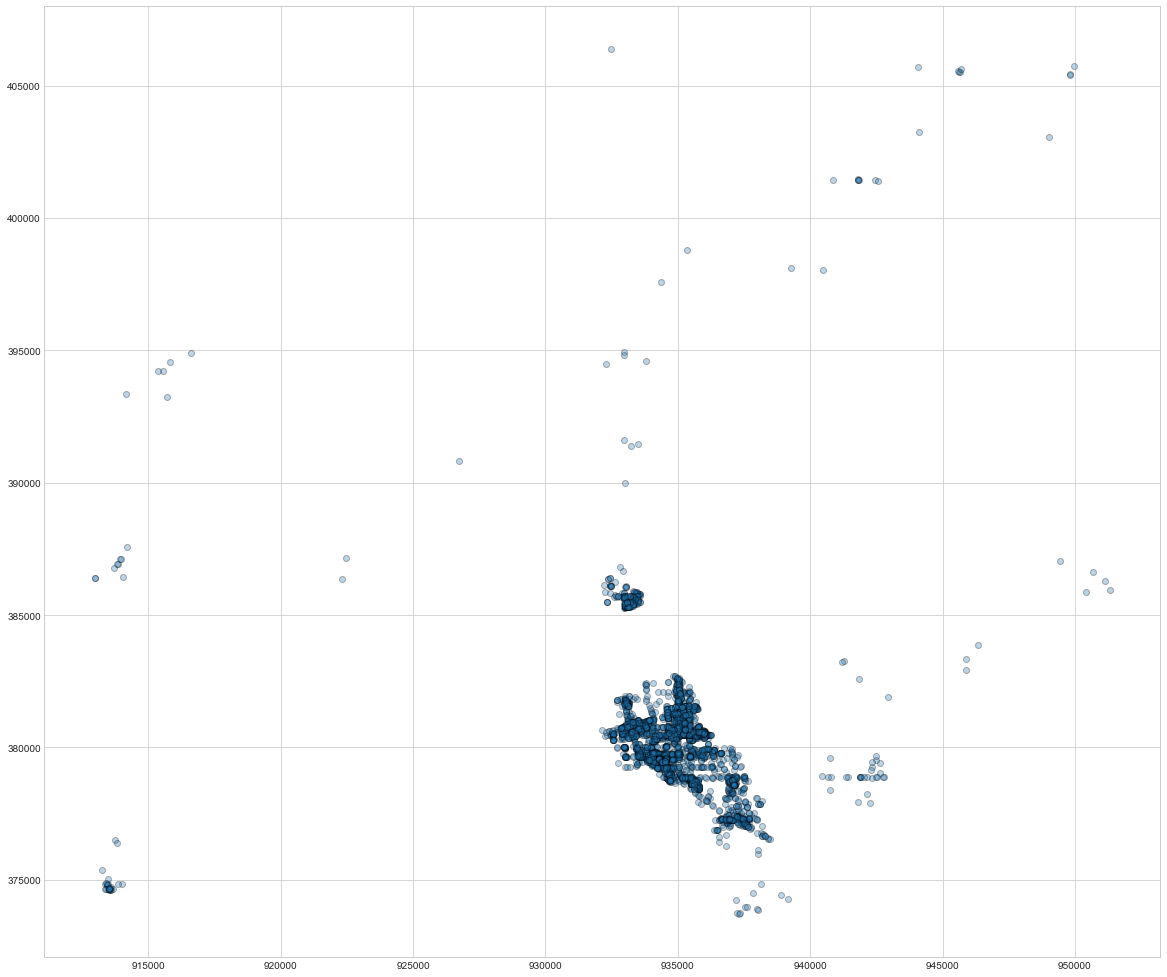

In [1064]:
ax = buffer_clip_pts.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1065]:
inter_pts=gpd.overlay(gdf1, buffer_clip_pts, how='intersection', make_valid=True, keep_geom_type=False)
inter_pts.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
2             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
3             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
4             3.0  206.745402  102.547945  14.027397    218.0  40.068772   

    longitude comment  osm_id_sensor     osm_id timestamp  name  \
0 -105.283132     NaN    385509341.0  176407963      None  None   
1 -105.283132     NaN    385509341.0  176417733      None  None   
2 -105.283132     NaN    385509341.0  176417740      None  None   
3 -105.283132     NaN    385509341.0  176424362      None  None   
4 -105.283132     NaN    385509341.0  176479606      None  None   

              type                       geometry  
0   turning_circle  POINT (932577.890 385680.557)  
1         crossing  POINT (932989.961 385293.902)  
2  traffic_signals  POINT (932989.327 385708.183)  
3   turning_circle  POINT (932880.188 385829.184)  
4   turning_circle  POINT (932615.545 385777.634)

# Calculate the bicycle parking

In [1066]:
#k1 = df.loc[(df.Product == p_id) & (df.Time >= start_time) & (df.Time < end_time), ['Time', 'Product']]
b_parking = inter_pts[inter_pts['type'].str.contains('bicycle_parking')]
b_parking.head(5)


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                       site_name sensor_type  \
332  P002BOU                         Folsom at Boulder Creek   permanent   
333  P005BOU                        Eco-Totem 13th at Walnut   permanent   
334  P010BOU            Broadway Path south of Boulder Creek   permanent   
335  P011BOU  COMBO 13th Street and Boulder Creek W of plaza   permanent   
336  P002BOU                         Folsom at Boulder Creek   permanent   

     year   region  travel_pattern        AADBT    stv_adb  stv_c_adb  \
332  2019  Boulder             2.0   479.543452  29.739726  10.452055   
333  2019  Boulder             2.0   601.530238  20.808219   9.095890   
334  2019  Boulder             2.0   415.817968  16.698630   6.972603   
335  2019  Boulder             3.0  1085.607486  32.164384  11.698630   
336  2019  Boulder             2.0   479.543452  29.739726  10.452055   

     stl_raw   latitude   longitude             comment  osm_id_sensor  \
332   5359.0  40.012846 -105.263103                 NaN     43176757.0   
333   2382.0  40.017376 -105.278436                 NaN     46148772.0   
334    172.0  40.013833 -105.277587                 NaN     92826267.0   
335    674.0  40.014224 -105.277215  closed thru 6/2019     33869417.0   
336   5359.0  40.012846 -105.263103                 NaN     43176757.0   

        osm_id timestamp  name             type                       geometry  
332  339489630      None  None  bicycle_parking  POINT (933923.570 379786.586)  
333  339489630      None  None  bicycle_parking  POINT (933923.570 379786.586)  
334  339489630      None  None  bicycle_parking  POINT (933923.570 379786.586)  
335  339489630      None  None  bicycle_parking  POINT (933923.570 379786.586)  
336  339490041      None  None  bicycle_parking  POINT (933900.086 379851.323)

In [1067]:
output_bparking=b_parking.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bparking.columns=["osm_id","Bicycle Parking"]
output_bparking.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bicycle Parking
0  33869417.0              201
1  37998424.0              382
2  43176757.0              388
3  43313642.0               72
4  46148772.0               90

# Calculate bus stops

In [1068]:
transit_stops= inter_pts[inter_pts['type'].str.contains('bus_stop')]
transit_stops.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
24  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
25  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
26  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
27  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
28  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
24             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
25             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
26             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
27             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
28             3.0  206.745402  102.547945  14.027397    218.0  40.068772   

     longitude comment  osm_id_sensor     osm_id timestamp  \
24 -105.283132     NaN    385509341.0  424904976      None   
25 -105.283132     NaN    385509341.0  424906528      None   
26 -105.283132     NaN    385509341.0  424908395      None   
27 -105.283132     NaN    385509341.0  424908433      None   
28 -105.283132     NaN    385509341.0  424908461      None   

                          name      type                       geometry  
24      Lee Hill Rd & Broadway  bus_stop  POINT (932939.087 385710.968)  
25     Broadway & Yarmouth Ave  bus_stop  POINT (932997.837 385342.042)  
26  Front Range Ave & Broadway  bus_stop  POINT (932951.618 385819.477)  
27     Yarmouth Ave & Broadway  bus_stop  POINT (933105.659 385315.549)  
28  Front Range Ave & Broadway  bus_stop  POINT (932975.420 385819.758)

In [1069]:
output_bstop=transit_stops.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bstop.columns=["osm_id","Bus Stops"]
output_bstop.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bus Stops
0  33869417.0        111
1  37998424.0        112
2  43176757.0        123
3  43313642.0        112
4  46148772.0        104

# Calculate school/college/university

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


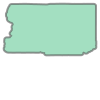

In [1070]:
polygon = pba.to_crs(4326).iloc[0]
polygon

In [1071]:
# Import school
tags = {'amenity': 'school'}
scl = ox.geometries_from_polygon(polygon, tags)
#scl[['amenity', 'name', 'geometry']]

In [1072]:
# set the co-ordinate system first
scl = scl.set_crs("EPSG:4326")
# Let's take a copy of our layer
scl_proj = scl.copy()

# Reproject the geometries by replacing the values with projected ones
scl_proj =scl_proj.to_crs(epsg=2772)
scl_proj.head(5)
scl_proj['geometry']=scl_proj['geometry'].centroid
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
output_school=inter_scl.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_school.columns=["osm_id","School"]
output_school.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  School
0  17025704.0       2
1  33869417.0       9
2  37998424.0       4
3  43176757.0       4
4  43313642.0       3

# Closest distance to school

In [1073]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1074]:
ecoshort['min_dist_to_school'] = ecoshort.geometry.apply(min_distance_ppoly, args=(scl_proj,))*3.28084
output_school_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_school"]]
output_school_distance.columns=["osm_id","min_dist_to_school"]
output_school_distance.head()

osm_id  min_dist_to_school
0  385509341.0         5155.748831
1   43176757.0         2995.203388
2  439968204.0         1809.498034
3   43313642.0         1954.097262
4   46148772.0         1671.759654

In [1075]:
# Import college
tags = {'amenity': 'college'}
coll = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
coll = coll.set_crs("EPSG:4326")
# Let's take a copy of our layer
coll_proj = coll.copy()

# Reproject the geometries by replacing the values with projected ones
coll_proj =coll_proj.to_crs(epsg=2772)
coll_proj['geometry']=coll_proj['geometry'].centroid
buffer_clip_coll = gpd.clip(coll_proj, gdf1)
inter_coll=gpd.overlay(gdf1, buffer_clip_coll, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1076]:
output_college=inter_coll.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_college.columns=["osm_id","college"]
output_college.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  college
0  33869417.0        1
1  43176757.0        1
2  92826267.0        1

# Closest distance to college

In [1077]:
ecoshort['min_dist_to_college'] = ecoshort.geometry.apply(min_distance_ppoly, args=(coll_proj,))*3.28084
output_college_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_college"]]
output_college_distance.columns=["osm_id","min_dist_to_college"]
output_college_distance.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  min_dist_to_college
0  385509341.0         22889.223647
1   43176757.0          3427.045328
2  439968204.0          6857.187175
3   43313642.0          5322.953049
4   46148772.0          4333.880131

In [1078]:
# Import college
tags = {'amenity': 'university'}
uni = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
uni = uni.set_crs("EPSG:4326")
# Let's take a copy of our layer
uni_proj = uni.copy()

# Reproject the geometries by replacing the values with projected ones
uni_proj =uni_proj.to_crs(epsg=2772)
uni_proj['geometry']=uni_proj['geometry'].centroid
buffer_clip_uni = gpd.clip(uni_proj, gdf1)
inter_uni=gpd.overlay(gdf1, buffer_clip_uni, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1079]:
#scu=pd.concat([sc,u],axis=0)
#scu

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1080]:
output_university=inter_uni.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_university.loc[output_university['geometry'] > 0, 'geometry'] = 1
output_university.loc[output_university['geometry'] ==0, 'geometry'] = 0
output_university.columns=["osm_id","University"]
output_university.head()

osm_id  University
0  33869417.0           1
1  37998424.0           1
2  43176757.0           1
3  43313642.0           1
4  46148772.0           1

# Closest distance to university

In [1081]:
ecoshort['min_dist_to_university'] = ecoshort.geometry.apply(min_distance_ppoly, args=(uni_proj,))*3.28084
output_university_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_university"]]
output_university_distance.columns=["osm_id","min_dist_to_university"]
output_university_distance.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  min_dist_to_university
0  385509341.0            14959.494580
1   43176757.0             1166.086558
2  439968204.0             3806.818604
3   43313642.0             2219.966504
4   46148772.0             3434.960037

# Calculate OSM node density

In [1082]:
# lets bring the road shape file node to calculate the intersection density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


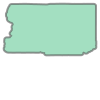

In [1083]:
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon

In [1084]:
#!pip install networkx
#!pip install osmnx
import networkx as nx
import osmnx as ox
ox.config(log_file=True,log_console=True,use_cache=True)
#place="Portland,USA"
#Construct the street network
G=ox.graph_from_polygon(polygon,network_type="drive",simplify=False)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(G,node_color='yellow',edge_color='blue')

In [1085]:
nodes, edges = ox.graph_to_gdfs(G)
nodes.head(5)

y           x  street_count highway  ref  \
osmid                                                        
25676629  39.982266 -105.263876             5     NaN  NaN   
25676633  39.980297 -105.260134             4     NaN  NaN   
25676636  39.984876 -105.269268             2     NaN  NaN   
25678877  39.997891 -105.253110             2     NaN  NaN   
25678878  40.002748 -105.253124             3     NaN  NaN   

                             geometry  
osmid                                  
25676629  POINT (-105.26388 39.98227)  
25676633  POINT (-105.26013 39.98030)  
25676636  POINT (-105.26927 39.98488)  
25678877  POINT (-105.25311 39.99789)  
25678878  POINT (-105.25312 40.00275)

In [1086]:
print(nodes.crs)

epsg:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1087]:
# set the co-ordinate system first
node = nodes.set_crs("EPSG:4326")
# Let's take a copy of our layer
node_proj = node.copy()

# Reproject the geometries by replacing the values with projected ones
node_proj = node_proj.to_crs(epsg=2772)
node_proj.head(5)

y           x  street_count highway  ref  \
osmid                                                        
25676629  39.982266 -105.263876             5     NaN  NaN   
25676633  39.980297 -105.260134             4     NaN  NaN   
25676636  39.984876 -105.269268             2     NaN  NaN   
25678877  39.997891 -105.253110             2     NaN  NaN   
25678878  40.002748 -105.253124             3     NaN  NaN   

                               geometry  
osmid                                    
25676629  POINT (934570.808 376877.599)  
25676633  POINT (934890.955 376659.816)  
25676636  POINT (934109.474 377166.109)  
25678877  POINT (935485.516 378614.897)  
25678878  POINT (935482.811 379154.224)

In [1088]:
# Clip the data using GeoPandas clip
buffer_clip_node = gpd.clip(node_proj, gdf1)
buffer_clip_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


y           x  street_count highway  ref  \
osmid                                                        
25678877  39.997891 -105.253110             2     NaN  NaN   
25678878  40.002748 -105.253124             3     NaN  NaN   
25696397  40.003313 -105.262961             2     NaN  NaN   
25696452  40.009151 -105.261434             1     NaN  NaN   
25757413  39.997287 -105.244992             3     NaN  NaN   

                               geometry  
osmid                                    
25678877  POINT (935485.516 378614.897)  
25678878  POINT (935482.811 379154.224)  
25696397  POINT (934642.646 379214.642)  
25696452  POINT (934771.339 379863.221)  
25757413  POINT (936178.949 378549.841)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


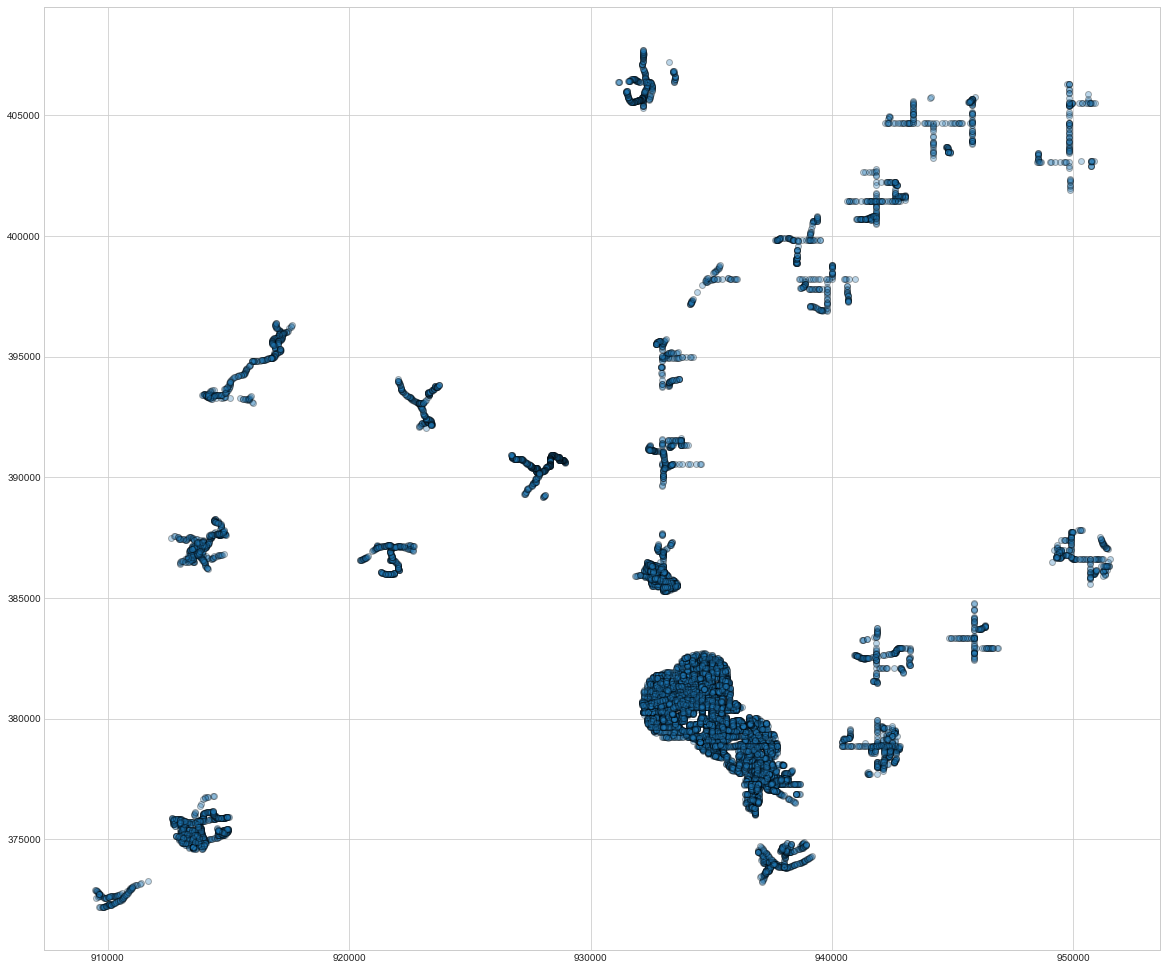

In [1089]:
ax = buffer_clip_node.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1090]:
 inter_node=gpd.overlay(gdf1, buffer_clip_node, how='intersection', make_valid=True, keep_geom_type=False)
 inter_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
2             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
3             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
4             3.0  206.745402  102.547945  14.027397    218.0  40.068772   

    longitude comment  osm_id_sensor          y           x  street_count  \
0 -105.283132     NaN    385509341.0  40.059598 -105.279833             3   
1 -105.283132     NaN    385509341.0  40.061023 -105.278685             3   
2 -105.283132     NaN    385509341.0  40.061033 -105.277509             3   
3 -105.283132     NaN    385509341.0  40.060145 -105.277508             4   
4 -105.283132     NaN    385509341.0  40.060153 -105.276317             4   

  highway  ref                       geometry  
0     NaN  NaN  POINT (933186.496 385460.347)  
1     NaN  NaN  POINT (933284.087 385618.732)  
2     NaN  NaN  POINT (933384.371 385620.094)  
3     NaN  NaN  POINT (933384.730 385521.554)  
4     NaN  NaN  POINT (933486.338 385522.720)

Intersection density per mile2

In [1091]:
output_intersection_density= inter_node.groupby(by=['osm_id_sensor'])['geometry'].count()/(3.1416*size*size*3.861e-07)
output_intersection_density.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor
17013477.0    226.354433
17016731.0     81.487596
17018038.0    108.084242
17018364.0     44.139114
17018830.0     72.433419
Name: geometry, dtype: float64

In [1092]:
output_intersection_density1=output_intersection_density.reset_index()
output_intersection_density1.columns=["osm_id","OSM_node_Density"]
output_intersection_density1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  OSM_node_Density
0  17013477.0        226.354433
1  17016731.0         81.487596
2  17018038.0        108.084242
3  17018364.0         44.139114
4  17018830.0         72.433419

# Calculate the true intersection density

In [1093]:
custom_filter = ox.downloader._get_osm_filter("drive")
custom_filter += '["highway"!~"motor"]'  # filter out freeways
Ga = ox.graph_from_polygon(polygon, custom_filter=custom_filter, simplify=True)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1094]:
nodesa, edgesa = ox.graph_to_gdfs(Ga)
# set the co-ordinate system first
nodea = nodesa.set_crs("EPSG:4326")
# Let's take a copy of our layer
nodea_proj = nodea.copy()

In [1095]:
# Reproject the geometries by replacing the values with projected ones
nodea_proj = nodea_proj.to_crs(epsg=2772)
buffer_clip_nodea = gpd.clip(nodea_proj, gdf1)
inter_nodea=gpd.overlay(gdf1, buffer_clip_nodea, how='intersection', make_valid=True, keep_geom_type=False)
outputa_intersection_density= inter_nodea.groupby(by=['osm_id_sensor'])['geometry'].count()/(3.1416*size*size*3.861e-07)
output_intersection_densitya=outputa_intersection_density.reset_index()
output_intersection_densitya.columns=["osm_id","Intersection_Density"]
output_intersection_densitya.head()

osm_id  Intersection_Density
0  17013477.0             20.371899
1  17016731.0              3.961203
2  17018038.0              2.829430
3  17018364.0              1.697658
4  17018830.0              5.092975

# Calculate the Number of Lanes

In [1096]:
edges.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid              name      highway maxspeed  \
u        v          key                                                      
25676629 176444102  0     17019278     Hillsdale Way  residential   20 mph   
         176583402  0     17027069  Hillsdale Circle  residential   20 mph   
         6942401729 0    741582932  Table Mesa Drive     tertiary   25 mph   
         25689292   0    741582933  Table Mesa Drive     tertiary   25 mph   
25676633 392990958  0      4279016  Table Mesa Court  residential   20 mph   

                         oneway   length lanes access  ref bridge junction  \
u        v          key                                                      
25676629 176444102  0     False  179.618   NaN    NaN  NaN    NaN      NaN   
         176583402  0     False   47.207   NaN    NaN  NaN    NaN      NaN   
         6942401729 0      True    7.339     2    NaN  NaN    NaN      NaN   
         25689292   0     False   75.522     2    NaN  NaN    NaN      NaN   
25676633 392990958  0     False   34.539   NaN    NaN  NaN    NaN      NaN   

                        width tunnel est_width  \
u        v          key                          
25676629 176444102  0     NaN    NaN       NaN   
         176583402  0     NaN    NaN       NaN   
         6942401729 0     NaN    NaN       NaN   
         25689292   0     NaN    NaN       NaN   
25676633 392990958  0     NaN    NaN       NaN   

                                                                  geometry  
u        v          key                                                     
25676629 176444102  0    LINESTRING (-105.26388 39.98227, -105.26547 39...  
         176583402  0    LINESTRING (-105.26388 39.98227, -105.26345 39...  
         6942401729 0    LINESTRING (-105.26388 39.98227, -105.26387 39...  
         25689292   0    LINESTRING (-105.26388 39.98227, -105.26445 39...  
25676633 392990958  0    LINESTRING (-105.26013 39.98030, -105.26013 39...

In [1097]:
print(edges.crs)

epsg:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1098]:
# set the co-ordinate system first
edge = edges.set_crs("EPSG:4326")
# Let's take a copy of our layer
edge_proj = edge.copy()

# Reproject the geometries by replacing the values with projected ones
edge_proj = edge_proj.to_crs(epsg=2772)
edge_proj.head(5)

osmid              name      highway maxspeed  \
u        v          key                                                      
25676629 176444102  0     17019278     Hillsdale Way  residential   20 mph   
         176583402  0     17027069  Hillsdale Circle  residential   20 mph   
         6942401729 0    741582932  Table Mesa Drive     tertiary   25 mph   
         25689292   0    741582933  Table Mesa Drive     tertiary   25 mph   
25676633 392990958  0      4279016  Table Mesa Court  residential   20 mph   

                         oneway   length lanes access  ref bridge junction  \
u        v          key                                                      
25676629 176444102  0     False  179.618   NaN    NaN  NaN    NaN      NaN   
         176583402  0     False   47.207   NaN    NaN  NaN    NaN      NaN   
         6942401729 0      True    7.339     2    NaN  NaN    NaN      NaN   
         25689292   0     False   75.522     2    NaN  NaN    NaN      NaN   
25676633 392990958  0     False   34.539   NaN    NaN  NaN    NaN      NaN   

                        width tunnel est_width  \
u        v          key                          
25676629 176444102  0     NaN    NaN       NaN   
         176583402  0     NaN    NaN       NaN   
         6942401729 0     NaN    NaN       NaN   
         25689292   0     NaN    NaN       NaN   
25676633 392990958  0     NaN    NaN       NaN   

                                                                  geometry  
u        v          key                                                     
25676629 176444102  0    LINESTRING (934570.808 376877.599, 934434.680 ...  
         176583402  0    LINESTRING (934570.808 376877.599, 934607.165 ...  
         6942401729 0    LINESTRING (934570.808 376877.599, 934570.888 ...  
         25689292   0    LINESTRING (934570.808 376877.599, 934521.978 ...  
25676633 392990958  0    LINESTRING (934890.955 376659.816, 934891.229 ...

In [1099]:
# Consider rows without NAN
edge_clean = edge_proj[edge_proj['lanes'].notna()]
edge_clean2 = edge_clean [edge_clean.lanes!=0]
edge_clean2.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid              name       highway maxspeed  \
u        v          key                                                       
25676629 6942401729 0    741582932  Table Mesa Drive      tertiary   25 mph   
         25689292   0    741582933  Table Mesa Drive      tertiary   25 mph   
25676633 4917913853 0      8138098  Table Mesa Drive      tertiary   25 mph   
25676636 176399655  0     34508878         NCAR Road  unclassified   35 mph   
         515579278  0     34508878         NCAR Road  unclassified   35 mph   
25678877 520753868  0      4271726       30th Street      tertiary   20 mph   
25678878 4005059893 0    572218792       30th Street     secondary   35 mph   
         5531567891 0    572218792       30th Street     secondary   35 mph   
25689292 515581371  0    741582933  Table Mesa Drive      tertiary   25 mph   
         25676629   0    741582933  Table Mesa Drive      tertiary   25 mph   

                         oneway  length lanes      access  ref bridge  \
u        v          key                                                 
25676629 6942401729 0      True   7.339     2         NaN  NaN    NaN   
         25689292   0     False  75.522     2         NaN  NaN    NaN   
25676633 4917913853 0      True   9.581     1         NaN  NaN    NaN   
25676636 176399655  0     False  21.981     2  permissive  NaN    NaN   
         515579278  0     False  25.323     2  permissive  NaN    NaN   
25678877 520753868  0      True  12.442     1         NaN  NaN    NaN   
25678878 4005059893 0     False  66.528     4         NaN  NaN    NaN   
         5531567891 0     False  51.140     4         NaN  NaN    NaN   
25689292 515581371  0     False  18.649     2         NaN  NaN    NaN   
         25676629   0     False  75.522     2         NaN  NaN    NaN   

                        junction width tunnel est_width  \
u        v          key                                   
25676629 6942401729 0        NaN   NaN    NaN       NaN   
         25689292   0        NaN   NaN    NaN       NaN   
25676633 4917913853 0        NaN   NaN    NaN       NaN   
25676636 176399655  0        NaN   NaN    NaN       NaN   
         515579278  0        NaN   NaN    NaN       NaN   
25678877 520753868  0        NaN   NaN    NaN       NaN   
25678878 4005059893 0        NaN   NaN    NaN       NaN   
         5531567891 0        NaN   NaN    NaN       NaN   
25689292 515581371  0        NaN   NaN    NaN       NaN   
         25676629   0        NaN   NaN    NaN       NaN   

                                                                  geometry  
u        v          key                                                     
25676629 6942401729 0    LINESTRING (934570.808 376877.599, 934570.888 ...  
         25689292   0    LINESTRING (934570.808 376877.599, 934521.978 ...  
25676633 4917913853 0    LINESTRING (934890.955 376659.816, 934881.354 ...  
25676636 176399655  0    LINESTRING (934109.474 377166.109, 934087.438 ...  
         515579278  0    LINESTRING (934109.474 377166.109, 934134.761 ...  
25678877 520753868  0    LINESTRING (935485.516 378614.897, 935486.285 ...  
25678878 4005059893 0    LINESTRING (935482.811 379154.224, 935482.660 ...  
         5531567891 0    LINESTRING (935482.811 379154.224, 935483.303 ...  
25689292 515581371  0    LINESTRING (934521.978 376935.227, 934509.940 ...  
         25676629   0    LINESTRING (934521.978 376935.227, 934570.808 ...

In [1100]:
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'lanes']

ecoshort['lanes'] = ecoshort.geometry.apply(nearest_linestring, df_lines=edge_clean2)
ecoshort
ecoshort_lane=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1101]:
ecoshort_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor                       geometry  min_dist_to_school  \
0    385509341.0  POINT (932901.665 386478.901)         5155.748831   
1     43176757.0  POINT (934626.854 380273.771)         2995.203388   
2    439968204.0  POINT (934566.338 381533.917)         1809.498034   
3     43313642.0  POINT (934625.443 380996.780)         1954.097262   
4     46148772.0  POINT (933316.523 380773.375)         1671.759654   

   min_dist_to_college  min_dist_to_university lanes  
0         22889.223647            14959.494580     2  
1          3427.045328             1166.086558     3  
2          6857.187175             3806.818604     1  
3          5322.953049             2219.966504     4  
4          4333.880131             3434.960037     1

In [1102]:
output_lane=ecoshort_lane.loc[:,['osm_id_sensor','lanes']]
output_lane.columns=['osm_id','lanes']
output_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id lanes
0  385509341.0     2
1   43176757.0     3
2  439968204.0     1
3   43313642.0     4
4   46148772.0     1

# Calculate the cycleway-left, cycleway-right and cycleway from OSM bike Network within the buffer

In [1103]:
# This is osmnx's default OSM tag set for links
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction']


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1104]:
### Modify run params here ###
extra_way_tags = ['cycleway', 'cycleway:left', 'cycleway:right']  # add'l OSM tags to keep

In [1105]:
# Can add any OSM tag--will be populated if available
useful_tags = ox.settings.useful_tags_way + extra_way_tags
ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction', 'cycleway', 'cycleway:left', 'cycleway:right']


In [1106]:
Gc=ox.graph_from_polygon(polygon, network_type='bike',simplify=False)
#G = gpd.clip(G, pba)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(Gc,node_color='yellow',edge_color='blue')

In [1107]:
nodesc, edgesc = ox.graph_to_gdfs(Gc)
edgesc.head(5)

osmid              name      highway maxspeed  \
u        v          key                                                      
25676629 176444102  0     17019278     Hillsdale Way  residential   20 mph   
         176583402  0     17027069  Hillsdale Circle  residential   20 mph   
         6942401729 0    741582932  Table Mesa Drive     tertiary   25 mph   
         25689292   0    741582933  Table Mesa Drive     tertiary   25 mph   
25676633 392990958  0      4279016  Table Mesa Court  residential   20 mph   

                         oneway   length lanes cycleway:left cycleway:right  \
u        v          key                                                       
25676629 176444102  0     False  179.618   NaN           NaN            NaN   
         176583402  0     False   47.207   NaN           NaN            NaN   
         6942401729 0      True    7.339     2          lane    shared_lane   
         25689292   0     False   75.522     2   shared_lane           lane   
25676633 392990958  0     False   34.539   NaN           NaN            NaN   

                        access cycleway service  ref width bridge junction  \
u        v          key                                                      
25676629 176444102  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         176583402  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         6942401729 0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         25689292   0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
25676633 392990958  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   

                        tunnel est_width area  \
u        v          key                         
25676629 176444102  0      NaN       NaN  NaN   
         176583402  0      NaN       NaN  NaN   
         6942401729 0      NaN       NaN  NaN   
         25689292   0      NaN       NaN  NaN   
25676633 392990958  0      NaN       NaN  NaN   

                                                                  geometry  
u        v          key                                                     
25676629 176444102  0    LINESTRING (-105.26388 39.98227, -105.26547 39...  
         176583402  0    LINESTRING (-105.26388 39.98227, -105.26345 39...  
         6942401729 0    LINESTRING (-105.26388 39.98227, -105.26387 39...  
         25689292   0    LINESTRING (-105.26388 39.98227, -105.26445 39...  
25676633 392990958  0    LINESTRING (-105.26013 39.98030, -105.26013 39...

In [1108]:
# set the co-ordinate system first
edgesc = edgesc.set_crs("EPSG:4326")
# Let's take a copy of our layer
cycleway_proj = edgesc.copy()

# Reproject the geometries by replacing the values with projected ones
cycleway_proj = cycleway_proj.to_crs(epsg=2772)
cycleway_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid              name      highway maxspeed  \
u        v          key                                                      
25676629 176444102  0     17019278     Hillsdale Way  residential   20 mph   
         176583402  0     17027069  Hillsdale Circle  residential   20 mph   
         6942401729 0    741582932  Table Mesa Drive     tertiary   25 mph   
         25689292   0    741582933  Table Mesa Drive     tertiary   25 mph   
25676633 392990958  0      4279016  Table Mesa Court  residential   20 mph   

                         oneway   length lanes cycleway:left cycleway:right  \
u        v          key                                                       
25676629 176444102  0     False  179.618   NaN           NaN            NaN   
         176583402  0     False   47.207   NaN           NaN            NaN   
         6942401729 0      True    7.339     2          lane    shared_lane   
         25689292   0     False   75.522     2   shared_lane           lane   
25676633 392990958  0     False   34.539   NaN           NaN            NaN   

                        access cycleway service  ref width bridge junction  \
u        v          key                                                      
25676629 176444102  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         176583402  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         6942401729 0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         25689292   0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
25676633 392990958  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   

                        tunnel est_width area  \
u        v          key                         
25676629 176444102  0      NaN       NaN  NaN   
         176583402  0      NaN       NaN  NaN   
         6942401729 0      NaN       NaN  NaN   
         25689292   0      NaN       NaN  NaN   
25676633 392990958  0      NaN       NaN  NaN   

                                                                  geometry  
u        v          key                                                     
25676629 176444102  0    LINESTRING (934570.808 376877.599, 934434.680 ...  
         176583402  0    LINESTRING (934570.808 376877.599, 934607.165 ...  
         6942401729 0    LINESTRING (934570.808 376877.599, 934570.888 ...  
         25689292   0    LINESTRING (934570.808 376877.599, 934521.978 ...  
25676633 392990958  0    LINESTRING (934890.955 376659.816, 934891.229 ...

In [1109]:
# Clip the data using GeoPandas clip
buffer_clip_cycleway = gpd.clip(cycleway_proj, gdf1)
buffer_clip_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid         name      highway maxspeed  oneway  \
u        v          key                                                         
25678877 520753868  0      4271726  30th Street     tertiary   20 mph    True   
25678878 8167890791 0     17019546   Bixby Lane  residential   20 mph   False   
         4005059893 0    572218792  30th Street    secondary   35 mph   False   
         5531567891 0    572218792  30th Street    secondary   35 mph   False   
25696360 316945339  0      4325623          NaN      service   10 mph   False   

                         length lanes cycleway:left cycleway:right access  \
u        v          key                                                     
25678877 520753868  0    12.442     1           NaN    shared_lane    NaN   
25678878 8167890791 0    50.366   NaN           NaN            NaN    NaN   
         4005059893 0    66.528     4           NaN            NaN    NaN   
         5531567891 0    51.140     4           NaN            NaN    NaN   
25696360 316945339  0    29.138   NaN           NaN            NaN    NaN   

                        cycleway service  ref width bridge junction tunnel  \
u        v          key                                                      
25678877 520753868  0        NaN     NaN  NaN   NaN    NaN      NaN    NaN   
25678878 8167890791 0        NaN     NaN  NaN   NaN    NaN      NaN    NaN   
         4005059893 0       lane     NaN  NaN   NaN    NaN      NaN    NaN   
         5531567891 0       lane     NaN  NaN   NaN    NaN      NaN    NaN   
25696360 316945339  0        NaN     NaN  NaN   NaN    NaN      NaN    NaN   

                        est_width area  \
u        v          key                  
25678877 520753868  0         NaN  NaN   
25678878 8167890791 0         NaN  NaN   
         4005059893 0         NaN  NaN   
         5531567891 0         NaN  NaN   
25696360 316945339  0         NaN  NaN   

                                                                  geometry  
u        v          key                                                     
25678877 520753868  0    LINESTRING (935485.516 378614.897, 935486.285 ...  
25678878 8167890791 0    LINESTRING (935482.811 379154.224, 935432.322 ...  
         4005059893 0    LINESTRING (935482.811 379154.224, 935482.660 ...  
         5531567891 0    LINESTRING (935482.811 379154.224, 935483.303 ...  
25696360 316945339  0    LINESTRING (934356.818 379662.872, 934350.357 ...

In [1110]:
 inter_cycleway=gpd.overlay(gdf1, buffer_clip_cycleway, how='intersection', make_valid=True, keep_geom_type=False)
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  cycleway  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...       NaN   
1             3.0  206.745402  102.547945  14.027397    218.0  ...       NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...       NaN   
3             3.0  206.745402  102.547945  14.027397    218.0  ...       NaN   
4             3.0  206.745402  102.547945  14.027397    218.0  ...       NaN   

   service  ref  width  bridge junction tunnel est_width  area  \
0      NaN  NaN    NaN     NaN      NaN    NaN       NaN   NaN   
1      NaN  NaN    NaN     NaN      NaN    NaN       NaN   NaN   
2      NaN  NaN    NaN     NaN      NaN    NaN       NaN   NaN   
3      NaN  NaN    NaN     NaN      NaN    NaN       NaN   NaN   
4      NaN  NaN    NaN     NaN      NaN    NaN       NaN   NaN   

                                            geometry  
0  LINESTRING (933186.496 385460.347, 933178.725 ...  
1  LINESTRING (933186.496 385460.347, 933186.488 ...  
2  LINESTRING (933186.496 385460.347, 933187.375 ...  
3  LINESTRING (933284.087 385618.732, 933320.857 ...  
4  LINESTRING (933284.087 385618.732, 933193.707 ...  

[5 rows x 34 columns]

In [1111]:
 inter_cycleway["Length"]= inter_cycleway["geometry"].length*3.28084 # in ft
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  service  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
1             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
3             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
4             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   

   ref width  bridge  junction tunnel est_width area  \
0  NaN   NaN     NaN       NaN    NaN       NaN  NaN   
1  NaN   NaN     NaN       NaN    NaN       NaN  NaN   
2  NaN   NaN     NaN       NaN    NaN       NaN  NaN   
3  NaN   NaN     NaN       NaN    NaN       NaN  NaN   
4  NaN   NaN     NaN       NaN    NaN       NaN  NaN   

                                            geometry      Length  
0  LINESTRING (933186.496 385460.347, 933178.725 ...   25.504836  
1  LINESTRING (933186.496 385460.347, 933186.488 ...   22.949460  
2  LINESTRING (933186.496 385460.347, 933187.375 ...  135.607772  
3  LINESTRING (933284.087 385618.732, 933320.857 ...  120.644738  
4  LINESTRING (933284.087 385618.732, 933193.707 ...  296.534658  

[5 rows x 35 columns]

In [1112]:
c=inter_cycleway[inter_cycleway['osmid']==439968204]
c1=c.loc[:,['osmid','maxspeed']]
c1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid maxspeed
7238   439968204   30 mph
7239   439968204   30 mph
7240   439968204   30 mph
7473   439968204   30 mph
7474   439968204   30 mph
7475   439968204   30 mph
7476   439968204   30 mph
7477   439968204   30 mph
7478   439968204   30 mph
11675  439968204   30 mph
11676  439968204   30 mph
11677  439968204   30 mph
34035  439968204   30 mph
34036  439968204   30 mph
34037  439968204   30 mph
34038  439968204   30 mph
34039  439968204   30 mph
34040  439968204   30 mph
49451  439968204   30 mph
49452  439968204   30 mph
49453  439968204   30 mph
49454  439968204   30 mph
49455  439968204   30 mph
49456  439968204   30 mph

In [1113]:
# Calculate the cycleway left, right and lane length within the buffer
bike_left=inter_cycleway[inter_cycleway['cycleway:left']=='lane']
bike_right=inter_cycleway[inter_cycleway['cycleway:right']=='lane']
bikeway_lane= inter_cycleway[inter_cycleway['cycleway']=='lane']
bikeway_all_lane=pd.concat([bike_left,bike_right,bikeway_lane],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_lane=bikeway_all_lane.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_lane.columns=["osm_id","cycleway_lane_all"]
output_bikeway_all_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_all
0  17027097.0        8870.878895
1  33869417.0       49599.932111
2  37998424.0       56934.204597
3  43176757.0       85190.243401
4  43181540.0       16654.835078

In [1114]:
cycleway_lane0= cycleway_proj[cycleway_proj['cycleway']=='lane']
cycleway_lane01= cycleway_proj[cycleway_proj['cycleway:left']=='lane']
cycleway_lane011= cycleway_proj[cycleway_proj['cycleway:right']=='lane']
cycleway_lane=pd.concat([cycleway_lane0,cycleway_lane01,cycleway_lane011],axis=0)
cycleway_lane.head()
lane_merged_inner = pd.merge(right=ecoshort, left=cycleway_lane, left_on='osmid', right_on='osm_id_sensor',how='inner')
# Convert output_bikeway_all as binary
output_bikeway_all_lane_binary=lane_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_lane_binary.columns=["osm_id","cycleway_lane_binary"]
output_bikeway_all_lane_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_binary
0  17027097.0                     1
1  37998424.0                     1
2  43176757.0                     1
3  43181540.0                     1
4  43313642.0                     1

In [1115]:
# Calculate the cycleway left, right amd track all together
bike_left_track=inter_cycleway[inter_cycleway['cycleway:left']=='track']
bike_right_track=inter_cycleway[inter_cycleway['cycleway:right']=='track']
bikeway_track= inter_cycleway[inter_cycleway['cycleway']=='track']
bikeway_all_track=pd.concat([bike_left_track,bike_right_track,bikeway_track],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_track=bikeway_all_track.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_track.columns=["osm_id","cycleway_track_all"]
output_bikeway_all_track.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_track_all
0   43176757.0          798.438094
1   43313642.0         5308.014624
2  439968204.0         5531.043307

In [1116]:
cycleway_track0= cycleway_proj[cycleway_proj['cycleway:left']=='track']
cycleway_track01= cycleway_proj[cycleway_proj['cycleway:right']=='track']
cycleway_track011= cycleway_proj[cycleway_proj['cycleway']=='track']
cycleway_track1=pd.concat([cycleway_track0,cycleway_track01,cycleway_track011],axis=0)
cycleway_track1.head()
track_merged_inner = pd.merge(right=ecoshort, left=cycleway_track1, left_on='osmid', right_on='osm_id_sensor',how='inner')
# Convert output_bikeway_track all as binary
output_bikeway_all_track_binary=track_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_track_binary.columns=["osm_id","cycleway_track_all_binary"]
output_bikeway_all_track_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_track_all_binary
0  439968204.0                          1

# OSM Functional System Programming

In [1117]:
#road = gpd.read_file("../input/osm-data/roads.shp")
road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                     name    ref          type  oneway  bridge  \
0  4271726              30th Street   None      tertiary       1       0   
1  4279016         Table Mesa Court   None   residential       0       0   
2  4280551            Stephens Road   None   residential       0       0   
3  4322008  Denver-Boulder Turnpike  US 36      motorway       1       0   
4  4325613         Innovation Drive   None  unclassified       0       0   

   maxspeed                                           geometry  
0      20.0  LINESTRING (-105.25311 39.99789, -105.25310 39...  
1      20.0  LINESTRING (-105.26013 39.98030, -105.26013 39...  
2      20.0  LINESTRING (-105.26273 39.98123, -105.26210 39...  
3      65.0  LINESTRING (-105.05693 39.86389, -105.05650 39...  
4      20.0  LINESTRING (-105.24839 40.00880, -105.24838 40...

In [1118]:
print(road.crs)

EPSG:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1119]:
# set the co-ordinate system first
#road = road.set_crs("EPSG:4326")

In [1120]:
# Let's take a copy of our layer
road_proj = road.copy()

# Reproject the geometries by replacing the values with projected ones
road_proj = road_proj.to_crs(epsg=2772)
road_proj.head(5)

osm_id                     name    ref          type  oneway  bridge  \
0  4271726              30th Street   None      tertiary       1       0   
1  4279016         Table Mesa Court   None   residential       0       0   
2  4280551            Stephens Road   None   residential       0       0   
3  4322008  Denver-Boulder Turnpike  US 36      motorway       1       0   
4  4325613         Innovation Drive   None  unclassified       0       0   

   maxspeed                                           geometry  
0      20.0  LINESTRING (935485.516 378614.897, 935486.285 ...  
1      20.0  LINESTRING (934890.955 376659.816, 934891.229 ...  
2      20.0  LINESTRING (934669.155 376762.300, 934722.873 ...  
3      65.0  LINESTRING (952312.641 363801.740, 952349.731 ...  
4      20.0  LINESTRING (935885.443 379827.373, 935885.592 ...

In [1121]:
#road_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

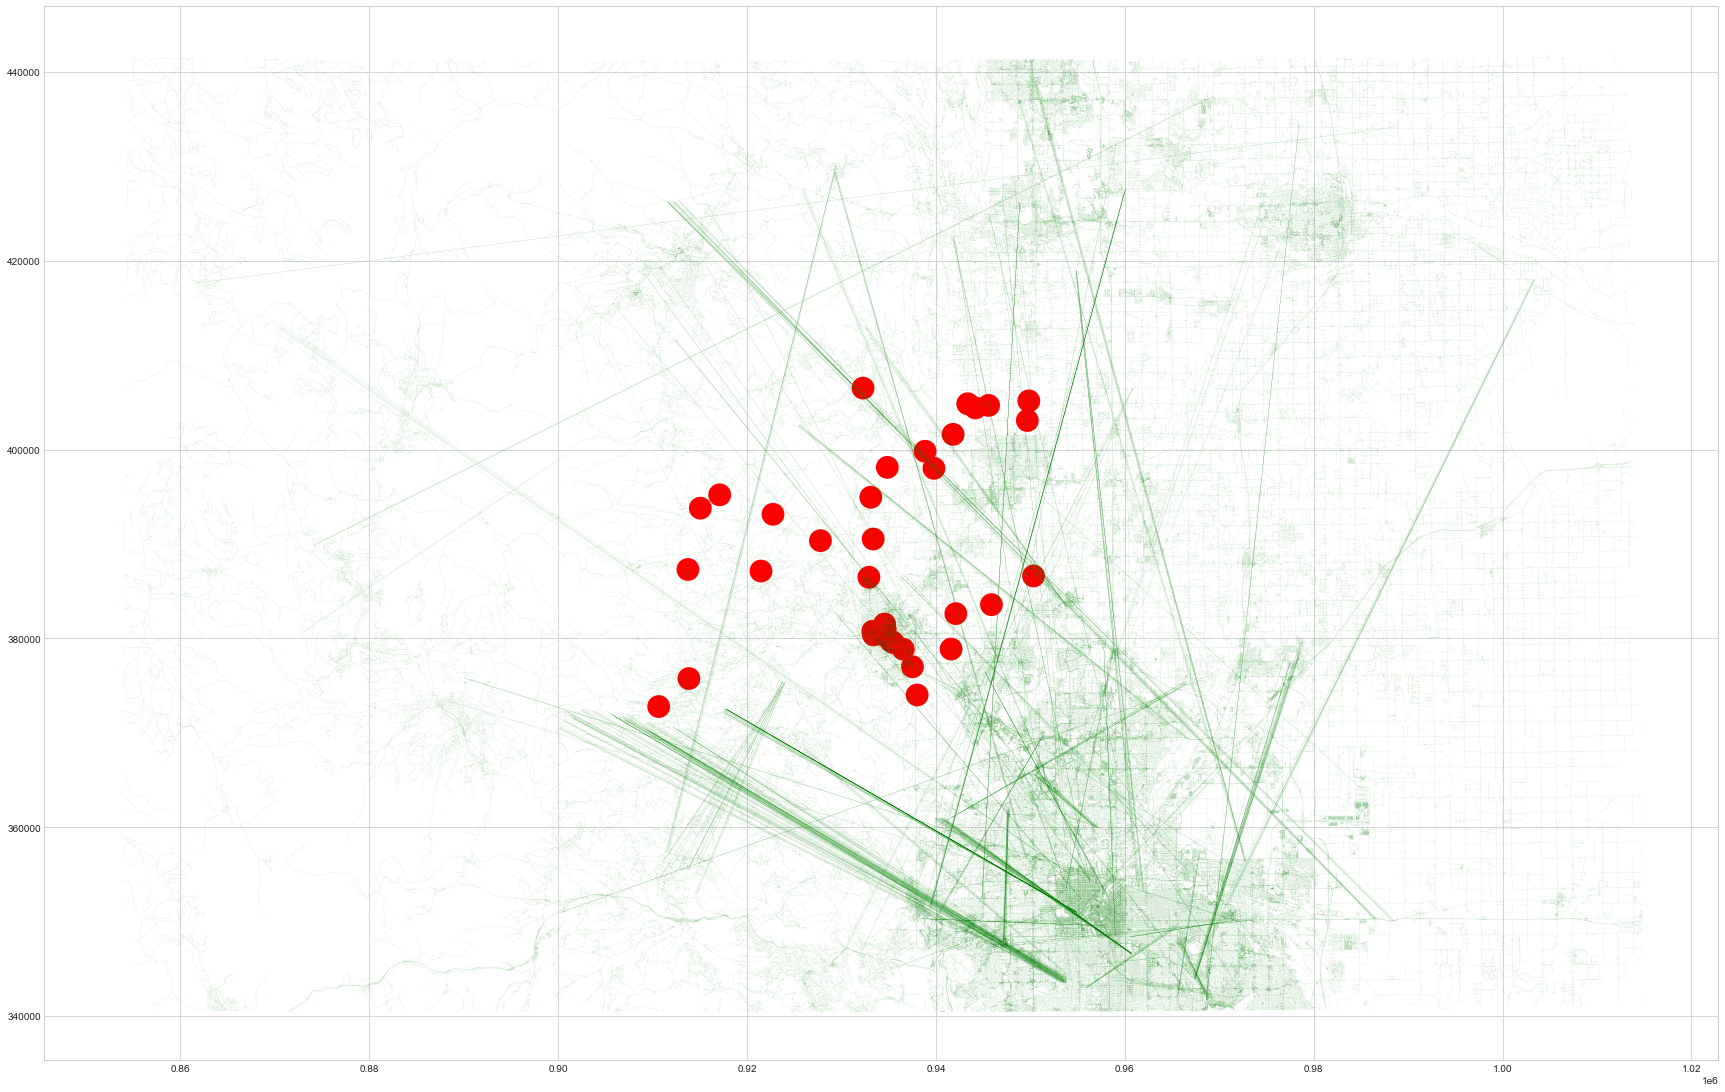

In [1122]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
road_proj.plot(color="green",edgecolor='k',linewidth = 0.05,ax=ax) #Use your second dataframe

#Clip road file with buffer file

In [1123]:
# Clip the data using GeoPandas clip
buffer_clip_road = gpd.clip(road_proj, gdf1)
buffer_clip_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id              name   ref          type  oneway  bridge  maxspeed  \
0  4271726       30th Street  None      tertiary       1       0      20.0   
4  4325613  Innovation Drive  None  unclassified       0       0      20.0   
5  4325623              None  None       service       0       0      10.0   
6  4360212   Colorado Avenue  None     secondary       1       0      35.0   
7  4375030              None  None       footway       0       0       NaN   

                                            geometry  
0  LINESTRING (935485.516 378614.897, 935486.285 ...  
4  LINESTRING (935885.443 379827.373, 935885.592 ...  
5  LINESTRING (934470.115 379661.506, 934438.695 ...  
6  LINESTRING (935386.797 379669.964, 935413.476 ...  
7  LINESTRING (937388.697 378095.667, 937385.433 ...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


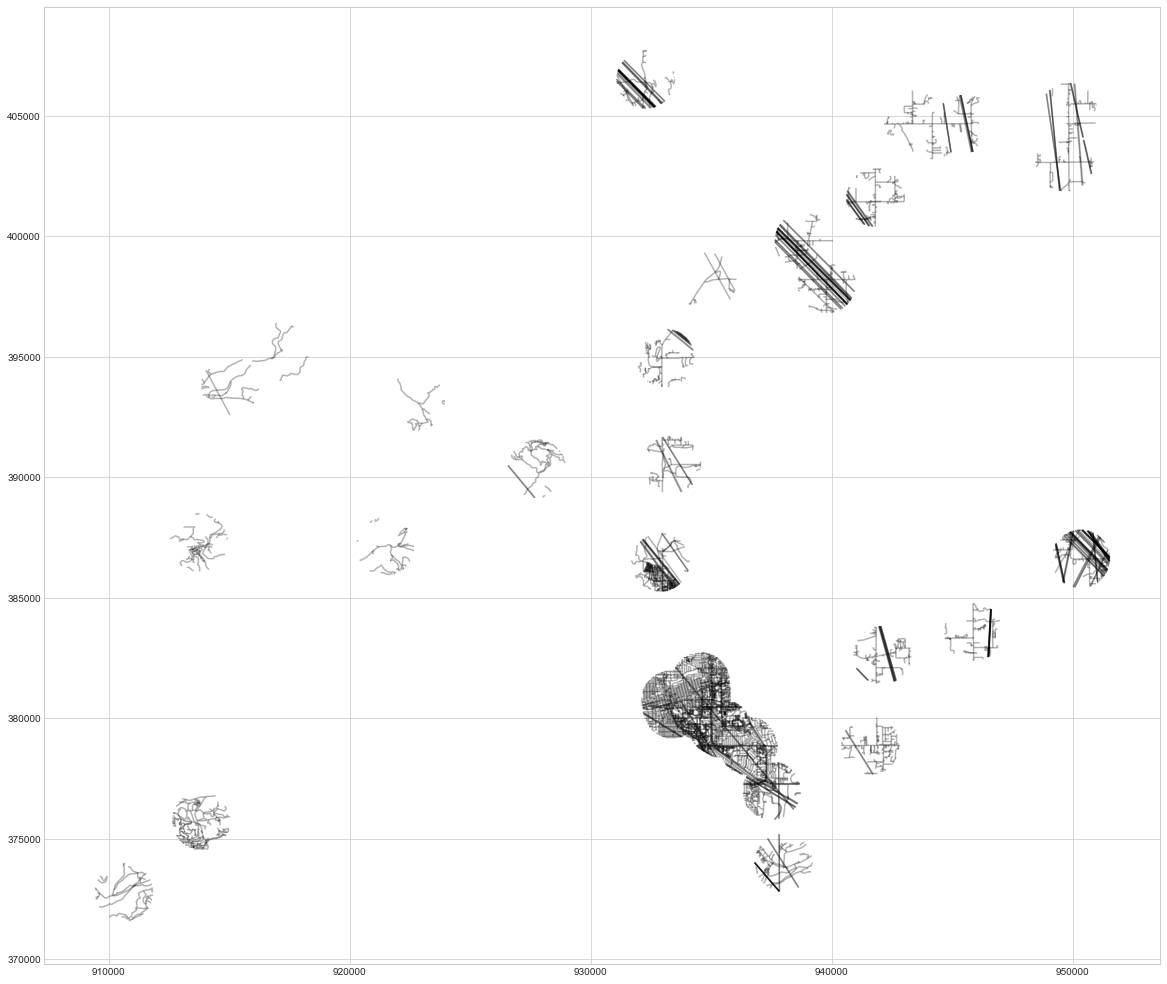

In [1124]:
ax = buffer_clip_road.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect

In [1125]:
 inter_road=gpd.overlay(gdf1, buffer_clip_road, how='intersection', make_valid=True, keep_geom_type=False)
 inter_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  comment  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
1             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
3             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
4             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   

   osm_id_sensor   osm_id              name   ref         type oneway bridge  \
0    385509341.0  6161081              None  None  residential      0      0   
1    385509341.0  6161153              None  None      service      0      0   
2    385509341.0  6161240              None  None  residential      0      0   
3    385509341.0  6166761  Eagle Cliff Road  None  residential      0      0   
4    385509341.0  8017637     Holiday Drive  None  residential      0      0   

   maxspeed                                           geometry  
0       NaN  MULTILINESTRING ((933504.445 385434.674, 93208...  
1       NaN  MULTILINESTRING ((932956.625 387683.209, 93405...  
2       NaN  LINESTRING (933762.061 385633.044, 932372.487 ...  
3       NaN  LINESTRING (933469.439 385413.845, 932056.232 ...  
4      20.0  LINESTRING (933186.128 385536.747, 933194.174 ...  

[5 rows x 22 columns]

# Calculate the length of the road segments

In [1126]:
inter_road["Length"]=inter_road["geometry"].length*3.28084 # in ft
inter_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...   
1             3.0  206.745402  102.547945  14.027397    218.0  ...   
2             3.0  206.745402  102.547945  14.027397    218.0  ...   
3             3.0  206.745402  102.547945  14.027397    218.0  ...   
4             3.0  206.745402  102.547945  14.027397    218.0  ...   

   osm_id_sensor   osm_id              name   ref         type oneway bridge  \
0    385509341.0  6161081              None  None  residential      0      0   
1    385509341.0  6161153              None  None      service      0      0   
2    385509341.0  6161240              None  None  residential      0      0   
3    385509341.0  6166761  Eagle Cliff Road  None  residential      0      0   
4    385509341.0  8017637     Holiday Drive  None  residential      0      0   

  maxspeed                                           geometry        Length  
0      NaN  MULTILINESTRING ((933504.445 385434.674, 93208...  15704.014564  
1      NaN  MULTILINESTRING ((932956.625 387683.209, 93405...  12528.081570  
2      NaN  LINESTRING (933762.061 385633.044, 932372.487 ...   7800.264716  
3      NaN  LINESTRING (933469.439 385413.845, 932056.232 ...   7837.018887  
4     20.0  LINESTRING (933186.128 385536.747, 933194.174 ...    596.021395  

[5 rows x 23 columns]

# Aggregrate the road functional class

In [1127]:
output_roadfc=inter_road.groupby(by=['osm_id_sensor','type'])['Length'].sum()
output_roadfc

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  type        
17013477.0     residential     26351.967937
               secondary       10846.532489
               service          7367.599327
               tertiary         5142.987422
               track            8300.789509
                                   ...     
445086793.0    service         45289.584106
               steps              19.061480
               tertiary         1747.804919
               track            1604.064398
               unclassified    16724.853909
Name: Length, Length: 315, dtype: float64

# Calculate the primary road

In [1128]:
primary= inter_road[inter_road['type'].str.contains('primary')]
output_primary=primary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_primary.columns=["osm_id","Primary"]
output_primary.head()

osm_id      Primary
0  17021754.0  8039.379854
1  17022948.0  7796.425906
2  17024738.0  8409.327084
3  17025704.0  4788.105193
4  17027097.0  8636.372605

In [1129]:
# Calculate secondary
secondary= inter_road[inter_road['type'].str.contains('secondary')]
output_secondary=secondary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_secondary.columns=["osm_id","Secondary"]
output_secondary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Secondary
0  17013477.0  10846.532489
1  17016731.0  14194.404822
2  17025704.0  10794.760372
3  17027097.0   4435.439447
4  33869417.0   4845.184427

In [1130]:
# Calculate tertiary
tertiary= inter_road[inter_road['type'].str.contains('tertiary')]
output_tertiary=tertiary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_tertiary.columns=["osm_id","Tertiary"]
output_tertiary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Tertiary
0  17013477.0  5142.987422
1  17018038.0  8453.396067
2  17018364.0  9756.387518
3  17018830.0  7811.808584
4  17021754.0  4406.897286

In [1131]:
# Calculate residential
residential= inter_road[inter_road['type'].str.contains('residential')]
output_residential= residential.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_residential.columns=["osm_id","Residential_Road"]
output_residential.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Residential_Road
0  17013477.0      26351.967937
1  17016731.0       4905.105487
2  17018038.0       2329.996250
3  17018364.0       6157.103825
4  17018830.0      19265.249817

In [1132]:
# Calculate path
path= inter_road[inter_road['type'].str.contains('path')]
output_path= path.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_path.columns=["osm_id","Path"]
output_path.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id           Path
0  17016731.0   10620.860568
1  17018830.0  216485.954904
2  17021754.0   13044.194955
3  17022948.0    8360.182454
4  17024738.0  199978.089091

In [1133]:
# calculate cycleway
# Calculate path
cycleway = inter_road[inter_road['type'].str.contains('cycleway')]
output_cycleway = cycleway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_cycleway.columns=["osm_id","Cycleway"] 
output_cycleway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Cycleway
0  17027097.0  19314.192392
1  33869417.0  15077.375057
2  37998424.0  19336.538622
3  43176757.0  16894.559456
4  43313642.0  13477.500434

In [1134]:
# Calculate footway
footway = inter_road[inter_road['type'].str.contains('footway')]
output_footway = footway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_footway.columns=["osm_id","Footway"] 
output_footway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id        Footway
0  17025704.0    1274.588170
1  33869417.0   86865.328971
2  37998424.0  156796.793551
3  43176757.0  162383.075208
4  43181540.0     618.180340

# Calculcate the mean Speed

In [1135]:
# Exclude NAN and zero value first then take the mean
inter_road.maxspeed.describe()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    4843.000000
mean       27.415858
std         8.973945
min        10.000000
25%        20.000000
50%        25.000000
75%        35.000000
max        65.000000
Name: maxspeed, dtype: float64

In [1136]:
# Consider rows without NAN
inter_road1 = inter_road[inter_road['maxspeed'].notna()]
inter_road1.head(5) 

site_id                      site_name sensor_type  year   region  \
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
5  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
6  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
7  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
8  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
4             3.0  206.745402  102.547945  14.027397    218.0  ...   
5             3.0  206.745402  102.547945  14.027397    218.0  ...   
6             3.0  206.745402  102.547945  14.027397    218.0  ...   
7             3.0  206.745402  102.547945  14.027397    218.0  ...   
8             3.0  206.745402  102.547945  14.027397    218.0  ...   

   osm_id_sensor   osm_id                name   ref         type oneway  \
4    385509341.0  8017637       Holiday Drive  None  residential      0   
5    385509341.0  8017638        Zamia Avenue  None  residential      0   
6    385509341.0  8017639        Zamia Avenue  None  residential      0   
7    385509341.0  8017641     Easy Rider Lane  None  residential      0   
8    385509341.0  8017642  Yellow Pine Avenue  None  residential      0   

  bridge maxspeed                                           geometry  \
4      0     20.0  LINESTRING (933186.128 385536.747, 933194.174 ...   
5      0     20.0  LINESTRING (933186.191 385617.922, 933193.707 ...   
6      0     20.0  LINESTRING (933384.371 385620.094, 933388.185 ...   
7      0     20.0  LINESTRING (933284.087 385618.732, 933284.066 ...   
8      0     20.0  LINESTRING (933384.730 385521.554, 933393.039 ...   

       Length  
4  596.021395  
5  650.241317  
6  568.816871  
7  535.339329  
8  660.909626  

[5 rows x 23 columns]

In [1137]:
road_proj_type11=inter_road1 [inter_road1 ['type']=='primary']                          
road_proj_type22=inter_road1 [inter_road1 ['type']=='secondary']
road_proj_type33=inter_road1[inter_road1 ['type']=='tertiary']
road_proj_type44=inter_road1 [inter_road1 ['type']=='residential']
road_proj_type55=inter_road1 [inter_road1 ['type']=='path']
road_proj_type66=inter_road1 [inter_road1 ['type']=='cycleway']
road_proj_type77=inter_road1 [inter_road1 ['type']=='footway']
road_proj_types=pd.concat([road_proj_type11,road_proj_type22,road_proj_type33,road_proj_type44,road_proj_type55,road_proj_type66,road_proj_type77],axis=0).reset_index()
road_proj_types.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id                      site_name sensor_type  year   region  \
0     22  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1     23  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2     34  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3     67  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4     87  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  ...  osm_id_sensor  \
0             3.0  206.745402  102.547945  14.027397  ...    385509341.0   
1             3.0  206.745402  102.547945  14.027397  ...    385509341.0   
2             3.0  206.745402  102.547945  14.027397  ...    385509341.0   
3             3.0  206.745402  102.547945  14.027397  ...    385509341.0   
4             3.0  206.745402  102.547945  14.027397  ...    385509341.0   

      osm_id                     name         ref     type  oneway bridge  \
0   17020875              28th Street       US 36  primary       0      0   
1   17020876              28th Street       US 36  primary       1      0   
2   17024098  North Foothills Highway  US 36;CO 7  primary       1      0   
3   43339693              28th Street       US 36  primary       1      0   
4  118356969  North Foothills Highway  US 36;CO 7  primary       1      0   

  maxspeed                                           geometry      Length  
0     55.0  LINESTRING (933378.844 385776.124, 933217.494 ...  892.061571  
1     55.0  LINESTRING (933167.483 385947.141, 933156.275 ...  257.164248  
2     55.0  LINESTRING (933050.654 386087.297, 933029.106 ...  632.524206  
3     55.0  LINESTRING (933038.310 386069.901, 933049.333 ...  446.448780  
4     55.0  LINESTRING (932966.846 386198.433, 932980.195 ...  383.357094  

[5 rows x 24 columns]

In [1138]:
# Then remove the rows with zero speed
inter_road2 = road_proj_types[road_proj_types.maxspeed != 0]
inter_road2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id                      site_name sensor_type  year   region  \
0     22  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1     23  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2     34  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3     67  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4     87  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  ...  osm_id_sensor  \
0             3.0  206.745402  102.547945  14.027397  ...    385509341.0   
1             3.0  206.745402  102.547945  14.027397  ...    385509341.0   
2             3.0  206.745402  102.547945  14.027397  ...    385509341.0   
3             3.0  206.745402  102.547945  14.027397  ...    385509341.0   
4             3.0  206.745402  102.547945  14.027397  ...    385509341.0   

      osm_id                     name         ref     type  oneway bridge  \
0   17020875              28th Street       US 36  primary       0      0   
1   17020876              28th Street       US 36  primary       1      0   
2   17024098  North Foothills Highway  US 36;CO 7  primary       1      0   
3   43339693              28th Street       US 36  primary       1      0   
4  118356969  North Foothills Highway  US 36;CO 7  primary       1      0   

  maxspeed                                           geometry      Length  
0     55.0  LINESTRING (933378.844 385776.124, 933217.494 ...  892.061571  
1     55.0  LINESTRING (933167.483 385947.141, 933156.275 ...  257.164248  
2     55.0  LINESTRING (933050.654 386087.297, 933029.106 ...  632.524206  
3     55.0  LINESTRING (933038.310 386069.901, 933049.333 ...  446.448780  
4     55.0  LINESTRING (932966.846 386198.433, 932980.195 ...  383.357094  

[5 rows x 24 columns]

In [1139]:
# Now calculate the mean speed for each count location
output_meanspeed=inter_road2.groupby(by=['osm_id_sensor'])['maxspeed'].apply(pd.Series.mode).reset_index() # revised
output_meanspeed=output_meanspeed.drop(['level_1'],axis=1)
output_meanspeed.columns=['osm_id','maxspeed']
output_meanspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  maxspeed
0  17013477.0      15.0
1  17013477.0      40.0
2  17016731.0      50.0
3  17018830.0      15.0
4  17021754.0      60.0

# Calculate the point speed of the link over which count location exist, 
# Intersect or within or overlap function does not work for sjoin unless the count location exactly over the link, in that case zero results willl be produced. To avoid zero output, nearest link from count station has been claculated like ARcGIS spatial GISJOIN.

In [1140]:
def min_distance_pline(point, line):
    return line.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1141]:
ecoshort.head()

site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor                       geometry  min_dist_to_school  \
0    385509341.0  POINT (932901.665 386478.901)         5155.748831   
1     43176757.0  POINT (934626.854 380273.771)         2995.203388   
2    439968204.0  POINT (934566.338 381533.917)         1809.498034   
3     43313642.0  POINT (934625.443 380996.780)         1954.097262   
4     46148772.0  POINT (933316.523 380773.375)         1671.759654   

   min_dist_to_college  min_dist_to_university lanes  
0         22889.223647            14959.494580     2  
1          3427.045328             1166.086558     3  
2          6857.187175             3806.818604     1  
3          5322.953049             2219.966504     4  
4          4333.880131             3434.960037     1

In [1142]:
road_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                     name    ref          type  oneway  bridge  \
0  4271726              30th Street   None      tertiary       1       0   
1  4279016         Table Mesa Court   None   residential       0       0   
2  4280551            Stephens Road   None   residential       0       0   
3  4322008  Denver-Boulder Turnpike  US 36      motorway       1       0   
4  4325613         Innovation Drive   None  unclassified       0       0   

   maxspeed                                           geometry  
0      20.0  LINESTRING (935485.516 378614.897, 935486.285 ...  
1      20.0  LINESTRING (934890.955 376659.816, 934891.229 ...  
2      20.0  LINESTRING (934669.155 376762.300, 934722.873 ...  
3      65.0  LINESTRING (952312.641 363801.740, 952349.731 ...  
4      20.0  LINESTRING (935885.443 379827.373, 935885.592 ...

In [1143]:
print(road_proj.crs)
print(ecoshort.crs)

epsg:2772
epsg:2772


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1144]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id                       name     ref     type  oneway  bridge  \
0     21  6142916     North Cleveland Avenue  US 287  primary       1       0   
1    301  6147016            Fall River Road   US 34  primary       1       0   
2   1797  6164772  East Eisenhower Boulevard   US 34  primary       1       0   
3   2009  6165156         Park Entrance Road   US 36  primary       0       0   
4   2010  6165157         Park Entrance Road   US 36  primary       1       0   

   maxspeed                                           geometry  
0      35.0  LINESTRING (950527.849 424121.552, 950527.784 ...  
1       NaN  LINESTRING (906387.099 423817.717, 906405.377 ...  
2       NaN  LINESTRING (950344.601 424120.808, 950380.401 ...  
3      25.0  LINESTRING (907176.009 419448.843, 907204.569 ...  
4      35.0  LINESTRING (910287.637 419175.925, 910269.121 ...

# In the below pline distance, you can see counter is located little far away from the link

In [1145]:
#ecoshort['min_distance_pline'] = ecoshort.geometry.apply(min_distance_pline, args=(road_proj,))*3.28084
#ecoshort

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1146]:
#ecoshort.min_distance_pline.plot(xlabel="Index of Count ID",ylabel="Distance from count station to nearest link in ft")

# we need consider nearest distance link

# Remove the NAN and Zero speed link first from road shape file

In [1147]:
road_proj1=road_proj_type[road_proj_type['maxspeed'].notna()]
road_proj2=road_proj1[road_proj1.maxspeed != 0]

In [1148]:
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'maxspeed']

ecoshort['maxspeed'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj2)
ecoshort
ecoshort_speed=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1149]:
# Now merged with road shape file
#pt_speed=pd.merge(ecoshort_speed, road_proj2, right_on='osm_id', left_on='osm_id',how='inner')
pt_speed=ecoshort_speed
pt_speed.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor                       geometry  min_dist_to_school  \
0    385509341.0  POINT (932901.665 386478.901)         5155.748831   
1     43176757.0  POINT (934626.854 380273.771)         2995.203388   
2    439968204.0  POINT (934566.338 381533.917)         1809.498034   
3     43313642.0  POINT (934625.443 380996.780)         1954.097262   
4     46148772.0  POINT (933316.523 380773.375)         1671.759654   

   min_dist_to_college  min_dist_to_university lanes  maxspeed  
0         22889.223647            14959.494580     2      55.0  
1          3427.045328             1166.086558     3      30.0  
2          6857.187175             3806.818604     1      20.0  
3          5322.953049             2219.966504     4      30.0  
4          4333.880131             3434.960037     1      20.0

In [1150]:
# Now merged with road shape file based on OSM ID
pt_speed_v1=pd.merge(ecoshort, road_proj2, right_on='osm_id', left_on='osm_id_sensor',how='inner')
pt_speed_v1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...   
1             2.0  479.543452   29.739726  10.452055   5359.0  ...   
2             1.0  607.273809   52.397260  16.424658   4518.0  ...   
3             2.0  502.851786   29.904110   9.972603   3750.0  ...   
4             2.0  601.530238   20.808219   9.095890   2382.0  ...   

   maxspeed_x   index     osm_id                     name         ref  \
0        55.0  143392  385509341  North Foothills Highway  US 36;CO 7   
1        30.0   51860   43176757            Folsom Street        None   
2        20.0  158849  439968204            Folsom Street        None   
3        30.0   52021   43313642            Folsom Street        None   
4        20.0   55390   46148772              13th Street        None   

          type  oneway  bridge maxspeed_y  \
0      primary       0       0       55.0   
1     tertiary       0       0       30.0   
2    secondary       0       0       30.0   
3    secondary       0       0       30.0   
4  residential       1       0       20.0   

                                          geometry_y  
0  LINESTRING (932956.462 386255.156, 932947.544 ...  
1  LINESTRING (934628.677 380310.973, 934628.620 ...  
2  LINESTRING (934600.130 381368.993, 934594.427 ...  
3  LINESTRING (934626.116 380946.521, 934626.297 ...  
4  LINESTRING (933355.442 380641.017, 933352.474 ...  

[5 rows x 29 columns]

In [1151]:
c1=pt_speed_v1[pt_speed_v1['osm_id_sensor']==439968204]
c1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id       site_name sensor_type  year   region  travel_pattern  \
2  P003BOU  Folsom at Pine   permanent  2019  Boulder             1.0   

        AADBT   stv_adb  stv_c_adb  stl_raw  ...  maxspeed_x   index  \
2  607.273809  52.39726  16.424658   4518.0  ...        20.0  158849   

      osm_id           name   ref       type  oneway  bridge maxspeed_y  \
2  439968204  Folsom Street  None  secondary       0       0       30.0   

                                          geometry_y  
2  LINESTRING (934600.130 381368.993, 934594.427 ...  

[1 rows x 29 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

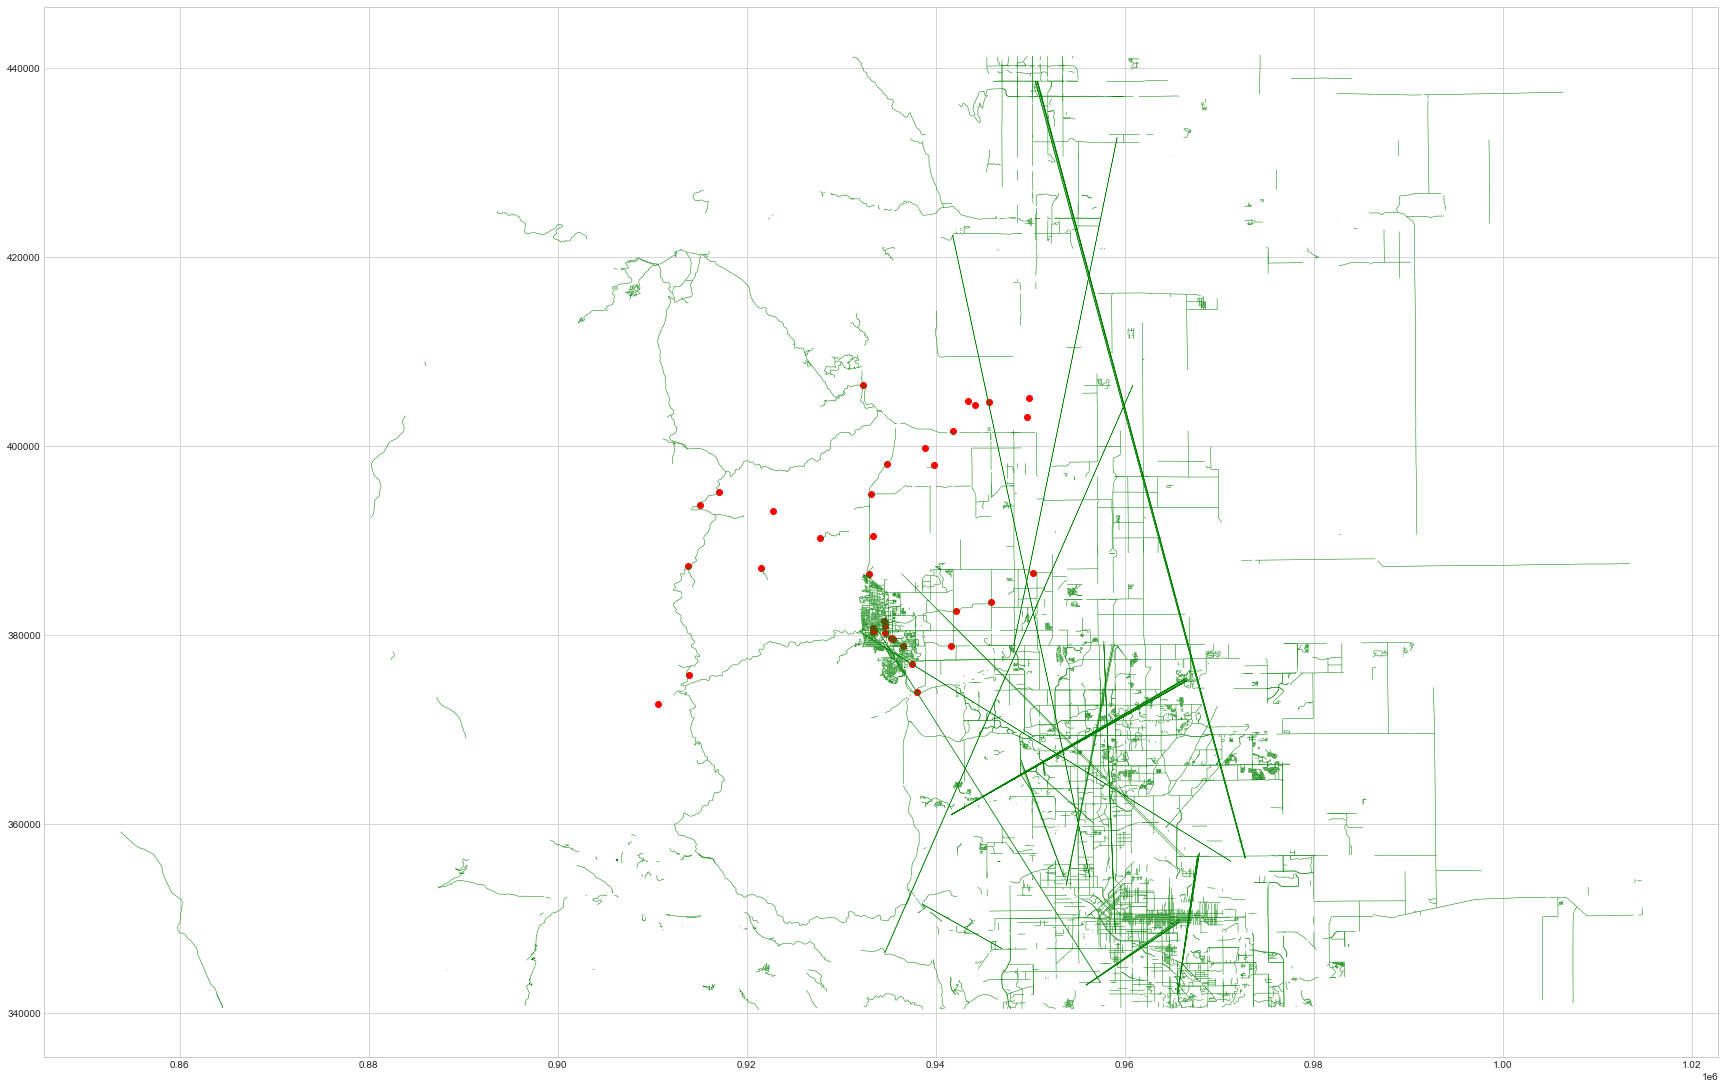

In [1152]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="red")
road_proj2.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

In [1153]:
# Now calculate the mean speed for each count location
output_pointspeed=pt_speed.groupby(by=['osm_id_sensor'])['maxspeed'].mean().reset_index()
output_pointspeed

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  maxspeed
0      17013477.0      40.0
1      17016731.0      50.0
2      17018038.0      20.0
3      17018364.0      35.0
4      17018830.0      15.0
5      17021754.0      60.0
6      17022894.0      35.0
7      17022948.0      35.0
8      17024738.0      25.0
9      17025168.0      35.0
10     17025704.0      45.0
11     17026172.0      30.0
12     17027097.0      50.0
13     17027290.0      20.0
14     33869417.0      30.0
15     37998424.0      35.0
16     43176757.0      30.0
17     43181540.0      45.0
18     43313642.0      30.0
19     43751772.0      35.0
20     46148772.0      20.0
21     46168750.0      40.0
22     46331123.0      45.0
23     48487064.0      40.0
24     48488846.0      60.0
25     89383623.0      40.0
26     90285789.0      60.0
27     92826267.0      30.0
28     97343136.0      50.0
29    132769465.0      45.0
30    212055825.0      35.0
31    327522296.0      35.0
32    385509341.0      55.0
33    397727284.0      40.0
34    439968204.0      20.0
35    445086793.0      20.0

In [1154]:
output_pointspeed.columns=["osm_id","Point Speed"]
output_pointspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Speed
0  17013477.0         40.0
1  17016731.0         50.0
2  17018038.0         20.0
3  17018364.0         35.0
4  17018830.0         15.0

In [1155]:
pt_speed_v1.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['site_id', 'site_name', 'sensor_type', 'year', 'region',
       'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'latitude', 'longitude', 'comment', 'osm_id_sensor', 'geometry_x',
       'min_dist_to_school', 'min_dist_to_college', 'min_dist_to_university',
       'lanes', 'maxspeed_x', 'index', 'osm_id', 'name', 'ref', 'type',
       'oneway', 'bridge', 'maxspeed_y', 'geometry_y'],
      dtype='object')

In [1156]:
# Now calculate the mean speed for each count location
output_pointspeed_v2=pt_speed_v1.groupby(by=['osm_id_sensor'])['maxspeed_x'].mean().reset_index()
output_pointspeed_v2.columns=['osm_id','maxspeed']
output_pointspeed_v2

osm_id  maxspeed
0    17024738.0      25.0
1    17027097.0      50.0
2    37998424.0      35.0
3    43176757.0      30.0
4    43181540.0      45.0
5    43313642.0      30.0
6    46148772.0      20.0
7    46168750.0      40.0
8    46331123.0      45.0
9    89383623.0      40.0
10   97343136.0      50.0
11  132769465.0      45.0
12  385509341.0      55.0
13  397727284.0      40.0
14  439968204.0      20.0

# Calculate the road type of the closest link of count station

In [1157]:
# Keep only functional class of road that we considered in our study to create catagorical varaibale

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1158]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id                       name     ref     type  oneway  bridge  \
0     21  6142916     North Cleveland Avenue  US 287  primary       1       0   
1    301  6147016            Fall River Road   US 34  primary       1       0   
2   1797  6164772  East Eisenhower Boulevard   US 34  primary       1       0   
3   2009  6165156         Park Entrance Road   US 36  primary       0       0   
4   2010  6165157         Park Entrance Road   US 36  primary       1       0   

   maxspeed                                           geometry  
0      35.0  LINESTRING (950527.849 424121.552, 950527.784 ...  
1       NaN  LINESTRING (906387.099 423817.717, 906405.377 ...  
2       NaN  LINESTRING (950344.601 424120.808, 950380.401 ...  
3      25.0  LINESTRING (907176.009 419448.843, 907204.569 ...  
4      35.0  LINESTRING (910287.637 419175.925, 910269.121 ...

In [1159]:
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
 #   return df_lines.loc[idx, 'type']

#ecoshort['type'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort
#ecoshort_rt=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1160]:
# Now merged with road shape file
#road_merged_inner=pd.merge(ecoshort_speed, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#ecoshort_rt.head()

In [1161]:
road_merged_inner = pd.merge(left=road_proj_type, right=ecoshort, left_on='osm_id', right_on='osm_id_sensor',how='inner')
road_merged_inner.head()

index     osm_id                     name         ref       type  oneway  \
0  143392  385509341  North Foothills Highway  US 36;CO 7    primary       0   
1   35770   17027097              Nelson Road        None  secondary       0   
2   48922   37998424          Colorado Avenue        None  secondary       0   
3   52021   43313642            Folsom Street        None  secondary       0   
4   55765   46331123        North 95th Street        None  secondary       0   

   bridge  maxspeed_x                                         geometry_x  \
0       0        55.0  LINESTRING (932956.462 386255.156, 932947.544 ...   
1       0        50.0  LINESTRING (933055.688 394950.605, 933099.393 ...   
2       0        35.0  LINESTRING (935338.535 379689.972, 935326.153 ...   
3       0        30.0  LINESTRING (934626.116 380946.521, 934626.297 ...   
4       0        45.0  LINESTRING (945892.751 382722.147, 945893.188 ...   

   site_id  ...   latitude   longitude  comment osm_id_sensor  \
0  P001BOU  ...  40.068772 -105.283132      NaN   385509341.0   
1  S028BOU  ...  40.145061 -105.280535      NaN    17027097.0   
2  P009BOU  ...  40.007719 -105.255754      NaN    37998424.0   
3  P004BOU  ...  40.019358 -105.263097      NaN    43313642.0   
4  S013BOU  ...  40.042293 -105.131160      NaN    46331123.0   

                      geometry_y  min_dist_to_school  min_dist_to_college  \
0  POINT (932901.665 386478.901)         5155.748831         22889.223647   
1  POINT (933102.238 394949.960)        25802.753934         42578.242171   
2  POINT (935255.806 379706.294)         3396.601997          4612.212614   
3  POINT (934625.443 380996.780)         1954.097262          5322.953049   
4  POINT (945877.800 383581.734)         9590.604482         35146.860929   

   min_dist_to_university  lanes  maxspeed_y  
0            14959.494580      2        55.0  
1            41069.391945      2        50.0  
2             2730.245844      4        35.0  
3             2219.966504      4        30.0  
4            33698.009447      2        45.0  

[5 rows x 29 columns]

In [1162]:
# First identify the closest link from count station
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'osm_id']

#ecoshort['osm_id'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1163]:
# Now merge with road shape file with OSM ID
#closest_road_type=pd.merge(ecoshort, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#closest_road_type
road_merged_inner.columns


Index(['index', 'osm_id', 'name', 'ref', 'type', 'oneway', 'bridge',
       'maxspeed_x', 'geometry_x', 'site_id', 'site_name', 'sensor_type',
       'year', 'region', 'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb',
       'stl_raw', 'latitude', 'longitude', 'comment', 'osm_id_sensor',
       'geometry_y', 'min_dist_to_school', 'min_dist_to_college',
       'min_dist_to_university', 'lanes', 'maxspeed_y'],
      dtype='object')

In [1164]:
pt_road_type1=road_merged_inner.loc[:,['osm_id_sensor','type']]
pt_road_type1.columns=['osm_id','road_type']
pt_road_type1.head()

osm_id  road_type
0  385509341.0    primary
1   17027097.0  secondary
2   37998424.0  secondary
3   43313642.0  secondary
4   46331123.0  secondary

# Convert this road catagory to binary as follows- 0 and 1

In [1165]:
import numpy as np
pt_road_type1['primary_binary'] = np.where(pt_road_type1['road_type'] == 'primary', 1, 0)
pt_road_type1['secondary_binary'] = np.where(pt_road_type1['road_type'] == 'secondary', 1, 0)
pt_road_type1['tertiary_binary'] = np.where(pt_road_type1['road_type'] == 'tertiary', 1, 0)
pt_road_type1['residential_binary'] = np.where(pt_road_type1['road_type'] == 'residential', 1, 0)
pt_road_type1['path_binary'] = np.where(pt_road_type1['road_type'] == 'path', 1, 0)
pt_road_type1['cycleway_binary'] = np.where(pt_road_type1['road_type'] == 'cycleway', 1, 0)
pt_road_type1['footway_binary'] = np.where(pt_road_type1['road_type'] == 'footway', 1, 0)
pt_road_type1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  road_type  primary_binary  secondary_binary  tertiary_binary  \
0  385509341.0    primary               1                 0                0   
1   17027097.0  secondary               0                 1                0   
2   37998424.0  secondary               0                 1                0   
3   43313642.0  secondary               0                 1                0   
4   46331123.0  secondary               0                 1                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

In [1166]:
pt_road_type2=pt_road_type1.drop(['road_type'],axis=1)
pt_road_type2.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  primary_binary  secondary_binary  tertiary_binary  \
0  385509341.0               1                 0                0   
1   17027097.0               0                 1                0   
2   37998424.0               0                 1                0   
3   43313642.0               0                 1                0   
4   46331123.0               0                 1                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

# Calculate the Bridges

In [1167]:
bridge=inter_road.copy()
output_bridge=bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
# Convert binary, presence of bridge=1, absence of bridge=0
output_bridge.loc[output_bridge['bridge'] > 0, 'bridge'] = 1
output_bridge.loc[output_bridge['bridge'] ==0, 'bridge'] = 2
output_bridge.columns=['osm_id','bridge']
output_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  bridge
0  17013477.0       2
1  17016731.0       1
2  17018038.0       2
3  17018364.0       1
4  17018830.0       1

# Calculate the bridge from spatial join of count location and bridge line shape file

In [1168]:
bridge_only=road_proj
bridge_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                     name    ref          type  oneway  bridge  \
0  4271726              30th Street   None      tertiary       1       0   
1  4279016         Table Mesa Court   None   residential       0       0   
2  4280551            Stephens Road   None   residential       0       0   
3  4322008  Denver-Boulder Turnpike  US 36      motorway       1       0   
4  4325613         Innovation Drive   None  unclassified       0       0   

   maxspeed                                           geometry  
0      20.0  LINESTRING (935485.516 378614.897, 935486.285 ...  
1      20.0  LINESTRING (934890.955 376659.816, 934891.229 ...  
2      20.0  LINESTRING (934669.155 376762.300, 934722.873 ...  
3      65.0  LINESTRING (952312.641 363801.740, 952349.731 ...  
4      20.0  LINESTRING (935885.443 379827.373, 935885.592 ...

In [1169]:
#count_station
bridge_only.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['osm_id', 'name', 'ref', 'type', 'oneway', 'bridge', 'maxspeed',
       'geometry'],
      dtype='object')

In [1170]:
# Join count location file with road file
pointInline_bridge =pd.merge (left=ecoshort, right=bridge_only, left_on='osm_id_sensor', right_on='osm_id',how='inner')
pointInline_bridge.head()

site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  lanes  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...      2   
1             2.0  479.543452   29.739726  10.452055   5359.0  ...      3   
2             1.0  607.273809   52.397260  16.424658   4518.0  ...      1   
3             2.0  502.851786   29.904110   9.972603   3750.0  ...      4   
4             2.0  601.530238   20.808219   9.095890   2382.0  ...      1   

   maxspeed_x     osm_id                     name         ref         type  \
0        55.0  385509341  North Foothills Highway  US 36;CO 7      primary   
1        30.0   43176757            Folsom Street        None     tertiary   
2        20.0  439968204            Folsom Street        None    secondary   
3        30.0   43313642            Folsom Street        None    secondary   
4        20.0   46148772              13th Street        None  residential   

   oneway  bridge maxspeed_y  \
0       0       0       55.0   
1       0       0       30.0   
2       0       0       30.0   
3       0       0       30.0   
4       1       0       20.0   

                                          geometry_y  
0  LINESTRING (932956.462 386255.156, 932947.544 ...  
1  LINESTRING (934628.677 380310.973, 934628.620 ...  
2  LINESTRING (934600.130 381368.993, 934594.427 ...  
3  LINESTRING (934626.116 380946.521, 934626.297 ...  
4  LINESTRING (933355.442 380641.017, 933352.474 ...  

[5 rows x 28 columns]

In [1171]:
# Join by OSM ID
#pointInline_bridge_v2 = pd.merge(left=bridge_only, right=count_station, left_on='osm_id', right_on='OSM_ID',how='inner')
#pointInline_bridge_v2


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1172]:
output_point_bridge=pointInline_bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
output_point_bridge.head()

osm_id_sensor  bridge
0     17013477.0       0
1     17016731.0       0
2     17018038.0       0
3     17018364.0       0
4     17018830.0       0

In [1173]:
output_point_bridge.loc[output_point_bridge['bridge'] > 0, 'bridge'] = 1
output_point_bridge.loc[output_point_bridge['bridge'] ==0, 'bridge'] = 2
output_point_bridge.columns=["osm_id","Point Bridge"]
output_point_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Bridge
0  17013477.0             2
1  17016731.0             2
2  17018038.0             2
3  17018364.0             2
4  17018830.0             2

# Calculate the Distance from count station to land use:Distance to water body, Distance to park,Distance to green space area,Distance to commercial,Distance to industrial area,Distance to residential area ,Distance to Retail area,Distance to Residential area



# Distance to park

In [1174]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1175]:
nature_proj1.head(5)

osm_id            name   type  \
0  12559765    Beattie Park   park   
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   

                                            geometry  
0  POLYGON ((949493.289 439485.899, 949493.890 43...  
1  POLYGON ((951244.135 428534.152, 951369.968 42...  
2  POLYGON ((953977.052 429201.052, 954080.914 42...  
3  POLYGON ((951092.866 424971.450, 951202.803 42...  
4  POLYGON ((949814.218 425574.299, 949819.443 42...

In [1176]:
park_only=nature_proj1[nature_proj1['type'].str.contains('park')]
park_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                        name  type  \
0   12559765                Beattie Park  park   
45  25676795  LoDo Children's Playground  park   
46  25679669          Harvard Gulch Park  park   
49  26296652                   City Park  park   
50  26297169               Cheesman Park  park   

                                             geometry  
0   POLYGON ((949493.289 439485.899, 949493.890 43...  
45  POLYGON ((956881.018 351201.297, 956882.152 35...  
46  POLYGON ((958778.105 342849.188, 959272.748 34...  
49  POLYGON ((960827.305 350529.123, 960817.775 35...  
50  POLYGON ((959945.320 348883.379, 959934.114 34...

In [1177]:
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor                       geometry  min_dist_to_school  \
0    385509341.0  POINT (932901.665 386478.901)         5155.748831   
1     43176757.0  POINT (934626.854 380273.771)         2995.203388   
2    439968204.0  POINT (934566.338 381533.917)         1809.498034   
3     43313642.0  POINT (934625.443 380996.780)         1954.097262   
4     46148772.0  POINT (933316.523 380773.375)         1671.759654   

   min_dist_to_college  min_dist_to_university lanes  maxspeed  
0         22889.223647            14959.494580     2      55.0  
1          3427.045328             1166.086558     3      30.0  
2          6857.187175             3806.818604     1      20.0  
3          5322.953049             2219.966504     4      30.0  
4          4333.880131             3434.960037     1      20.0

In [1178]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(park_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...   
1             2.0  479.543452   29.739726  10.452055   5359.0  ...   
2             1.0  607.273809   52.397260  16.424658   4518.0  ...   
3             2.0  502.851786   29.904110   9.972603   3750.0  ...   
4             2.0  601.530238   20.808219   9.095890   2382.0  ...   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

  osm_id_sensor                       geometry min_dist_to_school  \
0   385509341.0  POINT (932901.665 386478.901)        5155.748831   
1    43176757.0  POINT (934626.854 380273.771)        2995.203388   
2   439968204.0  POINT (934566.338 381533.917)        1809.498034   
3    43313642.0  POINT (934625.443 380996.780)        1954.097262   
4    46148772.0  POINT (933316.523 380773.375)        1671.759654   

   min_dist_to_college  min_dist_to_university  lanes maxspeed  \
0         22889.223647            14959.494580      2     55.0   
1          3427.045328             1166.086558      3     30.0   
2          6857.187175             3806.818604      1     20.0   
3          5322.953049             2219.966504      4     30.0   
4          4333.880131             3434.960037      1     20.0   

   min_dist_to_polygon  
0          1374.653322  
1          1696.260696  
2           296.513715  
3           479.445101  
4           508.736224  

[5 rows x 21 columns]

In [1179]:
Park_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
Park_distance1.columns=["osm_id","Distance to Park"]
Park_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park
0  385509341.0       1374.653322
1   43176757.0       1696.260696
2  439968204.0        296.513715
3   43313642.0        479.445101
4   46148772.0        508.736224

# cc distance to park

In [1180]:
parkcc=park_only.copy()
parkcc['geometry']=parkcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(parkcc,))*3.28084
parkcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
parkcc_distance1.columns=["osm_id","Distance to Park Center"]
parkcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park Center
0  385509341.0              1620.398950
1   43176757.0              1830.469596
2  439968204.0               369.300396
3   43313642.0               594.495259
4   46148772.0               813.471499

# Distance to water body

In [1181]:
water_only=nature_proj1[nature_proj1['type'].str.contains('water')]
water_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id            name   type  \
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   
5  23598968            None  water   

                                            geometry  
1  POLYGON ((951244.135 428534.152, 951369.968 42...  
2  POLYGON ((953977.052 429201.052, 954080.914 42...  
3  POLYGON ((951092.866 424971.450, 951202.803 42...  
4  POLYGON ((949814.218 425574.299, 949819.443 42...  
5  POLYGON ((954738.009 440768.701, 954742.314 44...

In [1182]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(water_only,))*3.28084
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...   
1             2.0  479.543452   29.739726  10.452055   5359.0  ...   
2             1.0  607.273809   52.397260  16.424658   4518.0  ...   
3             2.0  502.851786   29.904110   9.972603   3750.0  ...   
4             2.0  601.530238   20.808219   9.095890   2382.0  ...   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

  osm_id_sensor                       geometry min_dist_to_school  \
0   385509341.0  POINT (932901.665 386478.901)        5155.748831   
1    43176757.0  POINT (934626.854 380273.771)        2995.203388   
2   439968204.0  POINT (934566.338 381533.917)        1809.498034   
3    43313642.0  POINT (934625.443 380996.780)        1954.097262   
4    46148772.0  POINT (933316.523 380773.375)        1671.759654   

   min_dist_to_college  min_dist_to_university  lanes maxspeed  \
0         22889.223647            14959.494580      2     55.0   
1          3427.045328             1166.086558      3     30.0   
2          6857.187175             3806.818604      1     20.0   
3          5322.953049             2219.966504      4     30.0   
4          4333.880131             3434.960037      1     20.0   

   min_dist_to_polygon  
0          4666.952544  
1          2071.785548  
2          1297.167240  
3          3023.108559  
4          2101.625691  

[5 rows x 21 columns]

In [1183]:
water_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
water_distance1.columns=["osm_id","Distance to Water Body"]
water_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Body
0  385509341.0             4666.952544
1   43176757.0             2071.785548
2  439968204.0             1297.167240
3   43313642.0             3023.108559
4   46148772.0             2101.625691

In [1184]:
watercc=water_only.copy()
watercc['geometry']=watercc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(watercc,))*3.28084
watercc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
watercc_distance1.columns=["osm_id","Distance to Water Center"]
watercc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Center
0  385509341.0               5257.524772
1   43176757.0               2167.563630
2  439968204.0               1333.019459
3   43313642.0               3063.334585
4   46148772.0               2214.070258

# Distance To  Forest

In [1185]:
forest_only=nature_proj1[nature_proj1['type'].str.contains('forest')]
forest_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name    type  \
1447  41932584  None  forest   
1448  41932620  None  forest   
2587  62961278  None  forest   
2588  63415103  None  forest   
2589  63415288  None  forest   

                                               geometry  
1447  POLYGON ((939710.353 390625.315, 939703.760 39...  
1448  POLYGON ((939713.380 390594.702, 939719.223 39...  
2587  POLYGON ((933947.270 363575.838, 933920.439 36...  
2588  POLYGON ((935754.317 362512.643, 935780.392 36...  
2589  POLYGON ((934042.722 362816.850, 934094.066 36...

In [1186]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forest_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...   
1             2.0  479.543452   29.739726  10.452055   5359.0  ...   
2             1.0  607.273809   52.397260  16.424658   4518.0  ...   
3             2.0  502.851786   29.904110   9.972603   3750.0  ...   
4             2.0  601.530238   20.808219   9.095890   2382.0  ...   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

  osm_id_sensor                       geometry min_dist_to_school  \
0   385509341.0  POINT (932901.665 386478.901)        5155.748831   
1    43176757.0  POINT (934626.854 380273.771)        2995.203388   
2   439968204.0  POINT (934566.338 381533.917)        1809.498034   
3    43313642.0  POINT (934625.443 380996.780)        1954.097262   
4    46148772.0  POINT (933316.523 380773.375)        1671.759654   

   min_dist_to_college  min_dist_to_university  lanes maxspeed  \
0         22889.223647            14959.494580      2     55.0   
1          3427.045328             1166.086558      3     30.0   
2          6857.187175             3806.818604      1     20.0   
3          5322.953049             2219.966504      4     30.0   
4          4333.880131             3434.960037      1     20.0   

   min_dist_to_polygon  
0         10501.058727  
1           439.950039  
2          4049.744849  
3          2812.011482  
4           657.880401  

[5 rows x 21 columns]

In [1187]:
forest_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forest_distance1.columns=["osm_id","Distance to forest"]
forest_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to forest
0  385509341.0        10501.058727
1   43176757.0          439.950039
2  439968204.0         4049.744849
3   43313642.0         2812.011482
4   46148772.0          657.880401

In [1188]:
forestcc=forest_only.copy()
forestcc['geometry']=forestcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forestcc,))*3.28084
forestcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forestcc_distance1.columns=["osm_id","Distance to Forest Center"]
forestcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Forest Center
0  385509341.0               11026.872825
1   43176757.0                 737.662844
2  439968204.0                4225.818084
3   43313642.0                2946.748465
4   46148772.0                 724.760022

# Distance to green space area

In [1189]:
grass_only=luse_proj[luse_proj['type'].str.contains('grass')]
grass_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name   type                                           geometry
1   27856736  None  grass  POLYGON ((956768.823 350793.686, 956775.894 35...
2   27856807  None  grass  POLYGON ((956897.910 350759.976, 956878.082 35...
3   33119314  None  grass  POLYGON ((957173.271 405544.031, 957071.255 40...
7   34267257  None  grass  POLYGON ((935448.855 377370.879, 935449.859 37...
11  34665831  None  grass  POLYGON ((958868.888 348681.680, 958794.842 34...

In [1190]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grass_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...   
1             2.0  479.543452   29.739726  10.452055   5359.0  ...   
2             1.0  607.273809   52.397260  16.424658   4518.0  ...   
3             2.0  502.851786   29.904110   9.972603   3750.0  ...   
4             2.0  601.530238   20.808219   9.095890   2382.0  ...   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

  osm_id_sensor                       geometry min_dist_to_school  \
0   385509341.0  POINT (932901.665 386478.901)        5155.748831   
1    43176757.0  POINT (934626.854 380273.771)        2995.203388   
2   439968204.0  POINT (934566.338 381533.917)        1809.498034   
3    43313642.0  POINT (934625.443 380996.780)        1954.097262   
4    46148772.0  POINT (933316.523 380773.375)        1671.759654   

   min_dist_to_college  min_dist_to_university  lanes maxspeed  \
0         22889.223647            14959.494580      2     55.0   
1          3427.045328             1166.086558      3     30.0   
2          6857.187175             3806.818604      1     20.0   
3          5322.953049             2219.966504      4     30.0   
4          4333.880131             3434.960037      1     20.0   

   min_dist_to_polygon  
0          2318.076913  
1          1282.583177  
2          4072.037198  
3          2567.203132  
4           337.107800  

[5 rows x 21 columns]

In [1191]:
grass_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grass_distance1.columns=["osm_id","Distance to Grass"]
grass_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass
0  385509341.0        2318.076913
1   43176757.0        1282.583177
2  439968204.0        4072.037198
3   43313642.0        2567.203132
4   46148772.0         337.107800

In [1192]:
grasscc=grass_only.copy()
grasscc['geometry']=grasscc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grasscc,))*3.28084
grasscc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grasscc_distance1.columns=["osm_id","Distance to Grass Center"]
grasscc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass Center
0  385509341.0               2722.155135
1   43176757.0               1312.505978
2  439968204.0               4115.020022
3   43313642.0               2609.251468
4   46148772.0                376.337130

# Distance to commercial

In [1193]:
commercial_only=luse_proj[luse_proj['type'].str.contains('commercial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercial_only,))*3.28084
commercial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercial_distance1.columns=["osm_id","Distance to Commercial Area"]
commercial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area
0  385509341.0                  2307.541525
1   43176757.0                  3248.639375
2  439968204.0                  1356.771780
3   43313642.0                  3069.552248
4   46148772.0                  2685.318000

In [1194]:
commercialcc=commercial_only.copy()
commercialcc['geometry']=commercialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercialcc,))*3.28084
commercialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercialcc_distance1.columns=["osm_id","Distance to Commercial Area Center"]
commercialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area Center
0  385509341.0                         2589.123703
1   43176757.0                         5009.789065
2  439968204.0                         1580.731775
3   43313642.0                         3311.858588
4   46148772.0                         2850.325098

# Distance to industrial area

In [1195]:
industrial_only=luse_proj[luse_proj['type'].str.contains('industrial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrial_only,))*3.28084
industrial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrial_distance1.columns=["osm_id","Distance to Industrial Area"]
industrial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Area
0  385509341.0                  1278.294408
1   43176757.0                  5913.557052
2  439968204.0                  5570.753256
3   43313642.0                  5707.993932
4   46148772.0                  8478.061292

In [1196]:
industrialcc=industrial_only.copy()
industrialcc['geometry']=industrialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrialcc,))*3.28084
industrialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrialcc_distance1.columns=["osm_id","Distance to Industrial Center"]
industrialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Center
0  385509341.0                    1661.358724
1   43176757.0                    7356.246859
2  439968204.0                    6113.978896
3   43313642.0                    6246.500776
4   46148772.0                    9888.563692

# Distance to Retail area

In [1197]:
retail_only=luse_proj[luse_proj['type'].str.contains('retail')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retail_only,))*3.28084
retail_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retail_distance1.columns=["osm_id","Distance to Retail Area"]
retail_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Area
0  385509341.0              7612.708041
1   43176757.0                90.046819
2  439968204.0               898.209137
3   43313642.0               755.202693
4   46148772.0                98.811627

In [1198]:
retailcc=retail_only.copy()
retailcc['geometry']=retailcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retailcc,))*3.28084
retailcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retailcc_distance1.columns=["osm_id","Distance to Retail Center"]
retailcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Center
0  385509341.0                7747.950312
1   43176757.0                 699.267869
2  439968204.0                1249.193314
3   43313642.0                1011.628480
4   46148772.0                 274.877841

# Distance to Residential

In [1199]:
residential_only=luse_proj[luse_proj['type'].str.contains('residential')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residential_only,))*3.28084
residential_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residential_distance1.columns=["osm_id","Distance to Residential Area"]
residential_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Area
0  385509341.0                   1866.797183
1   43176757.0                     18.326769
2  439968204.0                    559.079630
3   43313642.0                   1787.004237
4   46148772.0                   2276.790952

In [1200]:
residentialcc=residential_only.copy()
residentialcc['geometry']=residentialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residentialcc,))*3.28084
residentialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residentialcc_distance1.columns=["osm_id","Distance to Residential Center"]
residentialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Center
0  385509341.0                     1988.820553
1   43176757.0                      437.747658
2  439968204.0                     1193.369394
3   43313642.0                     2274.703848
4   46148772.0                     2400.267766

# Import the OSM Building file and use Portland City Hall as the CBD, then calculate the distance from CBD

In [1201]:
building1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name           type  \
0  25312645           Ball Arena     commercial   
1  25650822        Union Station  train_station   
2  25656689                 None         school   
3  25670806    One Union Station     commercial   
4  25670837  IMA Financial Plaza     commercial   

                                            geometry  
0  POLYGON ((-105.00817 39.74908, -105.00824 39.7...  
1  POLYGON ((-105.00082 39.75266, -105.00072 39.7...  
2  POLYGON ((-105.03333 39.75470, -105.03336 39.7...  
3  POLYGON ((-105.00151 39.75253, -105.00100 39.7...  
4  POLYGON ((-104.99925 39.75419, -104.99908 39.7...

In [1202]:
# Reproject the geometries by replacing the values with projected ones
bld_proj = building1.to_crs(epsg=2772)
bld_proj.head(10)
bld_proj1=bld_proj.loc[(bld_proj.name=='Municipal Building')]
bld_proj1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                name  type  \
10169  119530898  Municipal Building  None   

                                                geometry  
10169  POLYGON ((933208.093 380520.280, 933218.783 38...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

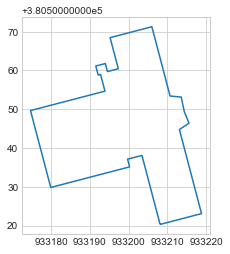

In [1203]:
bld_proj1.geometry.boundary.plot()

In [1204]:
# copy GeoDataFrame
bld_proj2 = bld_proj1.copy()
# change geometry 
bld_proj2['geometry'] = bld_proj2['geometry'].centroid
bld_proj2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                name  type                       geometry
10169  119530898  Municipal Building  None  POINT (933198.673 380544.899)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

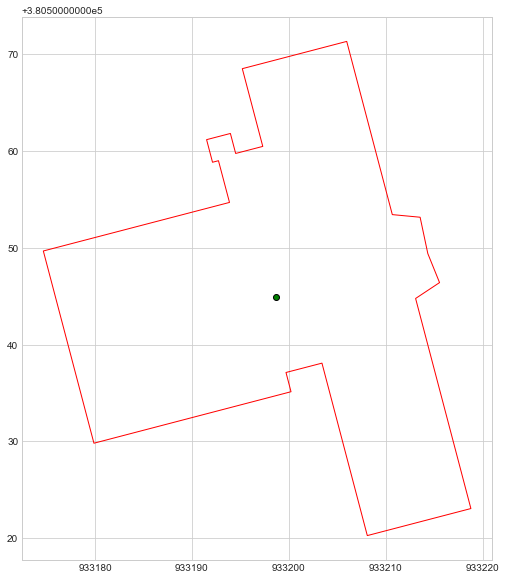

In [1205]:
fig, ax = plt.subplots(figsize = (15,10)) 
bld_proj2.plot(ax=ax,color="green",edgecolor='k')
bld_proj1.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

In [1206]:
# Calculate the distance from CBD to all count locations
ecoshort['min_dist_to_CBD'] = ecoshort.geometry.apply(min_distance_ppoly, args=(bld_proj2,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...   
1             2.0  479.543452   29.739726  10.452055   5359.0  ...   
2             1.0  607.273809   52.397260  16.424658   4518.0  ...   
3             2.0  502.851786   29.904110   9.972603   3750.0  ...   
4             2.0  601.530238   20.808219   9.095890   2382.0  ...   

                                             comment  osm_id_sensor  \
0                                                NaN    385509341.0   
1                                                NaN     43176757.0   
2  obsolete OSM link parallel to street link (Id=...    439968204.0   
3                                                NaN     43313642.0   
4                                                NaN     46148772.0   

                        geometry  min_dist_to_school min_dist_to_college  \
0  POINT (932901.665 386478.901)         5155.748831        22889.223647   
1  POINT (934626.854 380273.771)         2995.203388         3427.045328   
2  POINT (934566.338 381533.917)         1809.498034         6857.187175   
3  POINT (934625.443 380996.780)         1954.097262         5322.953049   
4  POINT (933316.523 380773.375)         1671.759654         4333.880131   

   min_dist_to_university  lanes  maxspeed min_dist_to_polygon  \
0            14959.494580      2      55.0         1988.820553   
1             1166.086558      3      30.0          437.747658   
2             3806.818604      1      20.0         1193.369394   
3             2219.966504      4      30.0         2274.703848   
4             3434.960037      1      20.0         2400.267766   

   min_dist_to_CBD  
0     19492.883148  
1      4769.321567  
2      5537.399582  
3      4910.170002  
4       843.437835  

[5 rows x 22 columns]

In [1207]:
CBD_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_CBD']]
CBD_distance1.columns=["osm_id","Distance to CBD"]
CBD_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to CBD
0  385509341.0     19492.883148
1   43176757.0      4769.321567
2  439968204.0      5537.399582
3   43313642.0      4910.170002
4   46148772.0       843.437835

# End of Distance calculation

# Now write coding for socio-demographic variable extraction

1. Population density
2. Employment density
3. Household Density
4. Number of students (student access)
5. Median age
6. Percentage of female
7. Percentage of male
8. Percentage of African American population
9. Percentage of white population
10. Median Household Income
11. Education (% of population having at least college education)

In [1208]:
# Read the Block group 
#bg=gpd.read_file("../input/oregon-sd-data/OR_blck_grp_2017.shp")
bg.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  AWATER     INTPTLAT      INTPTLON  \
0  Block Group 1  G5030        S  320934.0     0.0  +39.7419971  -104.8705120   
1  Block Group 2  G5030        S  320612.0     0.0  +39.7419962  -104.8799406   
2  Block Group 1  G5030        S  319446.0     0.0  +39.7419965  -104.8611117   
3  Block Group 2  G5030        S  157958.0     0.0  +39.7419946  -104.8493928   
4  Block Group 3  G5030        S  159972.0     0.0  +39.7419960  -104.8540610   

    Shape_Leng     Shape_Area  \
0  2402.636915  320933.456042   
1  2410.808635  320611.108619   
2  2396.650273  319445.010765   
3  1589.417364  157956.656550   
4  1598.455905  159972.064086   

                                            geometry  
0  POLYGON ((-752529.847 286642.682, -752432.397 ...  
1  POLYGON ((-752630.773 286651.572, -752650.057 ...  
2  POLYGON ((-751337.647 286529.883, -751237.576 ...  
3  POLYGON ((-750249.110 286428.628, -750259.377 ...  
4  POLYGON ((-750841.071 286484.143, -750742.150 ...

In [1209]:
bg.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3532, 16)

In [1210]:
print(bg.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


In [1211]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.wkt
bg["wktcolumn"]= bg.apply(lambda row:row['geometry'].wkt, axis=1)
bg
geometry = bg['wktcolumn'].map(shapely.wkt.loads)
bg1 = bg.drop('wktcolumn', axis=1)
bg2 = gpd.GeoDataFrame(bg1, crs='esri:102003', geometry=geometry)
bg2.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  AWATER     INTPTLAT      INTPTLON  \
0  Block Group 1  G5030        S  320934.0     0.0  +39.7419971  -104.8705120   
1  Block Group 2  G5030        S  320612.0     0.0  +39.7419962  -104.8799406   
2  Block Group 1  G5030        S  319446.0     0.0  +39.7419965  -104.8611117   
3  Block Group 2  G5030        S  157958.0     0.0  +39.7419946  -104.8493928   
4  Block Group 3  G5030        S  159972.0     0.0  +39.7419960  -104.8540610   

    Shape_Leng     Shape_Area  \
0  2402.636915  320933.456042   
1  2410.808635  320611.108619   
2  2396.650273  319445.010765   
3  1589.417364  157956.656550   
4  1598.455905  159972.064086   

                                            geometry  
0  POLYGON ((-752529.847 286642.682, -752432.397 ...  
1  POLYGON ((-752630.773 286651.572, -752650.057 ...  
2  POLYGON ((-751337.647 286529.883, -751237.576 ...  
3  POLYGON ((-750249.110 286428.628, -750259.377 ...  
4  POLYGON ((-750841.071 286484.143, -750742.150 ...

In [1212]:
# set the co-ordinate system first
#bg2 = bg.set_crs("EPSG:102003")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_proj = bg2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_proj = bg_proj.to_crs('epsg:2772')
bg_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  AWATER     INTPTLAT      INTPTLON  \
0  Block Group 1  G5030        S  320934.0     0.0  +39.7419971  -104.8705120   
1  Block Group 2  G5030        S  320612.0     0.0  +39.7419962  -104.8799406   
2  Block Group 1  G5030        S  319446.0     0.0  +39.7419965  -104.8611117   
3  Block Group 2  G5030        S  157958.0     0.0  +39.7419946  -104.8493928   
4  Block Group 3  G5030        S  159972.0     0.0  +39.7419960  -104.8540610   

    Shape_Leng     Shape_Area  \
0  2402.636915  320933.456042   
1  2410.808635  320611.108619   
2  2396.650273  319445.010765   
3  1589.417364  157956.656550   
4  1598.455905  159972.064086   

                                            geometry  
0  POLYGON ((968054.365 350563.034, 968153.191 35...  
1  POLYGON ((967952.117 350561.758, 967953.285 35...  
2  POLYGON ((969262.965 350570.444, 969364.357 35...  
3  POLYGON ((970366.301 350578.935, 970365.814 35...  
4  POLYGON ((969766.247 350574.761, 969866.528 35...

In [1213]:
bg_proj["Total block Area"]=bg_proj.area
bg_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  AWATER     INTPTLAT      INTPTLON  \
0  Block Group 1  G5030        S  320934.0     0.0  +39.7419971  -104.8705120   
1  Block Group 2  G5030        S  320612.0     0.0  +39.7419962  -104.8799406   
2  Block Group 1  G5030        S  319446.0     0.0  +39.7419965  -104.8611117   
3  Block Group 2  G5030        S  157958.0     0.0  +39.7419946  -104.8493928   
4  Block Group 3  G5030        S  159972.0     0.0  +39.7419960  -104.8540610   

    Shape_Leng     Shape_Area  \
0  2402.636915  320933.456042   
1  2410.808635  320611.108619   
2  2396.650273  319445.010765   
3  1589.417364  157956.656550   
4  1598.455905  159972.064086   

                                            geometry  Total block Area  
0  POLYGON ((968054.365 350563.034, 968153.191 35...     320931.270731  
1  POLYGON ((967952.117 350561.758, 967953.285 35...     320608.922118  
2  POLYGON ((969262.965 350570.444, 969364.357 35...     319442.839582  
3  POLYGON ((970366.301 350578.935, 970365.814 35...     157955.575554  
4  POLYGON ((969766.247 350574.761, 969866.528 35...     159970.975422

In [1214]:
#race=pd.read_csv("../input/oregon-sd-data/race.csv")
race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2013-2017      NaN        NaN  Colorado       8   
1  G08000100078012  2013-2017      NaN        NaN  Colorado       8   
2  G08000100078021  2013-2017      NaN        NaN  Colorado       8   
3  G08000100078022  2013-2017      NaN        NaN  Colorado       8   
4  G08000100078023  2013-2017      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AHY2M001  AHY2M002  AHY2M003  \
0  Adams County        1      NaN     NaN  ...       478       376       173   
1  Adams County        1      NaN     NaN  ...       467       252       174   
2  Adams County        1      NaN     NaN  ...       379       211       273   
3  Adams County        1      NaN     NaN  ...       301       229       119   
4  Adams County        1      NaN     NaN  ...       413       334       159   

   AHY2M004  AHY2M005  AHY2M006  AHY2M007  AHY2M008  AHY2M009  AHY2M010  
0        12       203        12       306        44        12        44  
1        20       387        12       300        86        61        72  
2        51        77        12       130       128       104        33  
3        20        79        12       247        24        12        24  
4        12       154        12       275       171       171        12  

[5 rows x 58 columns]

In [1215]:
race1=pd.merge(bg_proj, race, left_on='GISJOIN', right_on='GISJOIN', how='left')
race1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AHY2M001 AHY2M002 AHY2M003  \
0  Block Group 1  G5030        S  320934.0  ...       478      376      173   
1  Block Group 2  G5030        S  320612.0  ...       467      252      174   
2  Block Group 1  G5030        S  319446.0  ...       379      211      273   
3  Block Group 2  G5030        S  157958.0  ...       301      229      119   
4  Block Group 3  G5030        S  159972.0  ...       413      334      159   

   AHY2M004  AHY2M005 AHY2M006  AHY2M007 AHY2M008  AHY2M009  AHY2M010  
0        12       203       12       306       44        12        44  
1        20       387       12       300       86        61        72  
2        51        77       12       130      128       104        33  
3        20        79       12       247       24        12        24  
4        12       154       12       275      171       171        12  

[5 rows x 74 columns]

In [1216]:
race2=race1[['INTPTLAT','INTPTLON','GISJOIN','Shape_Leng','Shape_Area','geometry','AHY2E001','AHY2E002','AHY2E003','Total block Area']]
race2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INTPTLAT      INTPTLON          GISJOIN   Shape_Leng     Shape_Area  \
0  +39.7419971  -104.8705120  G08000100078011  2402.636915  320933.456042   
1  +39.7419962  -104.8799406  G08000100078012  2410.808635  320611.108619   
2  +39.7419965  -104.8611117  G08000100078021  2396.650273  319445.010765   
3  +39.7419946  -104.8493928  G08000100078022  1589.417364  157956.656550   
4  +39.7419960  -104.8540610  G08000100078023  1598.455905  159972.064086   

                                            geometry  AHY2E001  AHY2E002  \
0  POLYGON ((968054.365 350563.034, 968153.191 35...      1933       986   
1  POLYGON ((967952.117 350561.758, 967953.285 35...      2479       649   
2  POLYGON ((969262.965 350570.444, 969364.357 35...      1476       494   
3  POLYGON ((970366.301 350578.935, 970365.814 35...      1279       504   
4  POLYGON ((969766.247 350574.761, 969866.528 35...      1839       711   

   AHY2E003  Total block Area  
0       310     320931.270731  
1       365     320608.922118  
2       583     319442.839582  
3       151     157955.575554  
4       152     159970.975422

In [1217]:
#race2["Total block Area"]=race2.area
#race2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1218]:
# Clip the data using GeoPandas clip
buffer_clip_race = gpd.clip(race2, gdf1)
buffer_clip_race.head(5)

INTPTLAT      INTPTLON          GISJOIN   Shape_Leng     Shape_Area  \
702  +40.0226428  -105.2917330  G08001300121011  4894.536852  609360.004597   
704  +40.0290590  -105.2892181  G08001300121013  4694.101216  610495.425256   
705  +40.0197100  -105.2884542  G08001300121014  2873.304127  372103.863766   
706  +40.0307532  -105.2608275  G08001300121021  3451.269426  512529.912765   
707  +40.0270355  -105.2683916  G08001300121022  3195.635281  584895.900559   

                                              geometry  AHY2E001  AHY2E002  \
702  MULTIPOLYGON (((932698.072 381563.955, 932698....      1075       956   
704  POLYGON ((933002.167 381896.684, 933002.664 38...      1173      1049   
705  POLYGON ((932715.642 381357.033, 932737.764 38...      1102      1004   
706  POLYGON ((935018.884 382594.095, 935019.413 38...      1556      1383   
707  POLYGON ((934621.512 381978.345, 934621.805 38...      1864      1683   

     AHY2E003  Total block Area  
702         0     609321.156043  
704         0     610456.336493  
705        16     372080.217090  
706        36     512497.281954  
707         0     584858.698082

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


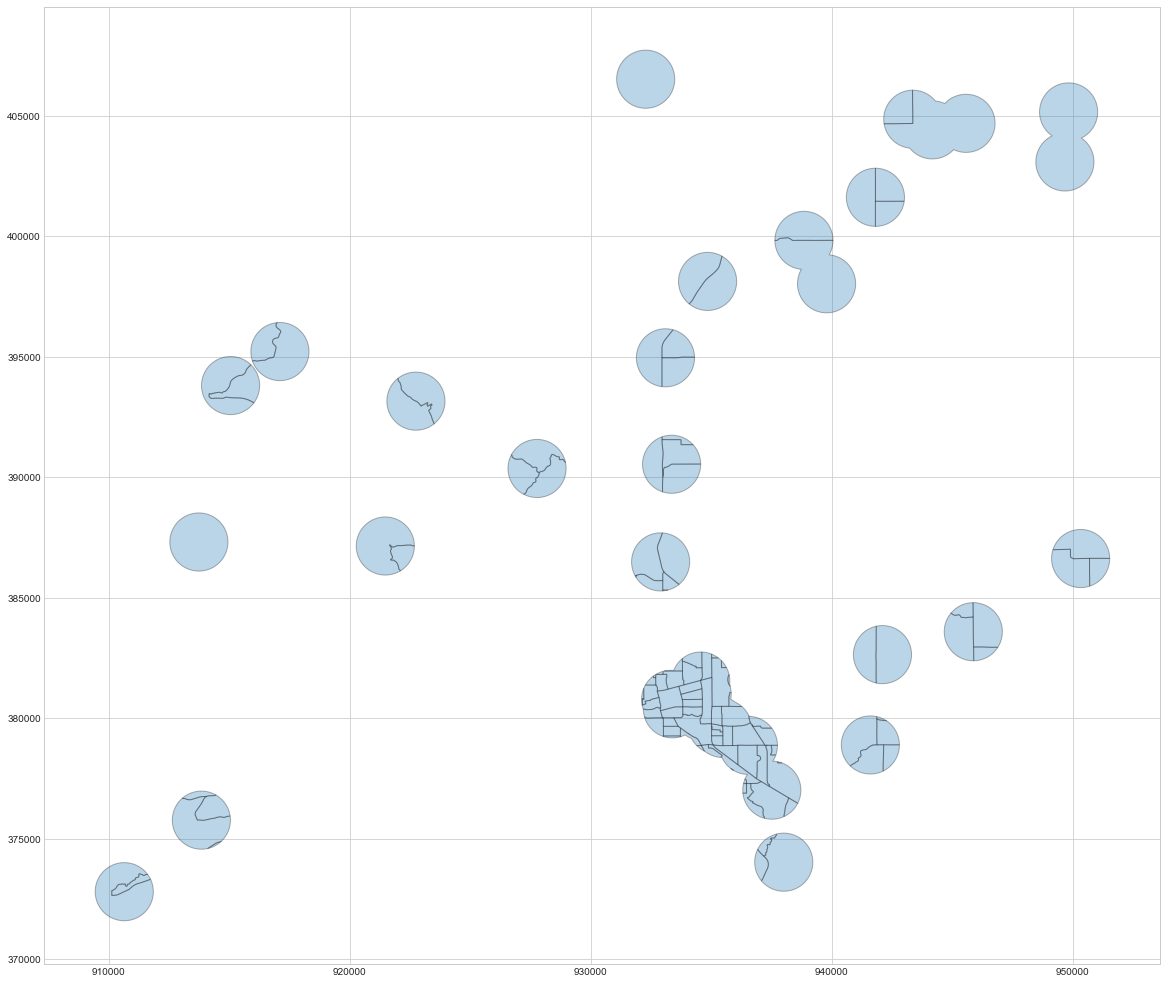

In [1219]:
ax = buffer_clip_race.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1220]:
 inter_race=gpd.overlay(gdf1, buffer_clip_race, how='intersection', make_valid=True, keep_geom_type=False)
 inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...   
1             3.0  206.745402  102.547945  14.027397    218.0  ...   
2             3.0  206.745402  102.547945  14.027397    218.0  ...   
3             3.0  206.745402  102.547945  14.027397    218.0  ...   
4             NaN   53.569129   44.246575   5.178082    164.0  ...   

      INTPTLAT      INTPTLON          GISJOIN    Shape_Leng    Shape_Area  \
0  +40.0547908  -105.2917149  G08001300121041   5887.429232  1.928049e+06   
1  +40.0605906  -105.2783995  G08001300121051   2837.477769  3.719316e+05   
2  +40.0548421  -105.2759672  G08001300121052   4304.033744  8.268505e+05   
3  +40.0843340  -105.2472222  G08001300127012  30374.847316  3.397677e+07   
4  +40.0843340  -105.2472222  G08001300127012  30374.847316  3.397677e+07   

  AHY2E001 AHY2E002  AHY2E003  Total block Area  \
0     1159     1035         0      1.927924e+06   
1     1184     1103        13      3.719075e+05   
2     1813     1585         0      8.267969e+05   
3     1201     1201         0      3.397441e+07   
4     1201     1201         0      3.397441e+07   

                                            geometry  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  

[5 rows x 24 columns]

In [1221]:
inter_race["buffered area"]=inter_race.area
inter_race['area factor']=inter_race['buffered area']/inter_race["Total block Area"]
inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...   
1             3.0  206.745402  102.547945  14.027397    218.0  ...   
2             3.0  206.745402  102.547945  14.027397    218.0  ...   
3             3.0  206.745402  102.547945  14.027397    218.0  ...   
4             NaN   53.569129   44.246575   5.178082    164.0  ...   

           GISJOIN    Shape_Leng    Shape_Area  AHY2E001 AHY2E002 AHY2E003  \
0  G08001300121041   5887.429232  1.928049e+06      1159     1035        0   
1  G08001300121051   2837.477769  3.719316e+05      1184     1103       13   
2  G08001300121052   4304.033744  8.268505e+05      1813     1585        0   
3  G08001300127012  30374.847316  3.397677e+07      1201     1201        0   
4  G08001300127012  30374.847316  3.397677e+07      1201     1201        0   

  Total block Area                                           geometry  \
0     1.927924e+06  POLYGON ((932783.358 385277.705, 932666.190 38...   
1     3.719075e+05  POLYGON ((933470.645 385414.415, 933363.567 38...   
2     8.267969e+05  POLYGON ((933137.141 385295.085, 933019.973 38...   
3     3.397441e+07  POLYGON ((934102.861 386360.594, 934085.481 38...   
4     3.397441e+07  POLYGON ((934557.955 390413.247, 934540.575 39...   

   buffered area  area factor  
0   4.462607e+05     0.231472  
1   2.972963e+05     0.799382  
2   4.052645e+03     0.004902  
3   1.959168e+06     0.057666  
4   1.546003e+06     0.045505  

[5 rows x 26 columns]

In [1222]:
output_pct_race= inter_race.loc[:, ['osm_id_sensor', 'AHY2E001','AHY2E002','AHY2E003','area factor']]
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHY2E001  AHY2E002  AHY2E003  area factor
0    385509341.0      1159      1035         0     0.231472
1    385509341.0      1184      1103        13     0.799382
2    385509341.0      1813      1585         0     0.004902
3    385509341.0      1201      1201         0     0.057666
4     17022948.0      1201      1201         0     0.045505

In [1223]:
output_pct_race.iloc[:, 1:4] = output_pct_race.iloc[:, 1:4].mul(output_pct_race['area factor'],axis=0)
output_pct_race=output_pct_race.drop(['area factor'],axis=1)
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY2E001    AHY2E002   AHY2E003
0    385509341.0  268.276215  239.573669   0.000000
1    385509341.0  946.468845  881.718864  10.391972
2    385509341.0    8.886639    7.769069   0.000000
3    385509341.0   69.256855   69.256855   0.000000
4     17022948.0   54.651406   54.651406   0.000000

# Aggregate by ID

In [1224]:
output_pct_race=output_pct_race.groupby('osm_id_sensor', as_index=False).sum()
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY2E001    AHY2E002  AHY2E003
0     17013477.0   30.378900   29.066855  0.000000
1     17016731.0    7.008631    6.839704  0.046155
2     17018038.0   21.179498   20.327001  0.000000
3     17018364.0  117.614627  108.811029  0.425405
4     17018830.0  122.107659  117.695844  4.411815

# Percentange of White and African American

In [1225]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_race['pct_white']=(output_pct_race['AHY2E002']/output_pct_race['AHY2E001'])*100
output_pct_race['pct_African_American']=(output_pct_race['AHY2E003']/output_pct_race['AHY2E001'])*100
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY2E001    AHY2E002  AHY2E003  pct_white  \
0     17013477.0   30.378900   29.066855  0.000000  95.681063   
1     17016731.0    7.008631    6.839704  0.046155  97.589732   
2     17018038.0   21.179498   20.327001  0.000000  95.974894   
3     17018364.0  117.614627  108.811029  0.425405  92.514878   
4     17018830.0  122.107659  117.695844  4.411815  96.386946   

   pct_African_American  
0              0.000000  
1              0.658549  
2              0.000000  
3              0.361694  
4              3.613054

In [1226]:
output_pct_race1=output_pct_race.drop(['AHY2E001','AHY2E002','AHY2E003'],axis=1)
output_pct_race1.columns=['osm_id','pct_white','pct_African_American']
output_pct_race1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_white  pct_African_American
0  17013477.0  95.681063              0.000000
1  17016731.0  97.589732              0.658549
2  17018038.0  95.974894              0.000000
3  17018364.0  92.514878              0.361694
4  17018830.0  96.386946              3.613054

# Percentage of Male and Female

In [1227]:
#gender=pd.read_csv("../input/oregon-sd-data/age by sex.csv")
gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2014-2018      NaN        NaN  Colorado       8   
1  G08000100078012  2014-2018      NaN        NaN  Colorado       8   
2  G08000100078021  2014-2018      NaN        NaN  Colorado       8   
3  G08000100078022  2014-2018      NaN        NaN  Colorado       8   
4  G08000100078023  2014-2018      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AJWBM040  AJWBM041  AJWBM042  \
0  Adams County        1      NaN     NaN  ...        33        19        26   
1  Adams County        1      NaN     NaN  ...        48        15        30   
2  Adams County        1      NaN     NaN  ...        32        30        29   
3  Adams County        1      NaN     NaN  ...        12        47        39   
4  Adams County        1      NaN     NaN  ...        19        33        15   

   AJWBM043  AJWBM044  AJWBM045  AJWBM046  AJWBM047  AJWBM048  AJWBM049  
0        60        19        12        23        12        12        32  
1        13        13        28        12        38        12        12  
2        17        23        23        17        19        12        12  
3        20         2        12        10        12        12        12  
4        12        12        17        12        33        12        12  

[5 rows x 136 columns]

In [1228]:
gender1=pd.merge(bg_proj, gender, left_on='GISJOIN', right_on='GISJOIN', how='left')
gender1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AJWBM040 AJWBM041 AJWBM042  \
0  Block Group 1  G5030        S  320934.0  ...        33       19       26   
1  Block Group 2  G5030        S  320612.0  ...        48       15       30   
2  Block Group 1  G5030        S  319446.0  ...        32       30       29   
3  Block Group 2  G5030        S  157958.0  ...        12       47       39   
4  Block Group 3  G5030        S  159972.0  ...        19       33       15   

   AJWBM043  AJWBM044 AJWBM045  AJWBM046 AJWBM047  AJWBM048  AJWBM049  
0        60        19       12        23       12        12        32  
1        13        13       28        12       38        12        12  
2        17        23       23        17       19        12        12  
3        20         2       12        10       12        12        12  
4        12        12       17        12       33        12        12  

[5 rows x 152 columns]

In [1229]:
# Clip the data using GeoPandas clip
buffer_clip_gender = gpd.clip(gender1, gdf1)
buffer_clip_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
702  G08001300121011      08      013  012101        1  080130121011   
704  G08001300121013      08      013  012101        3  080130121013   
705  G08001300121014      08      013  012101        4  080130121014   
706  G08001300121021      08      013  012102        1  080130121021   
707  G08001300121022      08      013  012102        2  080130121022   

          NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AJWBM040 AJWBM041 AJWBM042  \
702  Block Group 1  G5030        S  609360.0  ...        66       31       12   
704  Block Group 3  G5030        S  610497.0  ...        48       47       26   
705  Block Group 4  G5030        S  372104.0  ...        53       23       30   
706  Block Group 1  G5030        S  512533.0  ...        62       16       12   
707  Block Group 2  G5030        S  584894.0  ...        61       41       69   

     AJWBM043  AJWBM044 AJWBM045  AJWBM046 AJWBM047  AJWBM048  AJWBM049  
702        46        12       12        18       12        12        12  
704        80        35       48        36       14        12        21  
705        30        12       16        19       20        12        12  
706        12        37       21        12       24        12        12  
707        47        50       31        17       33        24        24  

[5 rows x 152 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


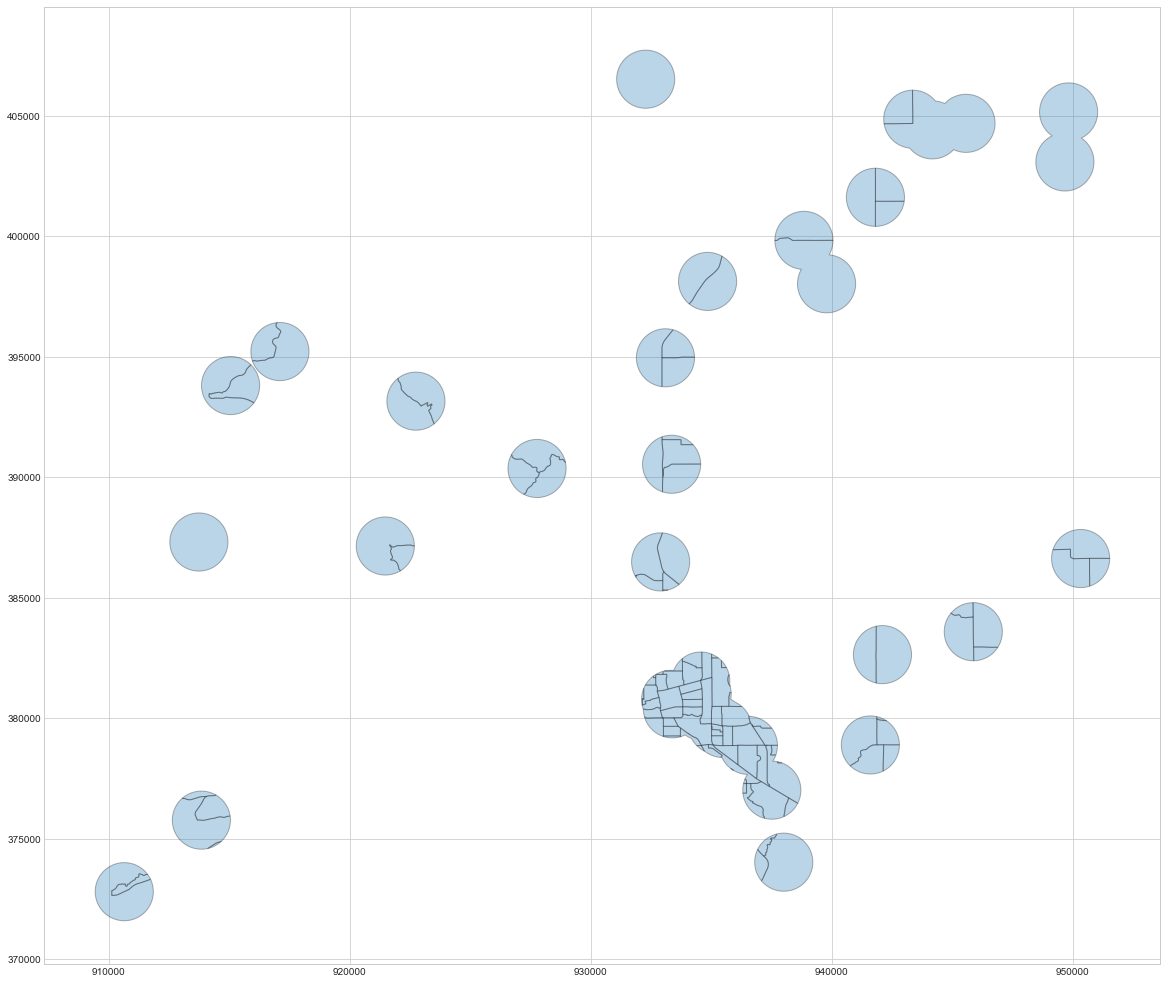

In [1230]:
ax = buffer_clip_gender.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1231]:
 inter_gender=gpd.overlay(gdf1, buffer_clip_gender, how='intersection', make_valid=True, keep_geom_type=False)
 inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJWBM041  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        29   
1             3.0  206.745402  102.547945  14.027397    218.0  ...        42   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        24   
3             3.0  206.745402  102.547945  14.027397    218.0  ...        32   
4             NaN   53.569129   44.246575   5.178082    164.0  ...        32   

   AJWBM042 AJWBM043  AJWBM044 AJWBM045 AJWBM046 AJWBM047 AJWBM048 AJWBM049  \
0        18       28        16       21       21       35       12       21   
1        22       24        41       74       12       12       12       12   
2        33       21        27       35       44       12       12       85   
3        34       74        12       12       48       12       26       41   
4        34       74        12       12       48       12       26       41   

                                            geometry  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  

[5 rows x 166 columns]

In [1232]:
inter_gender["buffered area"]=inter_gender.area
inter_gender['area factor']=inter_gender['buffered area']/inter_gender["Total block Area"]
inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJWBM043  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        28   
1             3.0  206.745402  102.547945  14.027397    218.0  ...        24   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        21   
3             3.0  206.745402  102.547945  14.027397    218.0  ...        74   
4             NaN   53.569129   44.246575   5.178082    164.0  ...        74   

   AJWBM044 AJWBM045  AJWBM046 AJWBM047 AJWBM048 AJWBM049  \
0        16       21        21       35       12       21   
1        41       74        12       12       12       12   
2        27       35        44       12       12       85   
3        12       12        48       12       26       41   
4        12       12        48       12       26       41   

                                            geometry buffered area area factor  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  4.462607e+05    0.231472  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  2.972963e+05    0.799382  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  4.052645e+03    0.004902  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  1.959168e+06    0.057666  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  1.546003e+06    0.045505  

[5 rows x 168 columns]

In [1233]:
#'AHYQE001',=total, 'AHYQE002'=male,AHYQE026=female
gender_filter=inter_gender.loc[:, ['osm_id_sensor', 'AJWBE001', 'AJWBE002', 'AJWBE026','area factor']]
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJWBE001  AJWBE002  AJWBE026  area factor
0    385509341.0      1389       656       733     0.231472
1    385509341.0      1388       646       742     0.799382
2    385509341.0      1658       894       764     0.004902
3    385509341.0      1452       692       760     0.057666
4     17022948.0      1452       692       760     0.045505

In [1234]:
gender_filter.iloc[:, 1:4] = gender_filter.iloc[:, 1:4].mul(gender_filter['area factor'],axis=0)
gender_filter=gender_filter.drop(['area factor'],axis=1)
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AJWBE001    AJWBE002    AJWBE026
0    385509341.0   321.514808  151.845726  169.669082
1    385509341.0  1109.542868  516.401076  593.141793
2    385509341.0     8.126887    4.382049    3.744838
3    385509341.0    83.731019   39.904866   43.826153
4     17022948.0    66.073140   31.489403   34.583737

In [1235]:
# Aggregate by ID
output_pct_gender=gender_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AJWBE001   AJWBE002   AJWBE026
0     17013477.0   27.754809  15.971631  11.783178
1     17016731.0    5.947520   3.106226   2.841294
2     17018038.0   19.925756  10.989217   8.936538
3     17018364.0  123.593598  57.281696  66.311902
4     17018830.0  112.999395  56.499698  56.499698

In [1236]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_gender['pct_male']=(output_pct_gender['AJWBE002']/output_pct_gender['AJWBE001'])*100
output_pct_gender['pct_female']=(output_pct_gender['AJWBE026']/output_pct_gender['AJWBE001'])*100
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AJWBE001   AJWBE002   AJWBE026   pct_male  pct_female
0     17013477.0   27.754809  15.971631  11.783178  57.545455   42.454545
1     17016731.0    5.947520   3.106226   2.841294  52.227247   47.772753
2     17018038.0   19.925756  10.989217   8.936538  55.150819   44.849181
3     17018364.0  123.593598  57.281696  66.311902  46.346815   53.653185
4     17018830.0  112.999395  56.499698  56.499698  50.000000   50.000000

In [1237]:
output_pct_gender1=output_pct_gender.drop(['AJWBE001','AJWBE002','AJWBE026'],axis=1)
output_pct_gender1.columns=['osm_id','pct_male','pct_female']
output_pct_gender1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   pct_male  pct_female
0  17013477.0  57.545455   42.454545
1  17016731.0  52.227247   47.772753
2  17018038.0  55.150819   44.849181
3  17018364.0  46.346815   53.653185
4  17018830.0  50.000000   50.000000

# Number of Student (student access) and Education (pct of at least college education population)

In [1238]:
#edu=pd.read_csv("../input/oregon-sd-data/education.csv")
edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2015-2019     CO      NaN        NaN  Colorado       8   
1  G08000100078012  2015-2019     CO      NaN        NaN  Colorado       8   
2  G08000100078021  2015-2019     CO      NaN        NaN  Colorado       8   
3  G08000100078022  2015-2019     CO      NaN        NaN  Colorado       8   
4  G08000100078023  2015-2019     CO      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  ...  ALWGM016  ALWGM017  ALWGM018  \
0  Adams County        1      NaN  ...        32       114        26   
1  Adams County        1      NaN  ...        61       152        32   
2  Adams County        1      NaN  ...        62       134        34   
3  Adams County        1      NaN  ...        44       143        42   
4  Adams County        1      NaN  ...        32       156        78   

   ALWGM019  ALWGM020  ALWGM021  ALWGM022  ALWGM023  ALWGM024  ALWGM025  
0        66        83        42        48        12        12        12  
1        35       110        50        50         8        12        23  
2        38        34         9        29        22        12        13  
3        73        73        27        46        34        12        12  
4        30        43        29        35        25        12        12  

[5 rows x 94 columns]

In [1239]:
edu1=pd.merge(bg_proj, edu, left_on='GISJOIN', right_on='GISJOIN', how='left')
edu1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  ALWGM016 ALWGM017 ALWGM018  \
0  Block Group 1  G5030        S  320934.0  ...        32      114       26   
1  Block Group 2  G5030        S  320612.0  ...        61      152       32   
2  Block Group 1  G5030        S  319446.0  ...        62      134       34   
3  Block Group 2  G5030        S  157958.0  ...        44      143       42   
4  Block Group 3  G5030        S  159972.0  ...        32      156       78   

   ALWGM019  ALWGM020 ALWGM021  ALWGM022 ALWGM023 ALWGM024  ALWGM025  
0        66        83       42        48       12       12        12  
1        35       110       50        50        8       12        23  
2        38        34        9        29       22       12        13  
3        73        73       27        46       34       12        12  
4        30        43       29        35       25       12        12  

[5 rows x 110 columns]

In [1240]:
# Clip the data using GeoPandas clip
buffer_clip_edu = gpd.clip(edu1, gdf1)
buffer_clip_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
702  G08001300121011      08      013  012101        1  080130121011   
704  G08001300121013      08      013  012101        3  080130121013   
705  G08001300121014      08      013  012101        4  080130121014   
706  G08001300121021      08      013  012102        1  080130121021   
707  G08001300121022      08      013  012102        2  080130121022   

          NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  ALWGM016 ALWGM017 ALWGM018  \
702  Block Group 1  G5030        S  609360.0  ...        31       43       81   
704  Block Group 3  G5030        S  610497.0  ...        12       24       12   
705  Block Group 4  G5030        S  372104.0  ...        21       37       12   
706  Block Group 1  G5030        S  512533.0  ...        50       12       12   
707  Block Group 2  G5030        S  584894.0  ...        12       78       28   

     ALWGM019  ALWGM020 ALWGM021  ALWGM022 ALWGM023 ALWGM024  ALWGM025  
702        12        85       12       135       98       55        44  
704        24        61       21       111      116       40        89  
705        35        30       26       127       53       50        40  
706        80       127       84       154      181       32        12  
707        29        92       31       179      163       75        67  

[5 rows x 110 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


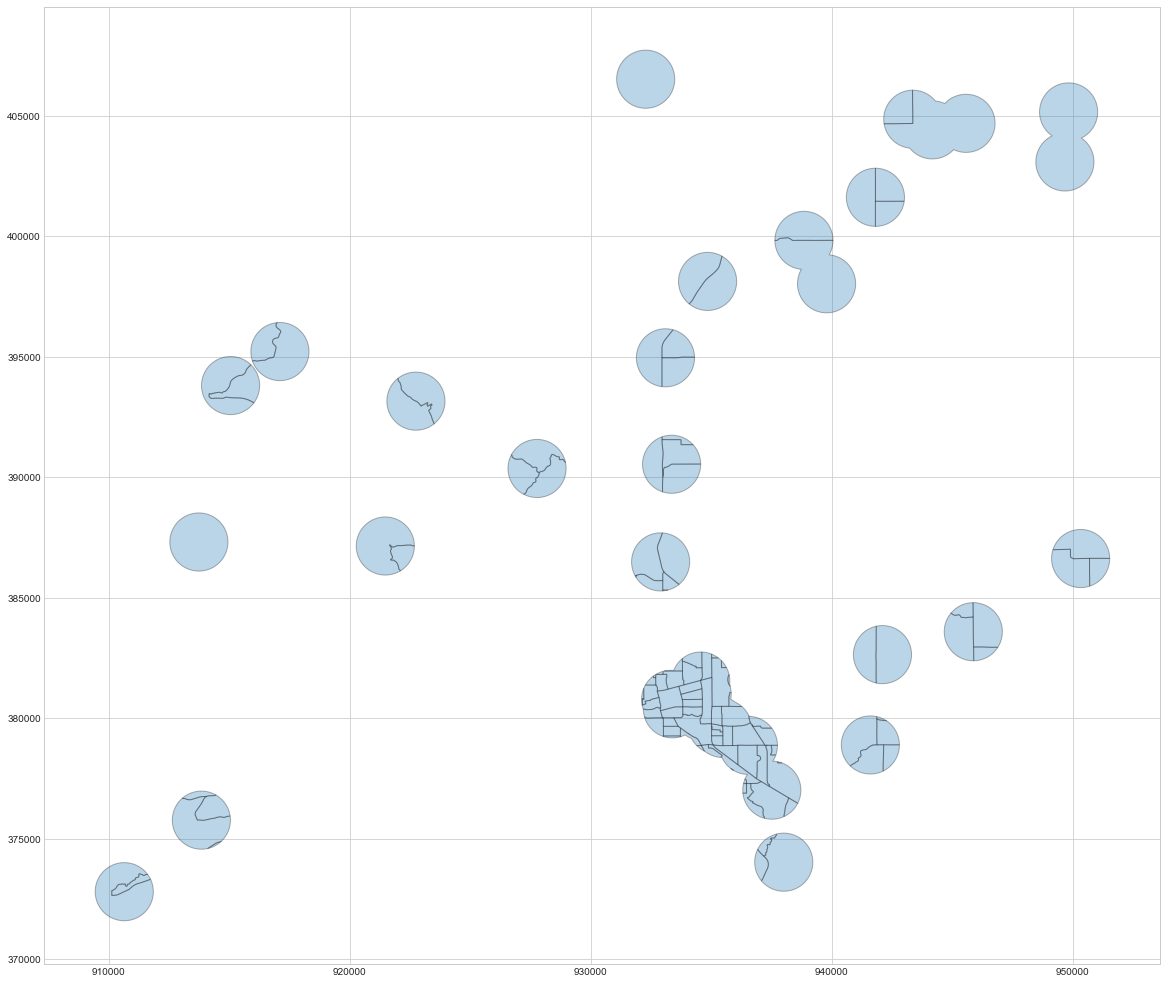

In [1241]:
ax = buffer_clip_edu.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1242]:
inter_edu=gpd.overlay(gdf1, buffer_clip_edu, how='intersection', make_valid=True, keep_geom_type=False)
inter_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  ALWGM017  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        26   
1             3.0  206.745402  102.547945  14.027397    218.0  ...        33   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        80   
3             3.0  206.745402  102.547945  14.027397    218.0  ...        53   
4             NaN   53.569129   44.246575   5.178082    164.0  ...        53   

   ALWGM018 ALWGM019  ALWGM020 ALWGM021 ALWGM022 ALWGM023 ALWGM024 ALWGM025  \
0         4       55        51       26       93       76       38       48   
1        43       12       126       85      137      111      107       23   
2        64       24        57       45      107       61       35       40   
3        26       30        55       54      110       98       53       44   
4        26       30        55       54      110       98       53       44   

                                            geometry  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  

[5 rows x 124 columns]

In [1243]:
inter_edu["buffered area"]=inter_edu.area
inter_edu['area factor']=inter_edu['buffered area']/inter_edu["Total block Area"]
inter_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  ALWGM019  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        55   
1             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        24   
3             3.0  206.745402  102.547945  14.027397    218.0  ...        30   
4             NaN   53.569129   44.246575   5.178082    164.0  ...        30   

   ALWGM020 ALWGM021  ALWGM022 ALWGM023 ALWGM024 ALWGM025  \
0        51       26        93       76       38       48   
1       126       85       137      111      107       23   
2        57       45       107       61       35       40   
3        55       54       110       98       53       44   
4        55       54       110       98       53       44   

                                            geometry buffered area area factor  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  4.462607e+05    0.231472  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  2.972963e+05    0.799382  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  4.052645e+03    0.004902  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  1.959168e+06    0.057666  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  1.546003e+06    0.045505  

[5 rows x 126 columns]

In [1244]:
#         ALWGE019:    Some college, less than 1 year
#         ALWGE020:    Some college, 1 or more years, no degree
#         ALWGE021:    Associate's degree
#         ALWGE022:    Bachelor's degree
#         ALWGE023:    Master's degree
#         ALWGE024:    Professional school degree
#         ALWGE025:    Doctorate degree

edu_filter=inter_edu.loc[:, ['osm_id_sensor', 'ALWGE001', 'ALWGE019','ALWGE020','ALWGE021', 'ALWGE022','ALWGE023','ALWGE024','ALWGE025','area factor']]
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALWGE001  ALWGE019  ALWGE020  ALWGE021  ALWGE022  ALWGE023  \
0    385509341.0       918        57        68        33       350       189   
1    385509341.0      1032         0       182        88       330       205   
2    385509341.0       848        15        87        66       162        89   
3    385509341.0       993        25        83        44       383       268   
4     17022948.0       993        25        83        44       383       268   

   ALWGE024  ALWGE025  area factor  
0        54        70     0.231472  
1        92        15     0.799382  
2        30        35     0.004902  
3        74        55     0.057666  
4        74        55     0.045505

In [1245]:
edu_filter.iloc[:, 1:9] = edu_filter.iloc[:, 1:9].mul(edu_filter['area factor'],axis=0)
edu_filter=edu_filter.drop(['area factor'],axis=1)
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    ALWGE001   ALWGE019    ALWGE020   ALWGE021    ALWGE022  \
0    385509341.0  212.491428  13.193912   15.740106   7.638581   81.015250   
1    385509341.0  824.962709   0.000000  145.487610  70.345657  263.796215   
2    385509341.0    4.156574   0.073524    0.426441   0.323507    0.794063   
3    385509341.0   57.262329   1.441650    4.786277   2.537304   22.086075   
4     17022948.0   45.186383   1.137623    3.776908   2.002216   17.428383   

     ALWGE023   ALWGE024   ALWGE025  
0   43.748235  12.499496  16.203050  
1  163.873406  73.543187  11.990737  
2    0.436244   0.147049   0.171557  
3   15.454486   4.267283   3.171629  
4   12.195318   3.367364   2.502770

In [1246]:
# Aggregate by ID
output_pct_edu=edu_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   ALWGE001  ALWGE019   ALWGE020  ALWGE021   ALWGE022  \
0     17013477.0  21.673983  1.640057   1.589594  0.681254  10.395438   
1     17016731.0   5.832599  0.326315   0.468010  0.740326   1.899735   
2     17018038.0  16.186537  1.202438   1.301480  0.933592   7.171681   
3     17018364.0  95.395246  3.881530  10.685192  7.248737  30.425018   
4     17018830.0  81.262789  1.707799  14.231662  6.404248  20.493593   

    ALWGE023  ALWGE024  ALWGE025  
0   3.582894  0.656023  0.151390  
1   0.824788  0.302776  0.203082  
2   2.626716  0.613470  0.173328  
3  10.852106  2.003726  4.041511  
4  10.816063  4.696448  1.707799

# Number of students 

In [1247]:
scll.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2014-2018      NaN        NaN  Colorado       8   
1  G08000100078012  2014-2018      NaN        NaN  Colorado       8   
2  G08000100078021  2014-2018      NaN        NaN  Colorado       8   
3  G08000100078022  2014-2018      NaN        NaN  Colorado       8   
4  G08000100078023  2014-2018      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AJYEM010  AJYEM011  AJYEM012  \
0  Adams County        1      NaN     NaN  ...        52        43        41   
1  Adams County        1      NaN     NaN  ...        41        22        57   
2  Adams County        1      NaN     NaN  ...        15        16        28   
3  Adams County        1      NaN     NaN  ...        21        52        48   
4  Adams County        1      NaN     NaN  ...        20        39        40   

   AJYEM013  AJYEM014  AJYEM015  AJYEM016  AJYEM017  AJYEM018  AJYEM019  
0        34        42        40        31        48        12       267  
1       124        54        34        39        16        14       275  
2        29        12        31         9        12        10       238  
3        12        27        15        44        48        11       243  
4        31        39        31        65        23        26       276  

[5 rows x 76 columns]

In [1248]:
scl1=pd.merge(bg_proj, scll, left_on='GISJOIN', right_on='GISJOIN', how='left')
scl1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AJYEM010 AJYEM011 AJYEM012  \
0  Block Group 1  G5030        S  320934.0  ...        52       43       41   
1  Block Group 2  G5030        S  320612.0  ...        41       22       57   
2  Block Group 1  G5030        S  319446.0  ...        15       16       28   
3  Block Group 2  G5030        S  157958.0  ...        21       52       48   
4  Block Group 3  G5030        S  159972.0  ...        20       39       40   

   AJYEM013  AJYEM014 AJYEM015  AJYEM016 AJYEM017  AJYEM018  AJYEM019  
0        34        42       40        31       48        12       267  
1       124        54       34        39       16        14       275  
2        29        12       31         9       12        10       238  
3        12        27       15        44       48        11       243  
4        31        39       31        65       23        26       276  

[5 rows x 92 columns]

In [1249]:
# Clip the data using GeoPandas clip
buffer_clip_scl = gpd.clip(scl1, gdf1)
buffer_clip_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
702  G08001300121011      08      013  012101        1  080130121011   
704  G08001300121013      08      013  012101        3  080130121013   
705  G08001300121014      08      013  012101        4  080130121014   
706  G08001300121021      08      013  012102        1  080130121021   
707  G08001300121022      08      013  012102        2  080130121022   

          NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AJYEM010 AJYEM011 AJYEM012  \
702  Block Group 1  G5030        S  609360.0  ...        18       12       12   
704  Block Group 3  G5030        S  610497.0  ...        12       24       43   
705  Block Group 4  G5030        S  372104.0  ...        12       21       18   
706  Block Group 1  G5030        S  512533.0  ...        12       12       12   
707  Block Group 2  G5030        S  584894.0  ...        19       12       24   

     AJYEM013  AJYEM014 AJYEM015  AJYEM016 AJYEM017  AJYEM018  AJYEM019  
702        12        34       20        40       86        12       254  
704        20        18       14        49       65        59       176  
705        12        17       12        12       26        12       224  
706        12        12       12        12      104        95       251  
707        12        12       12        12      125       132       377  

[5 rows x 92 columns]

In [1250]:
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJYEM011  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        28   
1             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        53   
3             3.0  206.745402  102.547945  14.027397    218.0  ...        44   
4             NaN   53.569129   44.246575   5.178082    164.0  ...        44   

   AJYEM012 AJYEM013  AJYEM014 AJYEM015 AJYEM016 AJYEM017 AJYEM018 AJYEM019  \
0        24       18        22       11       12       21       28      171   
1        73       12        67       66       12       24       26      236   
2        12       60        43       40       43       31       66      201   
3        21       30        27       30       27       28       33      164   
4        21       30        27       30       27       28       33      164   

                                            geometry  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  

[5 rows x 106 columns]

In [1251]:
inter_scl["buffered area"]=inter_scl.area
inter_scl['area factor']=inter_scl['buffered area']/inter_scl["Total block Area"]
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJYEM013  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        18   
1             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        60   
3             3.0  206.745402  102.547945  14.027397    218.0  ...        30   
4             NaN   53.569129   44.246575   5.178082    164.0  ...        30   

   AJYEM014 AJYEM015  AJYEM016 AJYEM017 AJYEM018 AJYEM019  \
0        22       11        12       21       28      171   
1        67       66        12       24       26      236   
2        43       40        43       31       66      201   
3        27       30        27       28       33      164   
4        27       30        27       28       33      164   

                                            geometry buffered area area factor  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  4.462607e+05    0.231472  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  2.972963e+05    0.799382  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  4.052645e+03    0.004902  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  1.959168e+06    0.057666  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  1.546003e+06    0.045505  

[5 rows x 108 columns]

In [1252]:
scl_filter=inter_scl.loc[:, ['osm_id_sensor', 'AJYEE001', 'AJYEE017', 'AJYEE018','area factor']]
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJYEE001  AJYEE017  AJYEE018  area factor
0    385509341.0      1263        14        17     0.231472
1    385509341.0      1331        15        17     0.799382
2    385509341.0      1589        19        60     0.004902
3    385509341.0      1422        18        28     0.057666
4     17022948.0      1422        18        28     0.045505

In [1253]:
scl_filter.iloc[:, 1:4] = scl_filter.iloc[:, 1:4].mul(scl_filter['area factor'],axis=0)
scl_filter=scl_filter.drop(['area factor'],axis=1)
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AJYEE001   AJYEE017   AJYEE018
0    385509341.0   292.349318   3.240610   3.935026
1    385509341.0  1063.978068  11.990737  13.589502
2    385509341.0     7.788676   0.093131   0.294097
3    385509341.0    82.001039   1.037988   1.614648
4     17022948.0    64.707992   0.819089   1.274138

In [1254]:
scl_filter['total student']=scl_filter['AJYEE017']+scl_filter['AJYEE018']
output_student=scl_filter.loc[:,['osm_id_sensor','total student']]
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0    385509341.0       7.175636
1    385509341.0      25.580239
2    385509341.0       0.387228
3    385509341.0       2.652636
4     17022948.0       2.093226

In [1255]:
output_student=output_student.groupby('osm_id_sensor', as_index=False).sum()
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0     17013477.0       1.640057
1     17016731.0       0.032308
2     17018038.0       0.885601
3     17018364.0       4.590862
4     17018830.0       3.842549

In [1256]:
output_student.columns=['osm_id', 'Student Access']
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Student Access
0  17013477.0        1.640057
1  17016731.0        0.032308
2  17018038.0        0.885601
3  17018364.0        4.590862
4  17018830.0        3.842549

In [1257]:
#pd.DataFrame.to_csv(output_student, 'Air_student_Bo2019_update_2.0_mile.csv',sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Education ( pct of at least college population)

In [1258]:
# Calculate percentage of education 
output_pct_edu['total_at_least_college_education']=output_pct_edu.iloc[:,2:9].sum(axis=1)
output_pct_edu.head()

osm_id_sensor   ALWGE001  ALWGE019   ALWGE020  ALWGE021   ALWGE022  \
0     17013477.0  21.673983  1.640057   1.589594  0.681254  10.395438   
1     17016731.0   5.832599  0.326315   0.468010  0.740326   1.899735   
2     17018038.0  16.186537  1.202438   1.301480  0.933592   7.171681   
3     17018364.0  95.395246  3.881530  10.685192  7.248737  30.425018   
4     17018830.0  81.262789  1.707799  14.231662  6.404248  20.493593   

    ALWGE023  ALWGE024  ALWGE025  total_at_least_college_education  
0   3.582894  0.656023  0.151390                         18.696649  
1   0.824788  0.302776  0.203082                          4.765033  
2   2.626716  0.613470  0.173328                         14.022705  
3  10.852106  2.003726  4.041511                         69.137821  
4  10.816063  4.696448  1.707799                         60.057613

In [1259]:
output_pct_edu['pct_at_least_college_education']=(output_pct_edu['total_at_least_college_education']/output_pct_edu['ALWGE001'])*100
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   ALWGE001  ALWGE019   ALWGE020  ALWGE021   ALWGE022  \
0     17013477.0  21.673983  1.640057   1.589594  0.681254  10.395438   
1     17016731.0   5.832599  0.326315   0.468010  0.740326   1.899735   
2     17018038.0  16.186537  1.202438   1.301480  0.933592   7.171681   
3     17018364.0  95.395246  3.881530  10.685192  7.248737  30.425018   
4     17018830.0  81.262789  1.707799  14.231662  6.404248  20.493593   

    ALWGE023  ALWGE024  ALWGE025  total_at_least_college_education  \
0   3.582894  0.656023  0.151390                         18.696649   
1   0.824788  0.302776  0.203082                          4.765033   
2   2.626716  0.613470  0.173328                         14.022705   
3  10.852106  2.003726  4.041511                         69.137821   
4  10.816063  4.696448  1.707799                         60.057613   

   pct_at_least_college_education  
0                       86.263097  
1                       81.696564  
2                       86.631902  
3                       72.475122  
4                       73.905429

In [1260]:
output_pct_edu1=output_pct_edu.loc[:,['osm_id_sensor','pct_at_least_college_education']]
output_pct_edu1.columns=['osm_id','pct_at_least_college_education']
output_pct_edu1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_at_least_college_education
0  17013477.0                       86.263097
1  17016731.0                       81.696564
2  17018038.0                       86.631902
3  17018364.0                       72.475122
4  17018830.0                       73.905429

# Median Age

In [1261]:
#age=pd.read_csv("../input/oregon-sd-data/median_age.csv")
age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2014-2018      NaN        NaN  Colorado       8   
1  G08000100078012  2014-2018      NaN        NaN  Colorado       8   
2  G08000100078021  2014-2018      NaN        NaN  Colorado       8   
3  G08000100078022  2014-2018      NaN        NaN  Colorado       8   
4  G08000100078023  2014-2018      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  BTTRA  BTBGA  \
0  Adams County        1      NaN     NaN  ...    NaN    NaN   
1  Adams County        1      NaN     NaN  ...    NaN    NaN   
2  Adams County        1      NaN     NaN  ...    NaN    NaN   
3  Adams County        1      NaN     NaN  ...    NaN    NaN   
4  Adams County        1      NaN     NaN  ...    NaN    NaN   

                                              NAME_E  AJWCE001  AJWCE002  \
0  Block Group 1, Census Tract 78.01, Adams Count...      30.6      30.0   
1  Block Group 2, Census Tract 78.01, Adams Count...      27.7      28.6   
2  Block Group 1, Census Tract 78.02, Adams Count...      27.9      24.7   
3  Block Group 2, Census Tract 78.02, Adams Count...      36.1      40.4   
4  Block Group 3, Census Tract 78.02, Adams Count...      29.9      30.8   

   AJWCE003                                             NAME_M  AJWCM001  \
0      32.4  Block Group 1, Census Tract 78.01, Adams Count...       5.2   
1      25.7  Block Group 2, Census Tract 78.01, Adams Count...       3.8   
2      31.7  Block Group 1, Census Tract 78.02, Adams Count...       8.0   
3      21.8  Block Group 2, Census Tract 78.02, Adams Count...      15.2   
4      29.4  Block Group 3, Census Tract 78.02, Adams Count...       3.8   

   AJWCM002  AJWCM003  
0       6.0       9.5  
1       4.1       2.4  
2       9.1      10.2  
3       3.4       5.4  
4       5.1       5.3  

[5 rows x 44 columns]

In [1262]:
age1=pd.merge(bg_proj, age, left_on='GISJOIN', right_on='GISJOIN', how='left')
age1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  BTTRA BTBGA  \
0  Block Group 1  G5030        S  320934.0  ...    NaN   NaN   
1  Block Group 2  G5030        S  320612.0  ...    NaN   NaN   
2  Block Group 1  G5030        S  319446.0  ...    NaN   NaN   
3  Block Group 2  G5030        S  157958.0  ...    NaN   NaN   
4  Block Group 3  G5030        S  159972.0  ...    NaN   NaN   

                                              NAME_E  AJWCE001  AJWCE002  \
0  Block Group 1, Census Tract 78.01, Adams Count...      30.6      30.0   
1  Block Group 2, Census Tract 78.01, Adams Count...      27.7      28.6   
2  Block Group 1, Census Tract 78.02, Adams Count...      27.9      24.7   
3  Block Group 2, Census Tract 78.02, Adams Count...      36.1      40.4   
4  Block Group 3, Census Tract 78.02, Adams Count...      29.9      30.8   

  AJWCE003                                             NAME_M AJWCM001  \
0     32.4  Block Group 1, Census Tract 78.01, Adams Count...      5.2   
1     25.7  Block Group 2, Census Tract 78.01, Adams Count...      3.8   
2     31.7  Block Group 1, Census Tract 78.02, Adams Count...      8.0   
3     21.8  Block Group 2, Census Tract 78.02, Adams Count...     15.2   
4     29.4  Block Group 3, Census Tract 78.02, Adams Count...      3.8   

   AJWCM002  AJWCM003  
0       6.0       9.5  
1       4.1       2.4  
2       9.1      10.2  
3       3.4       5.4  
4       5.1       5.3  

[5 rows x 60 columns]

In [1263]:
# Clip the data using GeoPandas clip
buffer_clip_age = gpd.clip(age1, gdf1)
buffer_clip_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
702  G08001300121011      08      013  012101        1  080130121011   
704  G08001300121013      08      013  012101        3  080130121013   
705  G08001300121014      08      013  012101        4  080130121014   
706  G08001300121021      08      013  012102        1  080130121021   
707  G08001300121022      08      013  012102        2  080130121022   

          NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  BTTRA BTBGA  \
702  Block Group 1  G5030        S  609360.0  ...    NaN   NaN   
704  Block Group 3  G5030        S  610497.0  ...    NaN   NaN   
705  Block Group 4  G5030        S  372104.0  ...    NaN   NaN   
706  Block Group 1  G5030        S  512533.0  ...    NaN   NaN   
707  Block Group 2  G5030        S  584894.0  ...    NaN   NaN   

                                                NAME_E  AJWCE001  AJWCE002  \
702  Block Group 1, Census Tract 121.01, Boulder Co...      29.7      36.0   
704  Block Group 3, Census Tract 121.01, Boulder Co...      46.6      41.9   
705  Block Group 4, Census Tract 121.01, Boulder Co...      41.6      27.9   
706  Block Group 1, Census Tract 121.02, Boulder Co...      32.4      35.4   
707  Block Group 2, Census Tract 121.02, Boulder Co...      31.7      30.2   

    AJWCE003                                             NAME_M AJWCM001  \
702     25.9  Block Group 1, Census Tract 121.01, Boulder Co...      8.4   
704     52.3  Block Group 3, Census Tract 121.01, Boulder Co...     11.6   
705     48.4  Block Group 4, Census Tract 121.01, Boulder Co...      8.2   
706     29.6  Block Group 1, Census Tract 121.02, Boulder Co...      6.5   
707     37.1  Block Group 2, Census Tract 121.02, Boulder Co...      5.4   

     AJWCM002  AJWCM003  
702      13.0      13.2  
704      11.4      13.7  
705       9.4       7.9  
706       8.4       4.7  
707       3.7      11.8  

[5 rows x 60 columns]

In [1264]:
inter_age=gpd.overlay(gdf1, buffer_clip_age, how='intersection', make_valid=True, keep_geom_type=False)
inter_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  BTBGA  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   
1             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   
3             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   
4             NaN   53.569129   44.246575   5.178082    164.0  ...    NaN   

                                              NAME_E AJWCE001  AJWCE002  \
0  Block Group 1, Census Tract 121.04, Boulder Co...     38.7      38.2   
1  Block Group 1, Census Tract 121.05, Boulder Co...     40.5      41.1   
2  Block Group 2, Census Tract 121.05, Boulder Co...     33.1      33.3   
3  Block Group 2, Census Tract 127.01, Boulder Co...     51.4      51.6   
4  Block Group 2, Census Tract 127.01, Boulder Co...     51.4      51.6   

  AJWCE003                                             NAME_M AJWCM001  \
0     38.9  Block Group 1, Census Tract 121.04, Boulder Co...      3.3   
1     40.2  Block Group 1, Census Tract 121.05, Boulder Co...      8.3   
2     31.9  Block Group 2, Census Tract 121.05, Boulder Co...      5.1   
3     51.2  Block Group 2, Census Tract 127.01, Boulder Co...      3.4   
4     51.2  Block Group 2, Census Tract 127.01, Boulder Co...      3.4   

  AJWCM002 AJWCM003                                           geometry  
0      4.9      4.1  POLYGON ((932783.358 385277.705, 932666.190 38...  
1     11.8      8.6  POLYGON ((933470.645 385414.415, 933363.567 38...  
2      6.1      9.6  POLYGON ((933137.141 385295.085, 933019.973 38...  
3      3.5      5.1  POLYGON ((934102.861 386360.594, 934085.481 38...  
4      3.5      5.1  POLYGON ((934557.955 390413.247, 934540.575 39...  

[5 rows x 74 columns]

In [1265]:
inter_age["buffered area"]=inter_age.area
inter_age['area factor']=inter_age['buffered area']/inter_age["Total block Area"]
inter_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJWCE001  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...      38.7   
1             3.0  206.745402  102.547945  14.027397    218.0  ...      40.5   
2             3.0  206.745402  102.547945  14.027397    218.0  ...      33.1   
3             3.0  206.745402  102.547945  14.027397    218.0  ...      51.4   
4             NaN   53.569129   44.246575   5.178082    164.0  ...      51.4   

   AJWCE002 AJWCE003                                             NAME_M  \
0      38.2     38.9  Block Group 1, Census Tract 121.04, Boulder Co...   
1      41.1     40.2  Block Group 1, Census Tract 121.05, Boulder Co...   
2      33.3     31.9  Block Group 2, Census Tract 121.05, Boulder Co...   
3      51.6     51.2  Block Group 2, Census Tract 127.01, Boulder Co...   
4      51.6     51.2  Block Group 2, Census Tract 127.01, Boulder Co...   

  AJWCM001 AJWCM002 AJWCM003  \
0      3.3      4.9      4.1   
1      8.3     11.8      8.6   
2      5.1      6.1      9.6   
3      3.4      3.5      5.1   
4      3.4      3.5      5.1   

                                            geometry buffered area area factor  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  4.462607e+05    0.231472  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  2.972963e+05    0.799382  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  4.052645e+03    0.004902  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  1.959168e+06    0.057666  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  1.546003e+06    0.045505  

[5 rows x 76 columns]

In [1266]:
#    NHGIS code:  AJWC
 #       AJWCE001:    Median age: Total
 #       AJWCE002:    Median age: Male
 #       AJWCE003:    Median age: Female
age_filter=inter_age.loc[:, ['osm_id_sensor','GEOID','AJWCE001']]
age_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJWCE001
0    385509341.0  080130121041      38.7
1    385509341.0  080130121051      40.5
2    385509341.0  080130121052      33.1
3    385509341.0  080130127012      51.4
4     17022948.0  080130127012      51.4

In [1267]:
#age_filter.iloc[:, 1:2] = age_filter.iloc[:, 1:2].mul(age_filter['area factor'],axis=0)
#age_filter=age_filter.drop(['area factor'],axis=1)
#age_filter

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1268]:
# Aggregate by ID
#output_median_age=age_filter.groupby('ID', as_index=False).mean()
#output_median_age

In [1269]:
#output_median_age.columns=['ID', 'Median_Age']
#output_median_age

# Median HH_income

In [1270]:
#income=pd.read_csv("../input/oregon-sd-data/median_hh_income.csv")
income.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2014-2018      NaN        NaN  Colorado       8   
1  G08000100078012  2014-2018      NaN        NaN  Colorado       8   
2  G08000100078021  2014-2018      NaN        NaN  Colorado       8   
3  G08000100078022  2014-2018      NaN        NaN  Colorado       8   
4  G08000100078023  2014-2018      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  SDELMA  SDSECA  SDUNIA  \
0  Adams County        1      NaN     NaN  ...     NaN     NaN     NaN   
1  Adams County        1      NaN     NaN  ...     NaN     NaN     NaN   
2  Adams County        1      NaN     NaN  ...     NaN     NaN     NaN   
3  Adams County        1      NaN     NaN  ...     NaN     NaN     NaN   
4  Adams County        1      NaN     NaN  ...     NaN     NaN     NaN   

   PUMA5A  BTTRA  BTBGA                                             NAME_E  \
0     NaN    NaN    NaN  Block Group 1, Census Tract 78.01, Adams Count...   
1     NaN    NaN    NaN  Block Group 2, Census Tract 78.01, Adams Count...   
2     NaN    NaN    NaN  Block Group 1, Census Tract 78.02, Adams Count...   
3     NaN    NaN    NaN  Block Group 2, Census Tract 78.02, Adams Count...   
4     NaN    NaN    NaN  Block Group 3, Census Tract 78.02, Adams Count...   

   AJZAE001                                             NAME_M  AJZAM001  
0   30455.0  Block Group 1, Census Tract 78.01, Adams Count...    8501.0  
1   34939.0  Block Group 2, Census Tract 78.01, Adams Count...    6612.0  
2   23936.0  Block Group 1, Census Tract 78.02, Adams Count...    6809.0  
3   43594.0  Block Group 2, Census Tract 78.02, Adams Count...   13728.0  
4   27350.0  Block Group 3, Census Tract 78.02, Adams Count...   22043.0  

[5 rows x 40 columns]

In [1271]:
income1=pd.merge(bg_proj, income, left_on='GISJOIN', right_on='GISJOIN', how='left')
income1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  SDELMA SDSECA SDUNIA  PUMA5A  \
0  Block Group 1  G5030        S  320934.0  ...     NaN    NaN    NaN     NaN   
1  Block Group 2  G5030        S  320612.0  ...     NaN    NaN    NaN     NaN   
2  Block Group 1  G5030        S  319446.0  ...     NaN    NaN    NaN     NaN   
3  Block Group 2  G5030        S  157958.0  ...     NaN    NaN    NaN     NaN   
4  Block Group 3  G5030        S  159972.0  ...     NaN    NaN    NaN     NaN   

   BTTRA BTBGA                                             NAME_E AJZAE001  \
0    NaN   NaN  Block Group 1, Census Tract 78.01, Adams Count...  30455.0   
1    NaN   NaN  Block Group 2, Census Tract 78.01, Adams Count...  34939.0   
2    NaN   NaN  Block Group 1, Census Tract 78.02, Adams Count...  23936.0   
3    NaN   NaN  Block Group 2, Census Tract 78.02, Adams Count...  43594.0   
4    NaN   NaN  Block Group 3, Census Tract 78.02, Adams Count...  27350.0   

                                              NAME_M  AJZAM001  
0  Block Group 1, Census Tract 78.01, Adams Count...    8501.0  
1  Block Group 2, Census Tract 78.01, Adams Count...    6612.0  
2  Block Group 1, Census Tract 78.02, Adams Count...    6809.0  
3  Block Group 2, Census Tract 78.02, Adams Count...   13728.0  
4  Block Group 3, Census Tract 78.02, Adams Count...   22043.0  

[5 rows x 56 columns]

In [1272]:
# Clip the data using GeoPandas clip
buffer_clip_income = gpd.clip(income1, gdf1)
buffer_clip_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
702  G08001300121011      08      013  012101        1  080130121011   
704  G08001300121013      08      013  012101        3  080130121013   
705  G08001300121014      08      013  012101        4  080130121014   
706  G08001300121021      08      013  012102        1  080130121021   
707  G08001300121022      08      013  012102        2  080130121022   

          NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  SDELMA SDSECA SDUNIA  \
702  Block Group 1  G5030        S  609360.0  ...     NaN    NaN    NaN   
704  Block Group 3  G5030        S  610497.0  ...     NaN    NaN    NaN   
705  Block Group 4  G5030        S  372104.0  ...     NaN    NaN    NaN   
706  Block Group 1  G5030        S  512533.0  ...     NaN    NaN    NaN   
707  Block Group 2  G5030        S  584894.0  ...     NaN    NaN    NaN   

     PUMA5A  BTTRA BTBGA                                             NAME_E  \
702     NaN    NaN   NaN  Block Group 1, Census Tract 121.01, Boulder Co...   
704     NaN    NaN   NaN  Block Group 3, Census Tract 121.01, Boulder Co...   
705     NaN    NaN   NaN  Block Group 4, Census Tract 121.01, Boulder Co...   
706     NaN    NaN   NaN  Block Group 1, Census Tract 121.02, Boulder Co...   
707     NaN    NaN   NaN  Block Group 2, Census Tract 121.02, Boulder Co...   

     AJZAE001                                             NAME_M  AJZAM001  
702   92008.0  Block Group 1, Census Tract 121.01, Boulder Co...   17744.0  
704  117875.0  Block Group 3, Census Tract 121.01, Boulder Co...   47235.0  
705   79643.0  Block Group 4, Census Tract 121.01, Boulder Co...   73091.0  
706   52647.0  Block Group 1, Census Tract 121.02, Boulder Co...   23893.0  
707  106855.0  Block Group 2, Census Tract 121.02, Boulder Co...   36892.0  

[5 rows x 56 columns]

In [1273]:
inter_income=gpd.overlay(gdf1, buffer_clip_income, how='intersection', make_valid=True, keep_geom_type=False)
inter_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  SDSECA  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
1             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
3             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
4             NaN   53.569129   44.246575   5.178082    164.0  ...     NaN   

   SDUNIA PUMA5A  BTTRA BTBGA  \
0     NaN    NaN    NaN   NaN   
1     NaN    NaN    NaN   NaN   
2     NaN    NaN    NaN   NaN   
3     NaN    NaN    NaN   NaN   
4     NaN    NaN    NaN   NaN   

                                              NAME_E  AJZAE001  \
0  Block Group 1, Census Tract 121.04, Boulder Co...  101488.0   
1  Block Group 1, Census Tract 121.05, Boulder Co...   82292.0   
2  Block Group 2, Census Tract 121.05, Boulder Co...   50786.0   
3  Block Group 2, Census Tract 127.01, Boulder Co...  189118.0   
4  Block Group 2, Census Tract 127.01, Boulder Co...  189118.0   

                                              NAME_M AJZAM001  \
0  Block Group 1, Census Tract 121.04, Boulder Co...  11404.0   
1  Block Group 1, Census Tract 121.05, Boulder Co...  19667.0   
2  Block Group 2, Census Tract 121.05, Boulder Co...   8102.0   
3  Block Group 2, Census Tract 127.01, Boulder Co...  50481.0   
4  Block Group 2, Census Tract 127.01, Boulder Co...  50481.0   

                                            geometry  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  

[5 rows x 70 columns]

In [1274]:
inter_income["buffered area"]=inter_income.area
inter_income['area factor']=inter_income['buffered area']/inter_income["Total block Area"]
inter_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  PUMA5A  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
1             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
3             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
4             NaN   53.569129   44.246575   5.178082    164.0  ...     NaN   

   BTTRA BTBGA                                             NAME_E  AJZAE001  \
0    NaN   NaN  Block Group 1, Census Tract 121.04, Boulder Co...  101488.0   
1    NaN   NaN  Block Group 1, Census Tract 121.05, Boulder Co...   82292.0   
2    NaN   NaN  Block Group 2, Census Tract 121.05, Boulder Co...   50786.0   
3    NaN   NaN  Block Group 2, Census Tract 127.01, Boulder Co...  189118.0   
4    NaN   NaN  Block Group 2, Census Tract 127.01, Boulder Co...  189118.0   

                                              NAME_M AJZAM001  \
0  Block Group 1, Census Tract 121.04, Boulder Co...  11404.0   
1  Block Group 1, Census Tract 121.05, Boulder Co...  19667.0   
2  Block Group 2, Census Tract 121.05, Boulder Co...   8102.0   
3  Block Group 2, Census Tract 127.01, Boulder Co...  50481.0   
4  Block Group 2, Census Tract 127.01, Boulder Co...  50481.0   

                                            geometry buffered area area factor  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  4.462607e+05    0.231472  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  2.972963e+05    0.799382  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  4.052645e+03    0.004902  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  1.959168e+06    0.057666  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  1.546003e+06    0.045505  

[5 rows x 72 columns]

In [1275]:
 #   Table 1:     Median Household Income in the Past 12 Months (in 2018 Inflation-Adjusted Dollars)
  #  Universe:    Households
  #  Source code: B19013
  #  NHGIS code:  AJZA
  #      AJZAE001:    Median household income in the past 12 months (in 2018 inflation-adjusted dollars)
income_filter=inter_income.loc[:, ['osm_id_sensor','GEOID', 'AJZAE001','area factor']]
income_filter.head(5)

# See rest of the part after hh density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJZAE001  area factor
0    385509341.0  080130121041  101488.0     0.231472
1    385509341.0  080130121051   82292.0     0.799382
2    385509341.0  080130121052   50786.0     0.004902
3    385509341.0  080130127012  189118.0     0.057666
4     17022948.0  080130127012  189118.0     0.045505

In [1276]:
# income_filter.iloc[:, 2:3] = income_filter.iloc[:, 2:3].mul(income_filter['area factor'],axis=0)
# income_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# HH_density

In [1277]:
#hhdensity=pd.read_csv("../input/oregon-sd-data/household_type.csv")
hhdensity.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2014-2018      NaN        NaN  Colorado       8   
1  G08000100078012  2014-2018      NaN        NaN  Colorado       8   
2  G08000100078021  2014-2018      NaN        NaN  Colorado       8   
3  G08000100078022  2014-2018      NaN        NaN  Colorado       8   
4  G08000100078023  2014-2018      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  \
0  Adams County        1      NaN     NaN  ...   
1  Adams County        1      NaN     NaN  ...   
2  Adams County        1      NaN     NaN  ...   
3  Adams County        1      NaN     NaN  ...   
4  Adams County        1      NaN     NaN  ...   

                                              NAME_M  AJXKM001  AJXKM002  \
0  Block Group 1, Census Tract 78.01, Adams Count...       101        91   
1  Block Group 2, Census Tract 78.01, Adams Count...       101       100   
2  Block Group 1, Census Tract 78.02, Adams Count...        93        91   
3  Block Group 2, Census Tract 78.02, Adams Count...        84        70   
4  Block Group 3, Census Tract 78.02, Adams Count...        92        93   

   AJXKM003  AJXKM004  AJXKM005  AJXKM006  AJXKM007  AJXKM008  AJXKM009  
0        80        57        16        55        99        87        34  
1        61        89        62        68        82        69        51  
2        71        79        42        72        64        46        42  
3        50        64        35        53        76        53        65  
4        87        64        41        52        77        55        53  

[5 rows x 56 columns]

In [1278]:
hhdensity1=pd.merge(bg_proj, hhdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  \
0  Block Group 1  G5030        S  320934.0  ...   
1  Block Group 2  G5030        S  320612.0  ...   
2  Block Group 1  G5030        S  319446.0  ...   
3  Block Group 2  G5030        S  157958.0  ...   
4  Block Group 3  G5030        S  159972.0  ...   

                                              NAME_M AJXKM001 AJXKM002  \
0  Block Group 1, Census Tract 78.01, Adams Count...      101       91   
1  Block Group 2, Census Tract 78.01, Adams Count...      101      100   
2  Block Group 1, Census Tract 78.02, Adams Count...       93       91   
3  Block Group 2, Census Tract 78.02, Adams Count...       84       70   
4  Block Group 3, Census Tract 78.02, Adams Count...       92       93   

   AJXKM003  AJXKM004 AJXKM005  AJXKM006 AJXKM007  AJXKM008  AJXKM009  
0        80        57       16        55       99        87        34  
1        61        89       62        68       82        69        51  
2        71        79       42        72       64        46        42  
3        50        64       35        53       76        53        65  
4        87        64       41        52       77        55        53  

[5 rows x 72 columns]

In [1279]:
#    NHGIS code:  AJXK
#        AJXKE001:    Total
#        AJXKE002:    Family households
#        AJXKE003:    Family households: Married-couple family
#        AJXKE004:    Family households: Other family
#        AJXKE005:    Family households: Other family: Male householder, no wife present
#        AJXKE006:    Family households: Other family: Female householder, no husband present
 #       AJXKE007:    Nonfamily households
#        AJXKE008:    Nonfamily households: Householder living alone
#        AJXKE009:    Nonfamily households: Householder not living alone

hhdensity1['Total Block HH']=hhdensity1.AJXKE001
hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AJXKM001 AJXKM002 AJXKM003  \
0  Block Group 1  G5030        S  320934.0  ...       101       91       80   
1  Block Group 2  G5030        S  320612.0  ...       101      100       61   
2  Block Group 1  G5030        S  319446.0  ...        93       91       71   
3  Block Group 2  G5030        S  157958.0  ...        84       70       50   
4  Block Group 3  G5030        S  159972.0  ...        92       93       87   

   AJXKM004  AJXKM005 AJXKM006  AJXKM007 AJXKM008  AJXKM009  Total Block HH  
0        57        16       55        99       87        34             556  
1        89        62       68        82       69        51             724  
2        79        42       72        64       46        42             564  
3        64        35       53        76       53        65             388  
4        64        41       52        77       55        53             493  

[5 rows x 73 columns]

In [1280]:
# Clip the data using GeoPandas clip
buffer_clip_hhdensity1 = gpd.clip(hhdensity1, gdf1)
buffer_clip_hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
702  G08001300121011      08      013  012101        1  080130121011   
704  G08001300121013      08      013  012101        3  080130121013   
705  G08001300121014      08      013  012101        4  080130121014   
706  G08001300121021      08      013  012102        1  080130121021   
707  G08001300121022      08      013  012102        2  080130121022   

          NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AJXKM001 AJXKM002 AJXKM003  \
702  Block Group 1  G5030        S  609360.0  ...       133       99       92   
704  Block Group 3  G5030        S  610497.0  ...        98       95       99   
705  Block Group 4  G5030        S  372104.0  ...        75       69       64   
706  Block Group 1  G5030        S  512533.0  ...       148      113       72   
707  Block Group 2  G5030        S  584894.0  ...       177      177      138   

     AJXKM004  AJXKM005 AJXKM006  AJXKM007 AJXKM008  AJXKM009  Total Block HH  
702        62        56       20       139       81       126             483  
704        25        19       16        91       76        75             555  
705        23        12       23        73       73        12             348  
706        88        31       79       139      125        79             854  
707        57        57       12        99       85        96             764  

[5 rows x 73 columns]

In [1281]:
inter_hhdensity=gpd.overlay(gdf1, buffer_clip_hhdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJXKM002  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        75   
1             3.0  206.745402  102.547945  14.027397    218.0  ...       142   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        86   
3             3.0  206.745402  102.547945  14.027397    218.0  ...        74   
4             NaN   53.569129   44.246575   5.178082    164.0  ...        74   

   AJXKM003 AJXKM004  AJXKM005 AJXKM006 AJXKM007 AJXKM008 AJXKM009  \
0        54       53        19       50       63       65       42   
1       120       72        18       70      110      102       45   
2        76       57        54       23      130      123       73   
3        71       32        12       32       55       49       24   
4        71       32        12       32       55       49       24   

  Total Block HH                                           geometry  
0            519  POLYGON ((932783.358 385277.705, 932666.190 38...  
1            685  POLYGON ((933470.645 385414.415, 933363.567 38...  
2            784  POLYGON ((933137.141 385295.085, 933019.973 38...  
3            528  POLYGON ((934102.861 386360.594, 934085.481 38...  
4            528  POLYGON ((934557.955 390413.247, 934540.575 39...  

[5 rows x 87 columns]

In [1282]:
inter_hhdensity["buffered area"]=inter_hhdensity.area
inter_hhdensity['area factor']=inter_hhdensity['buffered area']/inter_hhdensity["Total block Area"]
inter_hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJXKM004  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        53   
1             3.0  206.745402  102.547945  14.027397    218.0  ...        72   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        57   
3             3.0  206.745402  102.547945  14.027397    218.0  ...        32   
4             NaN   53.569129   44.246575   5.178082    164.0  ...        32   

   AJXKM005 AJXKM006  AJXKM007 AJXKM008 AJXKM009 Total Block HH  \
0        19       50        63       65       42            519   
1        18       70       110      102       45            685   
2        54       23       130      123       73            784   
3        12       32        55       49       24            528   
4        12       32        55       49       24            528   

                                            geometry buffered area area factor  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  4.462607e+05    0.231472  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  2.972963e+05    0.799382  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  4.052645e+03    0.004902  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  1.959168e+06    0.057666  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  1.546003e+06    0.045505  

[5 rows x 89 columns]

In [1283]:
# Aggregate by ID
hh=inter_hhdensity.loc[:,['osm_id_sensor',"GEOID","Total Block HH"]]
hh.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  Total Block HH
0    385509341.0  080130121041             519
1    385509341.0  080130121051             685
2    385509341.0  080130121052             784
3    385509341.0  080130127012             528
4     17022948.0  080130127012             528

In [1284]:
#    Table 1:     Household Type (Including Living Alone)
#    Universe:    Households
#    Source code: B11001
#    NHGIS code:  AHZZ
#        AHZZE001:    Total
#        AHZZE002:    Family households
#        AHZZE003:    Family households: Married-couple family
#        AHZZE004:    Family households: Other family
#        AHZZE005:    Family households: Other family: Male householder, no wife present
#        AHZZE006:    Family households: Other family: Female householder, no husband present
#        AHZZE007:    Nonfamily households
#        AHZZE008:    Nonfamily households: Householder living alone
#        AHZZE009:    Nonfamily households: Householder not living alone
hhdensity_filter=inter_hhdensity.loc[:, ['osm_id_sensor', 'GEOID','AJXKE001','area factor']]
hhdensity_filter
hh_factor=hhdensity_filter.copy()
hh_factor.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJXKE001  area factor
0    385509341.0  080130121041       519     0.231472
1    385509341.0  080130121051       685     0.799382
2    385509341.0  080130121052       784     0.004902
3    385509341.0  080130127012       528     0.057666
4     17022948.0  080130127012       528     0.045505

In [1285]:
hh_factor["buffered_hh"]=hh_factor['AJXKE001']*hh_factor['area factor']
hh_factor['hh factor']=hh_factor['buffered_hh']/hh_factor['AJXKE001']
hh_factor.head() # factor is basically same

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJXKE001  area factor  buffered_hh  hh factor
0    385509341.0  080130121041       519     0.231472   120.134043   0.231472
1    385509341.0  080130121051       685     0.799382   547.576992   0.799382
2    385509341.0  080130121052       784     0.004902     3.842871   0.004902
3    385509341.0  080130127012       528     0.057666    30.447643   0.057666
4     17022948.0  080130127012       528     0.045505    24.026596   0.045505

In [1286]:
hh_factor1=hh_factor.loc[:,["osm_id_sensor","GEOID","buffered_hh"]]
hh_factor1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  buffered_hh
0    385509341.0  080130121041   120.134043
1    385509341.0  080130121051   547.576992
2    385509341.0  080130121052     3.842871
3    385509341.0  080130127012    30.447643
4     17022948.0  080130127012    24.026596

In [1287]:
hhdensity_filter.iloc[:, 2:3] = hhdensity_filter.iloc[:, 2:3].mul(hhdensity_filter['area factor'],axis=0)
hhdensity_filter=hhdensity_filter.drop(['area factor'],axis=1)
hhf=hhdensity_filter.copy()
hhdensity_filter.head()


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID    AJXKE001
0    385509341.0  080130121041  120.134043
1    385509341.0  080130121051  547.576992
2    385509341.0  080130121052    3.842871
3    385509341.0  080130127012   30.447643
4     17022948.0  080130127012   24.026596

In [1288]:
# Aggregate by ID
hhdensity_filter=hhdensity_filter.drop(["GEOID"],axis=1)
output_hhdensity=hhdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_hhdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   AJXKE001
0     17013477.0  13.322308
1     17016731.0   2.976991
2     17018038.0   9.684185
3     17018364.0  45.331533
4     17018830.0  39.990970

In [1289]:
output_hhdensity.columns=['osm_id', 'Total_HH']
output_hhdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   Total_HH
0  17013477.0  13.322308
1  17016731.0   2.976991
2  17018038.0   9.684185
3  17018364.0  45.331533
4  17018830.0  39.990970

In [1290]:
output_hhdensity['HH_density']=output_hhdensity.Total_HH/(3.1416*size*size*3.86102e-7)
output_hhdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   Total_HH  HH_density
0  17013477.0  13.322308    7.538870
1  17016731.0   2.976991    1.684629
2  17018038.0   9.684185    5.480117
3  17018364.0  45.331533   25.652351
4  17018830.0  39.990970   22.630216

In [1291]:
output_hhdensity1=output_hhdensity.loc[:, ['osm_id', 'HH_density']]
output_hhdensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  HH_density
0  17013477.0    7.538870
1  17016731.0    1.684629
2  17018038.0    5.480117
3  17018364.0   25.652351
4  17018830.0   22.630216

# Weighted HH_income

In [1292]:
whh_income=pd.merge(income_filter, hh_factor1, on=['osm_id_sensor', 'GEOID'])
whh_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJZAE001  area factor  buffered_hh
0    385509341.0  080130121041  101488.0     0.231472   120.134043
1    385509341.0  080130121051   82292.0     0.799382   547.576992
2    385509341.0  080130121052   50786.0     0.004902     3.842871
3    385509341.0  080130127012  189118.0     0.057666    30.447643
4     17022948.0  080130127012  189118.0     0.045505    24.026596

In [1293]:
whh_income['wt_incme']=whh_income['AJZAE001'].mul(whh_income['buffered_hh'])
whh_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJZAE001  area factor  buffered_hh  \
0    385509341.0  080130121041  101488.0     0.231472   120.134043   
1    385509341.0  080130121051   82292.0     0.799382   547.576992   
2    385509341.0  080130121052   50786.0     0.004902     3.842871   
3    385509341.0  080130127012  189118.0     0.057666    30.447643   
4     17022948.0  080130127012  189118.0     0.045505    24.026596   

       wt_incme  
0  1.219216e+07  
1  4.506121e+07  
2  1.951640e+05  
3  5.758197e+06  
4  4.543862e+06

In [1294]:
income_filter=whh_income.drop(['GEOID','AJZAE001','area factor'],axis=1)
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme
0    385509341.0   120.134043  1.219216e+07
1    385509341.0   547.576992  4.506121e+07
2    385509341.0     3.842871  1.951640e+05
3    385509341.0    30.447643  5.758197e+06
4     17022948.0    24.026596  4.543862e+06

In [1295]:
# Aggregate by ID
income_filter=income_filter.groupby('osm_id_sensor', as_index=False).sum()
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme
0     17013477.0    13.322308  9.242351e+05
1     17016731.0     2.976991  1.700586e+05
2     17018038.0     9.684185  7.247002e+05
3     17018364.0    45.331533  4.299817e+06
4     17018830.0    39.990970  4.740250e+06

In [1296]:
income_filter['HH weighted income']=income_filter['wt_incme']/income_filter['buffered_hh']
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme  HH weighted income
0     17013477.0    13.322308  9.242351e+05        69375.000000
1     17016731.0     2.976991  1.700586e+05        57124.316513
2     17018038.0     9.684185  7.247002e+05        74833.374226
3     17018364.0    45.331533  4.299817e+06        94852.673006
4     17018830.0    39.990970  4.740250e+06       118533.000000

In [1297]:
output_income=income_filter.drop(['buffered_hh','wt_incme'],axis=1)
output_income.columns=['osm_id', 'Median_HH_income']
output_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Median_HH_income
0  17013477.0      69375.000000
1  17016731.0      57124.316513
2  17018038.0      74833.374226
3  17018364.0      94852.673006
4  17018830.0     118533.000000

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


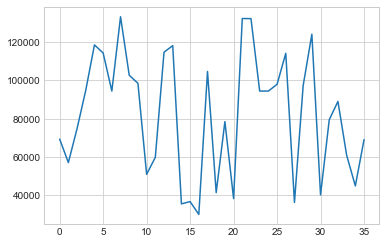

In [1298]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.plot(output_income.Median_HH_income)

# Population Density

In [1299]:
#pdensity=pd.read_csv("../input/oregon-sd-data/population.csv")
pdensity1=pd.merge(bg_proj, pdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_pdensity1 = gpd.clip(pdensity1, gdf1)
inter_pdensity=gpd.overlay(gdf1, buffer_clip_pdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_pdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  SDSECA  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
1             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
3             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
4             NaN   53.569129   44.246575   5.178082    164.0  ...     NaN   

   SDUNIA PUMA5A  BTTRA BTBGA  \
0     NaN    NaN    NaN   NaN   
1     NaN    NaN    NaN   NaN   
2     NaN    NaN    NaN   NaN   
3     NaN    NaN    NaN   NaN   
4     NaN    NaN    NaN   NaN   

                                              NAME_E AJWME001  \
0  Block Group 1, Census Tract 121.04, Boulder Co...     1389   
1  Block Group 1, Census Tract 121.05, Boulder Co...     1388   
2  Block Group 2, Census Tract 121.05, Boulder Co...     1658   
3  Block Group 2, Census Tract 127.01, Boulder Co...     1452   
4  Block Group 2, Census Tract 127.01, Boulder Co...     1452   

                                              NAME_M AJWMM001  \
0  Block Group 1, Census Tract 121.04, Boulder Co...      240   
1  Block Group 1, Census Tract 121.05, Boulder Co...      394   
2  Block Group 2, Census Tract 121.05, Boulder Co...      288   
3  Block Group 2, Census Tract 127.01, Boulder Co...      251   
4  Block Group 2, Census Tract 127.01, Boulder Co...      251   

                                            geometry  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  

[5 rows x 70 columns]

In [1300]:
inter_pdensity["buffered area"]=inter_pdensity.area
inter_pdensity['area factor']=inter_pdensity['buffered area']/inter_pdensity["Total block Area"]
inter_pdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  PUMA5A  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
1             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
3             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
4             NaN   53.569129   44.246575   5.178082    164.0  ...     NaN   

   BTTRA BTBGA                                             NAME_E AJWME001  \
0    NaN   NaN  Block Group 1, Census Tract 121.04, Boulder Co...     1389   
1    NaN   NaN  Block Group 1, Census Tract 121.05, Boulder Co...     1388   
2    NaN   NaN  Block Group 2, Census Tract 121.05, Boulder Co...     1658   
3    NaN   NaN  Block Group 2, Census Tract 127.01, Boulder Co...     1452   
4    NaN   NaN  Block Group 2, Census Tract 127.01, Boulder Co...     1452   

                                              NAME_M AJWMM001  \
0  Block Group 1, Census Tract 121.04, Boulder Co...      240   
1  Block Group 1, Census Tract 121.05, Boulder Co...      394   
2  Block Group 2, Census Tract 121.05, Boulder Co...      288   
3  Block Group 2, Census Tract 127.01, Boulder Co...      251   
4  Block Group 2, Census Tract 127.01, Boulder Co...      251   

                                            geometry buffered area area factor  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  4.462607e+05    0.231472  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  2.972963e+05    0.799382  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  4.052645e+03    0.004902  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  1.959168e+06    0.057666  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  1.546003e+06    0.045505  

[5 rows x 72 columns]

In [1301]:
#    Table 1:     Total Population
 #   Universe:    Total population
#    Source code: B01003
#    NHGIS code:  AJWM
 #       AJWME001:    Total
 
pdensity_filter=inter_pdensity.loc[:, ['osm_id_sensor', 'AJWME001','area factor']]
pdensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJWME001  area factor
0    385509341.0      1389     0.231472
1    385509341.0      1388     0.799382
2    385509341.0      1658     0.004902
3    385509341.0      1452     0.057666
4     17022948.0      1452     0.045505

In [1302]:
age_pop=inter_pdensity.loc[:, ['osm_id_sensor', 'GEOID','AJWME001','area factor']]
age_pop.iloc[:, 2:3]=age_pop.iloc[:, 2:3].mul(age_pop['area factor'],axis=0)
age_pop.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID     AJWME001  area factor
0    385509341.0  080130121041   321.514808     0.231472
1    385509341.0  080130121051  1109.542868     0.799382
2    385509341.0  080130121052     8.126887     0.004902
3    385509341.0  080130127012    83.731019     0.057666
4     17022948.0  080130127012    66.073140     0.045505

In [1303]:
pp=inter_pdensity.loc[:, ['osm_id_sensor','GEOID', 'AJWME001','area factor']]
pp.columns=['osm_id','GEOID', 'AJWME001','pp factor']
pp1=pp.loc[:,["osm_id",'GEOID',"pp factor"]]
pp1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id         GEOID  pp factor
0  385509341.0  080130121041   0.231472
1  385509341.0  080130121051   0.799382
2  385509341.0  080130121052   0.004902
3  385509341.0  080130127012   0.057666
4   17022948.0  080130127012   0.045505

In [1304]:
pdensity_filter.iloc[:, 1:2] = pdensity_filter.iloc[:, 1:2].mul(pdensity_filter['area factor'],axis=0)
pdensity_filter=pdensity_filter.drop(['area factor'],axis=1)
pdensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AJWME001
0    385509341.0   321.514808
1    385509341.0  1109.542868
2    385509341.0     8.126887
3    385509341.0    83.731019
4     17022948.0    66.073140

In [1305]:
# Aggregate by ID
output_pdensity=pdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AJWME001
0     17013477.0   27.754809
1     17016731.0    5.947520
2     17018038.0   19.925756
3     17018364.0  123.593598
4     17018830.0  112.999395

In [1306]:
output_pdensity['population_density']=output_pdensity.AJWME001/(3.1416*size*size*3.86102e-7)
output_pdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AJWME001  population_density
0     17013477.0   27.754809           15.705979
1     17016731.0    5.947520            3.365602
2     17018038.0   19.925756           11.275649
3     17018364.0  123.593598           69.939535
4     17018830.0  112.999395           63.944454

In [1307]:
output_pdensity1=output_pdensity.loc[:, ['osm_id_sensor', 'population_density']]
output_pdensity1.columns=['osm_id', 'population_density']
output_pdensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  population_density
0  17013477.0           15.705979
1  17016731.0            3.365602
2  17018038.0           11.275649
3  17018364.0           69.939535
4  17018830.0           63.944454

# Weighted Median Age

In [1308]:
w_age=pd.merge(age_pop,age_filter,on=["osm_id_sensor","GEOID"])
w_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID     AJWME001  area factor  AJWCE001
0    385509341.0  080130121041   321.514808     0.231472      38.7
1    385509341.0  080130121051  1109.542868     0.799382      40.5
2    385509341.0  080130121052     8.126887     0.004902      33.1
3    385509341.0  080130127012    83.731019     0.057666      51.4
4     17022948.0  080130127012    66.073140     0.045505      51.4

In [1309]:
w_age['w_age']=(w_age['AJWME001'].mul(w_age['AJWCE001'],axis=0))
w_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID     AJWME001  area factor  AJWCE001  \
0    385509341.0  080130121041   321.514808     0.231472      38.7   
1    385509341.0  080130121051  1109.542868     0.799382      40.5   
2    385509341.0  080130121052     8.126887     0.004902      33.1   
3    385509341.0  080130127012    83.731019     0.057666      51.4   
4     17022948.0  080130127012    66.073140     0.045505      51.4   

          w_age  
0  12442.623071  
1  44936.486172  
2    268.999973  
3   4303.774366  
4   3396.159391

In [1310]:
#w_age.iloc[:, 3:4] = w_age.iloc[:, 3:4].mul(w_age['pp factor'],axis=0)
age_filter1=w_age.drop(['GEOID','AJWCE001','area factor'],axis=1)
age_filter1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AJWME001         w_age
0    385509341.0   321.514808  12442.623071
1    385509341.0  1109.542868  44936.486172
2    385509341.0     8.126887    268.999973
3    385509341.0    83.731019   4303.774366
4     17022948.0    66.073140   3396.159391

In [1311]:
# Aggregate by ID
output_median_age=age_filter1.groupby('osm_id_sensor', as_index=False).sum()
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AJWME001        w_age
0     17013477.0   27.754809  1582.024130
1     17016731.0    5.947520   341.482471
2     17018038.0   19.925756  1127.716586
3     17018364.0  123.593598  6212.175797
4     17018830.0  112.999395  5570.870188

In [1312]:
output_median_age['median weighted age']=output_median_age['w_age']/output_median_age['AJWME001']
output_median_age=output_median_age.drop(['AJWME001','w_age'],axis=1)
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  median weighted age
0     17013477.0            57.000000
1     17016731.0            57.415939
2     17018038.0            56.595925
3     17018364.0            50.262925
4     17018830.0            49.300000

In [1313]:
output_median_age.columns=["osm_id","Median Age"]
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Median Age
0  17013477.0   57.000000
1  17016731.0   57.415939
2  17018038.0   56.595925
3  17018364.0   50.262925
4  17018830.0   49.300000

# Employment Density

In [1314]:
#edensity=pd.read_csv("../input/employment/nhgis0012_ds233_20175_2017_blck_grp.csv")
edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2014-2018      NaN        NaN  Colorado       8   
1  G08000100078012  2014-2018      NaN        NaN  Colorado       8   
2  G08000100078021  2014-2018      NaN        NaN  Colorado       8   
3  G08000100078022  2014-2018      NaN        NaN  Colorado       8   
4  G08000100078023  2014-2018      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AJ1FM064  AJ1FM065  AJ1FM066  \
0  Adams County        1      NaN     NaN  ...        46        44        29   
1  Adams County        1      NaN     NaN  ...        38        21        17   
2  Adams County        1      NaN     NaN  ...        35        54        12   
3  Adams County        1      NaN     NaN  ...        39        48        12   
4  Adams County        1      NaN     NaN  ...        13        31        64   

   AJ1FM067  AJ1FM068  AJ1FM069  AJ1FM070  AJ1FM071  AJ1FM072  AJ1FM073  
0        12        29        12        69        44        12        46  
1        17        12        12        53        52        12        13  
2        12        12        12        12        12        12        12  
3        12        12        12        23        12        15        19  
4        12        64        12       119       119        12        12  

[5 rows x 184 columns]

In [1315]:

edensity1=pd.merge(bg_proj, edensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_edensity1 = gpd.clip(edensity1, gdf1)
inter_edensity=gpd.overlay(gdf1, buffer_clip_edensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJ1FM065  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        37   
1             3.0  206.745402  102.547945  14.027397    218.0  ...        27   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
3             3.0  206.745402  102.547945  14.027397    218.0  ...        44   
4             NaN   53.569129   44.246575   5.178082    164.0  ...        44   

   AJ1FM066 AJ1FM067  AJ1FM068 AJ1FM069 AJ1FM070 AJ1FM071 AJ1FM072 AJ1FM073  \
0        12       12        12       12       12       12       12       12   
1        64       12        64       12       12       12       12       12   
2        12       12        12       12       58       53       22       12   
3        12       12        12       12       12       12       12       12   
4        12       12        12       12       12       12       12       12   

                                            geometry  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  

[5 rows x 214 columns]

In [1316]:
inter_edensity["buffered area"]=inter_edensity.area
inter_edensity['area factor']=inter_edensity['buffered area']/inter_edensity["Total block Area"]
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJ1FM067  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
1             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
3             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
4             NaN   53.569129   44.246575   5.178082    164.0  ...        12   

   AJ1FM068 AJ1FM069  AJ1FM070 AJ1FM071 AJ1FM072 AJ1FM073  \
0        12       12        12       12       12       12   
1        64       12        12       12       12       12   
2        12       12        58       53       22       12   
3        12       12        12       12       12       12   
4        12       12        12       12       12       12   

                                            geometry buffered area area factor  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  4.462607e+05    0.231472  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  2.972963e+05    0.799382  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  4.052645e+03    0.004902  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  1.959168e+06    0.057666  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  1.546003e+06    0.045505  

[5 rows x 216 columns]

In [1317]:
#    Table 1:     Employment Status for the Population 16 Years and Over
#    Universe:    Population 16 years and over
#    Source code: B23025
#    NHGIS code:  AH3P
#        AH3PE001:    Total
#        AH3PE002:    In labor force
#        AH3PE003:    In labor force: Civilian labor force
#        AH3PE004:    In labor force: Civilian labor force: Employed
#        AH3PE005:    In labor force: Civilian labor force: Unemployed
#        AH3PE006:    In labor force: Armed Forces
#        AH3PE007:    Not in labor force
 # columns to keep
filtered_columns=['osm_id_sensor','AJ1FE001','area factor']
edensity_filter=inter_edensity.reindex(columns = filtered_columns)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJ1FE001  area factor
0    385509341.0       662     0.231472
1    385509341.0      1012     0.799382
2    385509341.0       855     0.004902
3    385509341.0       547     0.057666
4     17022948.0       547     0.045505

In [1318]:
edensity_filter.iloc[:, 1:2] = edensity_filter.iloc[:, 1:2].mul(edensity_filter['area factor'],axis=0)
edensity_filter=edensity_filter.drop(['area factor'],axis=1)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AJ1FE001
0    385509341.0  153.234559
1    385509341.0  808.975060
2    385509341.0    4.190886
3    385509341.0   31.543297
4     17022948.0   24.891190

In [1319]:
# Aggregate by ID
output_edensity=edensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_edensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   AJ1FE001
0     17013477.0  14.255879
1     17016731.0   3.075761
2     17018038.0  10.410599
3     17018364.0  67.954836
4     17018830.0  51.803249

In [1320]:
output_edensity['employment_density']=output_edensity.AJ1FE001/(3.1416*size*size*3.86102e-7)
output_edensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   AJ1FE001  employment_density
0     17013477.0  14.255879            8.067162
1     17016731.0   3.075761            1.740521
2     17018038.0  10.410599            5.891182
3     17018364.0  67.954836           38.454497
4     17018830.0  51.803249           29.314586

In [1321]:
output_edensity1=output_edensity.loc[:, ['osm_id_sensor', 'employment_density']]
output_edensity1.columns=['osm_id', 'employment_density']
output_edensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  employment_density
0  17013477.0            8.067162
1  17016731.0            1.740521
2  17018038.0            5.891182
3  17018364.0           38.454497
4  17018830.0           29.314586

# Number of Jobs within the Buffer (LEHD data)

In [1322]:
# Number of Jobs within buffer
Number_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


w_geocode  C000  CA01  CA02  CA03  CE01  CE02  CE03  CNS01  CNS02  \
0  80010078011000     7     2     3     2     1     1     5      0      0   
1  80010078011003     1     0     1     0     0     0     1      0      0   
2  80010078011004    26     6    11     9     4    13     9      0      0   
3  80010078011007   170    15    95    60   102    52    16      0      0   
4  80010078011008    67    15    38    14     6    23    38      0      0   

   ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  CFS03  CFS04  CFS05  \
0  ...      0      0      0      0      0      0      0      0      0   
1  ...      0      0      0      0      0      0      0      0      0   
2  ...      0      0      0      0      0      0      0      0      0   
3  ...      0      0      0      0      0      0      0      0      0   
4  ...      0      0      0      0      0      0      0      0      0   

   createdate  
0    20201120  
1    20201120  
2    20201120  
3    20201120  
4    20201120  

[5 rows x 53 columns]

In [1323]:
bg_lehd1=bg_lehd.drop_duplicates(subset='BLOCKID10')
bg_lehd1['BLOCKID10'] = pd.to_numeric(bg_lehd1['BLOCKID10'])
bg_lehd1.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10       object
COUNTYFP10      object
TRACTCE10       object
BLOCKCE         object
BLOCKID10        int64
PARTFLG         object
HOUSING10        int64
POP10            int64
geometry      geometry
dtype: object

In [1324]:
print(bg_lehd1.crs)

epsg:4269


In [1325]:
# set the co-ordinate system first
bg_lehd2 = bg_lehd1.set_crs("EPSG:4269")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_lehd2_proj = bg_lehd2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_lehd2_proj = bg_lehd2_proj.to_crs('epsg:2772')
bg_lehd2_proj.head(5)

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE       BLOCKID10 PARTFLG  HOUSING10  \
0        08        001    008402    1246  80010084021246       N          5   
1        08        001    008402    1240  80010084021240       N          3   
2        08        001    008402    1392  80010084021392       N          0   
3        08        001    008523    3045  80010085233045       N          0   
4        08        001    008523    3047  80010085233047       N          1   

   POP10                                           geometry  
0     14  POLYGON ((1039509.293 351764.898, 1039509.386 ...  
1      9  POLYGON ((1051550.967 351251.634, 1050895.312 ...  
2      0  POLYGON ((1065042.365 351430.196, 1065010.572 ...  
3      0  POLYGON ((971008.738 374660.055, 971009.779 37...  
4      0  POLYGON ((971014.431 374652.880, 971030.054 37...

In [1326]:
bg_lehd2_proj["Total block Area"]=bg_lehd2_proj.area
bg_lehd2_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE       BLOCKID10 PARTFLG  HOUSING10  \
0        08        001    008402    1246  80010084021246       N          5   
1        08        001    008402    1240  80010084021240       N          3   
2        08        001    008402    1392  80010084021392       N          0   
3        08        001    008523    3045  80010085233045       N          0   
4        08        001    008523    3047  80010085233047       N          1   

   POP10                                           geometry  Total block Area  
0     14  POLYGON ((1039509.293 351764.898, 1039509.386 ...      3.701553e+07  
1      9  POLYGON ((1051550.967 351251.634, 1050895.312 ...      1.061803e+08  
2      0  POLYGON ((1065042.365 351430.196, 1065010.572 ...      9.732591e+06  
3      0  POLYGON ((971008.738 374660.055, 971009.779 37...      6.065931e+03  
4      0  POLYGON ((971014.431 374652.880, 971030.054 37...      1.125057e+04

In [1327]:
job1=pd.merge(bg_lehd2_proj, Number_job, left_on='BLOCKID10', right_on='w_geocode', how='left')
buffer_clip_job1 = gpd.clip(job1, gdf1)
buffer_clip_job1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE       BLOCKID10 PARTFLG  \
24107        08        013    013701    4069  80130137014069       N   
24108        08        013    013701    4072  80130137014072       N   
24111        08        013    012101    1020  80130121011020       N   
24118        08        013    013601    1131  80130136011131       N   
24124        08        013    012507    1023  80130125071023       N   

       HOUSING10  POP10                                           geometry  \
24107          3      5  POLYGON ((920466.394 386569.855, 920515.005 38...   
24108          2      6  POLYGON ((914038.652 386437.047, 914086.846 38...   
24111         53    100  POLYGON ((932118.196 380803.001, 932128.081 38...   
24118          4      8  POLYGON ((932791.048 394963.209, 932795.635 39...   
24124         35     98  POLYGON ((936156.952 377783.259, 936153.733 37...   

       Total block Area  ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  CFS03  \
24107     213637.880731  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
24108       6349.234594  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
24111      32427.975880  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
24118     144947.501300  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
24124      35361.535428  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       CFS04  CFS05  createdate  
24107    NaN    NaN         NaN  
24108    NaN    NaN         NaN  
24111    0.0    0.0  20201120.0  
24118    0.0    0.0  20201120.0  
24124    NaN    NaN         NaN  

[5 rows x 63 columns]

In [1328]:
inter_job=gpd.overlay(gdf1, buffer_clip_job1, how='intersection', make_valid=True, keep_geom_type=False)
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  CFA03  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...    0.0   
1             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   
3             3.0  206.745402  102.547945  14.027397    218.0  ...    0.0   
4             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   

   CFA04 CFA05  CFS01 CFS02 CFS03 CFS04 CFS05  createdate  \
0    0.0   0.0    0.0   0.0   0.0   0.0   0.0  20201120.0   
1    NaN   NaN    NaN   NaN   NaN   NaN   NaN         NaN   
2    NaN   NaN    NaN   NaN   NaN   NaN   NaN         NaN   
3    0.0   0.0    0.0   0.0   0.0   0.0   0.0  20201120.0   
4    NaN   NaN    NaN   NaN   NaN   NaN   NaN         NaN   

                                            geometry  
0  POLYGON ((932776.505 385458.610, 932776.405 38...  
1  POLYGON ((932560.543 386326.919, 932553.069 38...  
2  POLYGON ((932576.951 386100.452, 932587.187 38...  
3  POLYGON ((933199.787 385621.316, 933204.820 38...  
4  POLYGON ((933079.219 385315.566, 933077.875 38...  

[5 rows x 77 columns]

In [1329]:
inter_job["buffered area"]=inter_job.area
inter_job['area factor']=inter_job['buffered area']/inter_job["Total block Area"]
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  CFA05  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...    0.0   
1             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   
3             3.0  206.745402  102.547945  14.027397    218.0  ...    0.0   
4             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   

   CFS01 CFS02  CFS03 CFS04 CFS05  createdate  \
0    0.0   0.0    0.0   0.0   0.0  20201120.0   
1    NaN   NaN    NaN   NaN   NaN         NaN   
2    NaN   NaN    NaN   NaN   NaN         NaN   
3    0.0   0.0    0.0   0.0   0.0  20201120.0   
4    NaN   NaN    NaN   NaN   NaN         NaN   

                                            geometry  buffered area  \
0  POLYGON ((932776.505 385458.610, 932776.405 38...  100847.266195   
1  POLYGON ((932560.543 386326.919, 932553.069 38...    9693.091794   
2  POLYGON ((932576.951 386100.452, 932587.187 38...    6099.983098   
3  POLYGON ((933199.787 385621.316, 933204.820 38...   21558.657025   
4  POLYGON ((933079.219 385315.566, 933077.875 38...    5336.057377   

  area factor  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0  

[5 rows x 79 columns]

In [1330]:
 # columns to keep
filtered_columns=['osm_id_sensor','C000','area factor']
job_filter=inter_job.reindex(columns = filtered_columns)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  C000  area factor
0    385509341.0  89.0          1.0
1    385509341.0   NaN          1.0
2    385509341.0   NaN          1.0
3    385509341.0  10.0          1.0
4    385509341.0   NaN          1.0

In [1331]:
job_filter.iloc[:, 1:2] = job_filter.iloc[:, 1:2].mul(job_filter['area factor'],axis=0)
job_filter=job_filter.drop(['area factor'],axis=1)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  C000
0    385509341.0  89.0
1    385509341.0   NaN
2    385509341.0   NaN
3    385509341.0  10.0
4    385509341.0   NaN

In [1332]:
# Aggregate by ID
output_job=job_filter.groupby('osm_id_sensor', as_index=False).sum()
output_job.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor       C000
0     17013477.0   8.993333
1     17016731.0   0.080276
2     17018038.0   0.000000
3     17018364.0  20.659461
4     17018830.0  27.207307

In [1333]:
output_job.columns=['osm_id', 'Number of jobs']
output_job1=output_job
output_job1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Number of jobs
0  17013477.0        8.993333
1  17016731.0        0.080276
2  17018038.0        0.000000
3  17018364.0       20.659461
4  17018830.0       27.207307

# percentage of bike commute or Bike commute per Square miles

In [1334]:
bike_commute.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2015-2019     CO      NaN        NaN  Colorado       8   
1  G08000100078012  2015-2019     CO      NaN        NaN  Colorado       8   
2  G08000100078021  2015-2019     CO      NaN        NaN  Colorado       8   
3  G08000100078022  2015-2019     CO      NaN        NaN  Colorado       8   
4  G08000100078023  2015-2019     CO      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  ...  ALU1M012  ALU1M013  ALU1M014  \
0  Adams County        1      NaN  ...        12        12       103   
1  Adams County        1      NaN  ...        12        12        59   
2  Adams County        1      NaN  ...        12        12        12   
3  Adams County        1      NaN  ...        12        12        12   
4  Adams County        1      NaN  ...        12        12        12   

   ALU1M015  ALU1M016  ALU1M017  ALU1M018  ALU1M019  ALU1M020  ALU1M021  
0        12        12        34        19        33        61        66  
1        12        12        12         9        36        12        13  
2        12        27        12        34        34        12        24  
3        12        28        12        44        14        12        21  
4        12        12        12        12        85        12        12  

[5 rows x 86 columns]

In [1335]:
bikecom1=pd.merge(bg_proj, bike_commute, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_bikecom1 = gpd.clip(bikecom1, gdf1)
inter_bikecom1=gpd.overlay(gdf1, buffer_clip_bikecom1, how='intersection', make_valid=True, keep_geom_type=False)
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  ALU1M013  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
1             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
3             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
4             NaN   53.569129   44.246575   5.178082    164.0  ...        12   

   ALU1M014 ALU1M015  ALU1M016 ALU1M017 ALU1M018 ALU1M019 ALU1M020 ALU1M021  \
0        12       12        12       12       14       12       17       68   
1        12       12        12       12       65       53       12      144   
2        12       12        12       12       43       12       12       87   
3        12       12        12       12       12       12       12       69   
4        12       12        12       12       12       12       12       69   

                                            geometry  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  

[5 rows x 116 columns]

In [1336]:
inter_bikecom1["buffered area"]=inter_bikecom1.area
inter_bikecom1['area factor']=inter_bikecom1['buffered area']/inter_bikecom1["Total block Area"]
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  S009BOU                        NEVA RD  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  ALU1M015  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
1             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
3             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
4             NaN   53.569129   44.246575   5.178082    164.0  ...        12   

   ALU1M016 ALU1M017  ALU1M018 ALU1M019 ALU1M020 ALU1M021  \
0        12       12        14       12       17       68   
1        12       12        65       53       12      144   
2        12       12        43       12       12       87   
3        12       12        12       12       12       69   
4        12       12        12       12       12       69   

                                            geometry buffered area area factor  
0  POLYGON ((932783.358 385277.705, 932666.190 38...  4.462607e+05    0.231472  
1  POLYGON ((933470.645 385414.415, 933363.567 38...  2.972963e+05    0.799382  
2  POLYGON ((933137.141 385295.085, 933019.973 38...  4.052645e+03    0.004902  
3  POLYGON ((934102.861 386360.594, 934085.481 38...  1.959168e+06    0.057666  
4  POLYGON ((934557.955 390413.247, 934540.575 39...  1.546003e+06    0.045505  

[5 rows x 118 columns]

In [1337]:
#Table 1:     Means of Transportation to Work
#    Universe:    Workers 16 years and over
#    Source code: B08301
#    NHGIS code:  ALU1
#        ALU1E001:    Total
#        ALU1E002:    Car, truck, or van
#        ALU1E003:    Car, truck, or van: Drove alone
#        ALU1E004:    Car, truck, or van: Carpooled
#        ALU1E005:    Car, truck, or van: Carpooled: In 2-person carpool
#        ALU1E006:    Car, truck, or van: Carpooled: In 3-person carpool
#        ALU1E007:    Car, truck, or van: Carpooled: In 4-person carpool
#        ALU1E008:    Car, truck, or van: Carpooled: In 5- or 6-person carpool
#        ALU1E009:    Car, truck, or van: Carpooled: In 7-or-more-person carpool
 #       ALU1E010:    Public transportation (excluding taxicab)
#        ALU1E011:    Public transportation (excluding taxicab): Bus
#        ALU1E012:    Public transportation (excluding taxicab): Subway or elevated rail
#        ALU1E013:    Public transportation (excluding taxicab): Long-distance train or commuter rail
#        ALU1E014:    Public transportation (excluding taxicab): Light rail, streetcar or trolley (carro público in Puerto Rico)
#       ALU1E015:    Public transportation (excluding taxicab): Ferryboat
#        ALU1E016:    Taxicab
#        ALU1E017:    Motorcycle
#        ALU1E018:    Bicycle
#        ALU1E019:    Walked
#        ALU1E020:    Other means
#        ALU1E021:    Worked from home

# columns to keep
filtered_columns=['osm_id_sensor','ALU1E001','ALU1E018','area factor']
bikecom_filter=inter_bikecom1.reindex(columns = filtered_columns)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALU1E001  ALU1E018  area factor
0    385509341.0       663         9     0.231472
1    385509341.0      1041        70     0.799382
2    385509341.0       765        26     0.004902
3    385509341.0       629         0     0.057666
4     17022948.0       629         0     0.045505

In [1338]:
bikecom_filter.iloc[:, 1:3] = bikecom_filter.iloc[:, 1:3].mul(bikecom_filter['area factor'],axis=0)
bikecom_filter=bikecom_filter.drop(['area factor'],axis=1)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    ALU1E001   ALU1E018
0    385509341.0  153.466031   2.083249
1    385509341.0  832.157151  55.956773
2    385509341.0    3.749740   0.127442
3    385509341.0   36.271908   0.000000
4     17022948.0   28.622593   0.000000

In [1339]:
# Aggregate by ID
output_bikecom=bikecom_filter.groupby('osm_id_sensor', as_index=False).sum()
output_bikecom.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   ALU1E001  ALU1E018
0     17013477.0  14.230648  0.000000
1     17016731.0   3.594547  0.000000
2     17018038.0  10.311303  0.000000
3     17018364.0  71.295601  0.008263
4     17018830.0  49.526183  0.000000

In [1340]:
# Calculate the percentage pf bike commuter and bike commuter density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1341]:
output_bikecom['Percentage of Bike Commuter']=(output_bikecom['ALU1E018']/output_bikecom['ALU1E001'])*100
output_bikecom['bike commuter density']=output_bikecom['ALU1E018']/(3.1416*size*size*3.861e-7)
output_bikecom.columns=["osm_id","Total Commuter", "Bike Commuter", "Percentage of Bike Commuter",'bike commuter density']
output_bikecom.head()

osm_id  Total Commuter  Bike Commuter  Percentage of Bike Commuter  \
0  17013477.0       14.230648       0.000000                      0.00000   
1  17016731.0        3.594547       0.000000                      0.00000   
2  17018038.0       10.311303       0.000000                      0.00000   
3  17018364.0       71.295601       0.008263                      0.01159   
4  17018830.0       49.526183       0.000000                      0.00000   

   bike commuter density  
0               0.000000  
1               0.000000  
2               0.000000  
3               0.004676  
4               0.000000

# Extract slope from raster file

In [1342]:
#https://pysal.org/scipy2019-intermediate-gds/deterministic/gds2-rasters.html

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


EPSG:4269


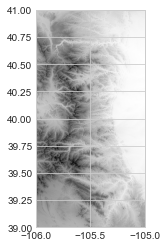

<AxesSubplot:>

In [1343]:
# Open the raster image if you have multiple image combine it using arcGIS raster data set 
#eu = rasterio.open('C:/Users/mxm5116/Desktop/Eugene Portland/Eugenc.img')
print(eu.crs)
rioplot.show(eu)

In [1344]:
print(strava_proj.crs)

epsg:2772


In [1345]:
# set the co-ordinate system first
stravas = strava_proj.set_crs("EPSG:2772")
stravas ["length"]=stravas["geometry"].length # in m
# Let's take a copy of our layer
strava_slope = stravas.copy()

# Reproject the geometries by replacing the values with projected ones
strava_slope_new = strava_slope.to_crs(epsg=4269)
strava_slope_new.head(10)

OBJECTID    ID     OSM_ID          OSM_NAME OSM_META    OSM_SOURCE  \
0         1   1.0  4271726.0       30th Street     None  5.207434e+08   
1         2   2.0  4271726.0       30th Street     None  1.041202e+09   
2         3   3.0  4271726.0       30th Street     None  2.703585e+09   
3         4   4.0  4271726.0       30th Street     None  1.041202e+09   
4         5   5.0  4279016.0  Table Mesa Court     None  2.567663e+07   
5         6   6.0  4279016.0  Table Mesa Court     None  3.929910e+08   
6         7   7.0  4280551.0     Stephens Road     None  2.568937e+07   
7         8   8.0  4280551.0     Stephens Road     None  2.568937e+07   
8         9  10.0  4375030.0              None     None  1.764405e+08   
9        10  38.0  4924640.0        Oak Circle     None  3.232482e+07   

     OSM_TARGET  CLAZZ  FLAGS    SOURCE  ...   KMH      COST      REVERSE_CO  \
0  1.041202e+09   32.0    3.0     760.0  ...  50.0  0.001203  1000000.000000   
1  2.703585e+09   32.0    3.0  298999.0  ...  50.0  0.000872  1000000.000000   
2  1.041202e+09   32.0    3.0  448631.0  ...  50.0  0.001769  1000000.000000   
3  5.207539e+08   32.0    3.0  299007.0  ...  50.0  0.001714  1000000.000000   
4  3.929910e+08   32.0    3.0     996.0  ...  50.0  0.000691        0.000691   
5  3.929910e+08   32.0    3.0     997.0  ...  50.0  0.001877        0.001877   
6  2.568937e+07   32.0    3.0     998.0  ...  50.0  0.002682        0.002682   
7  1.764882e+08   32.0    3.0   21663.0  ...  50.0  0.004651        0.004651   
8  2.667869e+07   91.0    6.0    1002.0  ...   5.0  0.008712        0.008712   
9  1.760635e+08   32.0    3.0    1020.0  ...  50.0  0.003786        0.003786   

           X1         Y1          X2         Y2  Shape_Leng  \
0 -105.253117  39.999954 -105.253115  39.999413    0.000541   
1 -105.253115  39.999413 -105.253114  39.999021    0.000392   
2 -105.253114  39.999021 -105.253111  39.998225    0.000795   
3 -105.253111  39.998225 -105.252981  39.997470    0.000781   
4 -105.260134  39.980297 -105.260130  39.980607    0.000311   
5 -105.260130  39.980607 -105.260130  39.980607    0.000891   
6 -105.262728  39.981225 -105.261341  39.981711    0.001501   
7 -105.261341  39.981711 -105.258796  39.981203    0.002657   
8 -105.230841  39.993164 -105.231299  39.993279    0.000491   
9 -105.099479  39.931441 -105.101371  39.930551    0.002091   

                                            geometry      length  
0  LINESTRING (-105.25310 39.99995, -105.25310 39...   60.056793  
1  LINESTRING (-105.25310 39.99940, -105.25310 39...   43.535338  
2  LINESTRING (-105.25310 39.99901, -105.25310 39...   88.303169  
3  LINESTRING (-105.25310 39.99822, -105.25310 39...   85.590609  
4  LINESTRING (-105.26012 39.98029, -105.26012 39...   34.488057  
5  LINESTRING (-105.26012 39.98060, -105.26004 39...   93.789748  
6  LINESTRING (-105.26272 39.98122, -105.26209 39...  134.331921  
7  LINESTRING (-105.26133 39.98170, -105.26010 39...  233.004747  
8  LINESTRING (-105.23083 39.99316, -105.23087 39...   43.635045  
9  LINESTRING (-105.09947 39.93143, -105.10017 39...  189.557150  

[10 rows x 22 columns]

In [1346]:
# get the slope for each link of the network
strava_slope_new=GeoDataFrame.explode(strava_slope_new)
# First identify the starting and ending node of each link
strava_slope_new['starting point'] = None
strava_slope_new['ending point'] = None

for index, row in strava_slope_new.iterrows():
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    strava_slope_new.at[index,'starting point'] = Point(first_coord)
    strava_slope_new.at[index,'ending point'] = Point(last_coord)
    strava_slope_new

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1347]:
strava_slope_new.head(5)

OBJECTID   ID     OSM_ID          OSM_NAME OSM_META    OSM_SOURCE  \
0 0         1  1.0  4271726.0       30th Street     None  5.207434e+08   
1 0         2  2.0  4271726.0       30th Street     None  1.041202e+09   
2 0         3  3.0  4271726.0       30th Street     None  2.703585e+09   
3 0         4  4.0  4271726.0       30th Street     None  1.041202e+09   
4 0         5  5.0  4279016.0  Table Mesa Court     None  2.567663e+07   

       OSM_TARGET  CLAZZ  FLAGS    SOURCE  ...      REVERSE_CO          X1  \
0 0  1.041202e+09   32.0    3.0     760.0  ...  1000000.000000 -105.253117   
1 0  2.703585e+09   32.0    3.0  298999.0  ...  1000000.000000 -105.253115   
2 0  1.041202e+09   32.0    3.0  448631.0  ...  1000000.000000 -105.253114   
3 0  5.207539e+08   32.0    3.0  299007.0  ...  1000000.000000 -105.253111   
4 0  3.929910e+08   32.0    3.0     996.0  ...        0.000691 -105.260134   

            Y1          X2         Y2  Shape_Leng     length  \
0 0  39.999954 -105.253115  39.999413    0.000541  60.056793   
1 0  39.999413 -105.253114  39.999021    0.000392  43.535338   
2 0  39.999021 -105.253111  39.998225    0.000795  88.303169   
3 0  39.998225 -105.252981  39.997470    0.000781  85.590609   
4 0  39.980297 -105.260130  39.980607    0.000311  34.488057   

                                              geometry  \
0 0  LINESTRING (-105.25310 39.99995, -105.25310 39...   
1 0  LINESTRING (-105.25310 39.99940, -105.25310 39...   
2 0  LINESTRING (-105.25310 39.99901, -105.25310 39...   
3 0  LINESTRING (-105.25310 39.99822, -105.25310 39...   
4 0  LINESTRING (-105.26012 39.98029, -105.26012 39...   

                                   starting point  \
0 0  POINT (-105.2531046563963 39.99994539965464)   
1 0  POINT (-105.2531028590122 39.99940450217688)   
2 0   POINT (-105.253101561709 39.99901240404818)   
3 0  POINT (-105.2530988655419 39.99821710750916)   
4 0   POINT (-105.260122380822 39.98028861256802)   

                                     ending point  
0 0  POINT (-105.2531028590122 39.99940450217688)  
1 0   POINT (-105.253101561709 39.99901240404818)  
2 0  POINT (-105.2530988655419 39.99821710750916)  
3 0  POINT (-105.2529689696879 39.99746141020555)  
4 0  POINT (-105.2601180794046 39.98059921089892)  

[5 rows x 24 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

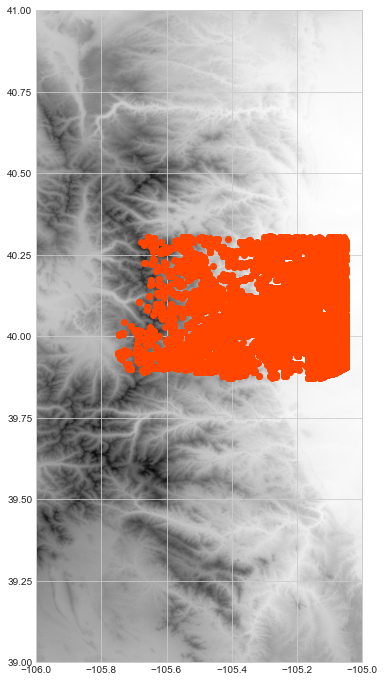

In [1348]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
strava_slope_new.boundary.plot(ax=ax, color='orangered')
show(eu, ax=ax)

In [1349]:
sf1=strava_slope_new.loc[:,["OSM_ID","starting point"]]
sf1.columns=["OSM_ID","geometry"]
sf1['start_lon'] = sf1.geometry.apply(lambda p: p.x)
sf1['start_lat'] = sf1.geometry.apply(lambda p: p.y)
sf2=sf1.loc[:,["OSM_ID","geometry","start_lon","start_lat"]]
sf2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID                     geometry   start_lon  start_lat
0 0  4271726.0  POINT (-105.25310 39.99995) -105.253105  39.999945
1 0  4271726.0  POINT (-105.25310 39.99940) -105.253103  39.999405
2 0  4271726.0  POINT (-105.25310 39.99901) -105.253102  39.999012
3 0  4271726.0  POINT (-105.25310 39.99822) -105.253099  39.998217
4 0  4279016.0  POINT (-105.26012 39.98029) -105.260122  39.980289

In [1350]:
sf2["starting_ele"]= None
#point in test['geometry']:
x = sf2["start_lon"]
y = sf2["start_lat"]
row, col = eu.index(x,y)
sf2["starting_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1351]:
sf2.head(5)

OSM_ID                     geometry   start_lon  start_lat  \
0 0  4271726.0  POINT (-105.25310 39.99995) -105.253105  39.999945   
1 0  4271726.0  POINT (-105.25310 39.99940) -105.253103  39.999405   
2 0  4271726.0  POINT (-105.25310 39.99901) -105.253102  39.999012   
3 0  4271726.0  POINT (-105.25310 39.99822) -105.253099  39.998217   
4 0  4279016.0  POINT (-105.26012 39.98029) -105.260122  39.980289   

     starting_ele  
0 0   1626.226074  
1 0   1626.247925  
2 0   1626.670776  
3 0   1628.044434  
4 0   1687.918091

In [1352]:
ef1=strava_slope_new.loc[:,["OSM_ID","ending point"]]
ef1
ef1.columns=["OSM_ID","geometry"]
ef1['end_lon'] = ef1.geometry.apply(lambda p: p.x)
ef1['end_lat'] = ef1.geometry.apply(lambda p: p.y)
ef2=ef1.loc[:,["OSM_ID","geometry","end_lon","end_lat"]]
ef2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID                     geometry     end_lon    end_lat
0 0  4271726.0  POINT (-105.25310 39.99940) -105.253103  39.999405
1 0  4271726.0  POINT (-105.25310 39.99901) -105.253102  39.999012
2 0  4271726.0  POINT (-105.25310 39.99822) -105.253099  39.998217
3 0  4271726.0  POINT (-105.25297 39.99746) -105.252969  39.997461
4 0  4279016.0  POINT (-105.26012 39.98060) -105.260118  39.980599

In [1353]:
ef1["ending_ele"]= None
#point in test['geometry']:
x = ef1["end_lon"]
y = ef1["end_lat"]
row, col = eu.index(x,y)
ef1["ending_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1354]:
#rioplot.show(n46w123, cmap='hot')
#strava_slope_new.boundary.plot(ax=plt.gca(), color='skyblue')

In [1355]:
ef1.head()

OSM_ID                     geometry     end_lon    end_lat  \
0 0  4271726.0  POINT (-105.25310 39.99940) -105.253103  39.999405   
1 0  4271726.0  POINT (-105.25310 39.99901) -105.253102  39.999012   
2 0  4271726.0  POINT (-105.25310 39.99822) -105.253099  39.998217   
3 0  4271726.0  POINT (-105.25297 39.99746) -105.252969  39.997461   
4 0  4279016.0  POINT (-105.26012 39.98060) -105.260118  39.980599   

      ending_ele  
0 0  1626.247925  
1 0  1626.670776  
2 0  1628.044434  
3 0  1629.751099  
4 0  1689.275269

In [1356]:
s=sf2
s=s.drop(["geometry"],axis=1)
s.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID   start_lon  start_lat  starting_ele
0 0  4271726.0 -105.253105  39.999945   1626.226074
1 0  4271726.0 -105.253103  39.999405   1626.247925
2 0  4271726.0 -105.253102  39.999012   1626.670776
3 0  4271726.0 -105.253099  39.998217   1628.044434
4 0  4279016.0 -105.260122  39.980289   1687.918091

In [1357]:
e=ef1
e=e.drop(["geometry"],axis=1)
e.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID     end_lon    end_lat   ending_ele
0 0  4271726.0 -105.253103  39.999405  1626.247925
1 0  4271726.0 -105.253102  39.999012  1626.670776
2 0  4271726.0 -105.253099  39.998217  1628.044434
3 0  4271726.0 -105.252969  39.997461  1629.751099
4 0  4279016.0 -105.260118  39.980599  1689.275269

In [1358]:
from functools import reduce
strava_all=[strava_slope_new,s,e]

strava_all1= reduce(lambda  left,right: pd.merge(left,right,on=['OSM_ID'],
                                            how='outer'), strava_all).fillna('0')
strava_all1["slope"]=abs((strava_all1['starting_ele']-strava_all1['ending_ele'])/strava_all1['length'])*100
strava_all1=strava_all1.drop_duplicates(subset=['ID'], keep='first')
strava_all1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OBJECTID   ID     OSM_ID          OSM_NAME OSM_META    OSM_SOURCE  \
0          1  1.0  4271726.0       30th Street        0  5.207434e+08   
16         2  2.0  4271726.0       30th Street        0  1.041202e+09   
32         3  3.0  4271726.0       30th Street        0  2.703585e+09   
48         4  4.0  4271726.0       30th Street        0  1.041202e+09   
64         5  5.0  4279016.0  Table Mesa Court        0  2.567663e+07   

      OSM_TARGET  CLAZZ  FLAGS    SOURCE  ...  \
0   1.041202e+09   32.0    3.0     760.0  ...   
16  2.703585e+09   32.0    3.0  298999.0  ...   
32  1.041202e+09   32.0    3.0  448631.0  ...   
48  5.207539e+08   32.0    3.0  299007.0  ...   
64  3.929910e+08   32.0    3.0     996.0  ...   

                                             geometry  \
0   LINESTRING (-105.25310 39.99995, -105.25310 39...   
16  LINESTRING (-105.25310 39.99940, -105.25310 39...   
32  LINESTRING (-105.25310 39.99901, -105.25310 39...   
48  LINESTRING (-105.25310 39.99822, -105.25310 39...   
64  LINESTRING (-105.26012 39.98029, -105.26012 39...   

                                  starting point  \
0   POINT (-105.2531046563963 39.99994539965464)   
16  POINT (-105.2531028590122 39.99940450217688)   
32   POINT (-105.253101561709 39.99901240404818)   
48  POINT (-105.2530988655419 39.99821710750916)   
64   POINT (-105.260122380822 39.98028861256802)   

                                    ending point   start_lon  start_lat  \
0   POINT (-105.2531028590122 39.99940450217688) -105.253105  39.999945   
16   POINT (-105.253101561709 39.99901240404818) -105.253105  39.999945   
32  POINT (-105.2530988655419 39.99821710750916) -105.253105  39.999945   
48  POINT (-105.2529689696879 39.99746141020555) -105.253105  39.999945   
64  POINT (-105.2601180794046 39.98059921089892) -105.260122  39.980289   

    starting_ele     end_lon    end_lat   ending_ele     slope  
0    1626.226074 -105.253103  39.999405  1626.247925  0.036383  
16   1626.226074 -105.253103  39.999405  1626.247925  0.050190  
32   1626.226074 -105.253103  39.999405  1626.247925  0.024745  
48   1626.226074 -105.253103  39.999405  1626.247925  0.025529  
64   1687.918091 -105.260118  39.980599  1689.275269  3.935211  

[5 rows x 31 columns]

In [1359]:
print(strava_all1.crs)
strava_all2=strava_all1.copy()

epsg:4269


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1360]:
# set the co-ordinate system first
strava_all2 = strava_all2.set_crs("EPSG:4269")

# Reproject the geometries by replacing the values with projected ones
strava_all2_slope = strava_all2.to_crs(epsg=2772)
strava_all2_slope.head(10)

OBJECTID    ID     OSM_ID          OSM_NAME OSM_META    OSM_SOURCE  \
0          1   1.0  4271726.0       30th Street        0  5.207434e+08   
16         2   2.0  4271726.0       30th Street        0  1.041202e+09   
32         3   3.0  4271726.0       30th Street        0  2.703585e+09   
48         4   4.0  4271726.0       30th Street        0  1.041202e+09   
64         5   5.0  4279016.0  Table Mesa Court        0  2.567663e+07   
68         6   6.0  4279016.0  Table Mesa Court        0  3.929910e+08   
72         7   7.0  4280551.0     Stephens Road        0  2.568937e+07   
76         8   8.0  4280551.0     Stephens Road        0  2.568937e+07   
80         9  10.0  4375030.0                 0        0  1.764405e+08   
81        10  38.0  4924640.0        Oak Circle        0  3.232482e+07   

      OSM_TARGET  CLAZZ  FLAGS    SOURCE  ...  \
0   1.041202e+09   32.0    3.0     760.0  ...   
16  2.703585e+09   32.0    3.0  298999.0  ...   
32  1.041202e+09   32.0    3.0  448631.0  ...   
48  5.207539e+08   32.0    3.0  299007.0  ...   
64  3.929910e+08   32.0    3.0     996.0  ...   
68  3.929910e+08   32.0    3.0     997.0  ...   
72  2.568937e+07   32.0    3.0     998.0  ...   
76  1.764882e+08   32.0    3.0   21663.0  ...   
80  2.667869e+07   91.0    6.0    1002.0  ...   
81  1.760635e+08   32.0    3.0    1020.0  ...   

                                             geometry  \
0   LINESTRING (935484.289 378843.973, 935484.610 ...   
16  LINESTRING (935484.610 378783.917, 935484.842 ...   
32  LINESTRING (935484.842 378740.383, 935485.319 ...   
48  LINESTRING (935485.319 378652.081, 935485.516 ...   
64  LINESTRING (934890.955 376659.816, 934891.229 ...   
68  LINESTRING (934891.229 376694.303, 934897.987 ...   
72  LINESTRING (934669.155 376762.300, 934722.873 ...   
76  LINESTRING (934787.445 376816.534, 934892.271 ...   
80  LINESTRING (937388.697 378095.667, 937385.433 ...   
81  LINESTRING (948637.841 371284.929, 948578.154 ...   

                                  starting point  \
0   POINT (-105.2531046563963 39.99994539965464)   
16  POINT (-105.2531028590122 39.99940450217688)   
32   POINT (-105.253101561709 39.99901240404818)   
48  POINT (-105.2530988655419 39.99821710750916)   
64   POINT (-105.260122380822 39.98028861256802)   
68  POINT (-105.2601180794046 39.98059921089892)   
72  POINT (-105.2627158805639 39.98121701678912)   
76   POINT (-105.261329275253 39.98170260971722)   
80  POINT (-105.2308292762638 39.99315589730874)   
81  POINT (-105.0994678914411 39.93143271455251)   

                                    ending point   start_lon  start_lat  \
0   POINT (-105.2531028590122 39.99940450217688) -105.253105  39.999945   
16   POINT (-105.253101561709 39.99901240404818) -105.253105  39.999945   
32  POINT (-105.2530988655419 39.99821710750916) -105.253105  39.999945   
48  POINT (-105.2529689696879 39.99746141020555) -105.253105  39.999945   
64  POINT (-105.2601180794046 39.98059921089892) -105.260122  39.980289   
68  POINT (-105.2601180794046 39.98059921089892) -105.260122  39.980289   
72   POINT (-105.261329275253 39.98170260971722) -105.262716  39.981217   
76  POINT (-105.2587839732952 39.98119490390004) -105.262716  39.981217   
80  POINT (-105.2312868737886 39.99327049703799) -105.230829  39.993156   
81   POINT (-105.1013596879698 39.9305424208148) -105.099468  39.931433   

    starting_ele     end_lon    end_lat   ending_ele     slope  
0    1626.226074 -105.253103  39.999405  1626.247925  0.036383  
16   1626.226074 -105.253103  39.999405  1626.247925  0.050190  
32   1626.226074 -105.253103  39.999405  1626.247925  0.024745  
48   1626.226074 -105.253103  39.999405  1626.247925  0.025529  
64   1687.918091 -105.260118  39.980599  1689.275269  3.935211  
68   1687.918091 -105.260118  39.980599  1689.275269  1.447043  
72   1702.048950 -105.261329  39.981703  1695.930420  4.554785  
76   1702.048950 -105.261329  39.981703  1695.930420  2.625925  
80   1619.429199 -105.231287  39.9932

In [1361]:
inter_road.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['site_id', 'site_name', 'sensor_type', 'year', 'region',
       'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'latitude', 'longitude', 'comment', 'osm_id_sensor', 'osm_id', 'name',
       'ref', 'type', 'oneway', 'bridge', 'maxspeed', 'geometry', 'Length'],
      dtype='object')

In [1362]:
#Identify the OSM ID link that have bridge

inter_road_bridge=pd.merge (left=ecoshort, right=bridge_only, left_on='osm_id_sensor', right_on='osm_id',how='inner')
inter_road_bridge=inter_road_bridge.loc[:,["osm_id_sensor", "bridge"]]
#inter_road_bridge=inter_road_bridge.drop_duplicates(subset='osm_id_1')
#inter_road_bridge = inter_road_bridge[inter_road_bridge['bridge'] > 0]
inter_road_bridge.head()

osm_id_sensor  bridge
0    385509341.0       0
1     43176757.0       0
2    439968204.0       0
3     43313642.0       0
4     46148772.0       0

In [1363]:
strava_all2_slope=strava_all2_slope.loc[:,['geometry','slope']]
gdf1=gdf1.loc[:,['osm_id_sensor','geometry']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1364]:
# Now clip with buffer for each location
#buffer_clip_slope = gpd.clip(strava_all2_slope, gdf1)
#buffer_clip_slope=buffer_clip_slope.drop(["osm_id"],axis=1)
buffer_clip_slope1=gpd.sjoin(strava_all2_slope,gdf1,op='intersects') 
buffer_clip_slope1.head(5)


geometry     slope  \
0       LINESTRING (935484.289 378843.973, 935484.610 ...  0.036383   
16      LINESTRING (935484.610 378783.917, 935484.842 ...  0.050190   
32      LINESTRING (935484.842 378740.383, 935485.319 ...  0.024745   
48      LINESTRING (935485.319 378652.081, 935485.516 ...  0.025529   
252104  LINESTRING (935494.381 378522.588, 935412.554 ...  0.415137   

        index_right  osm_id_sensor  
0                 8     37998424.0  
16                8     37998424.0  
32                8     37998424.0  
48                8     37998424.0  
252104            8     37998424.0

In [1365]:
#Make all link having bridge  slope is zero
buffer_clip_slope2=pd.merge(inter_road_bridge,buffer_clip_slope1, right_on='osm_id_sensor', left_on='osm_id_sensor',how='inner')
buffer_clip_slope2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0    385509341.0       0  LINESTRING (933188.176 385539.916, 933234.338 ...   
1    385509341.0       0  LINESTRING (933185.874 385618.321, 933283.924 ...   
2    385509341.0       0  LINESTRING (933283.924 385619.198, 933326.778 ...   
3    385509341.0       0  LINESTRING (933326.778 385619.061, 933384.178 ...   
4    385509341.0       0  LINESTRING (933384.178 385618.916, 933388.051 ...   

      slope  index_right  
0  2.847572            0  
1  3.385707            0  
2  7.746800            0  
3  5.783622            0  
4  3.894838            0

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

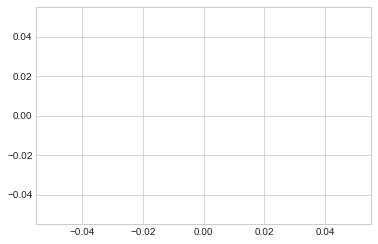

In [1366]:
# Separate bridge and non bridge data
bridge_presence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge ==1] 
bridge_presence.slope.plot()


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

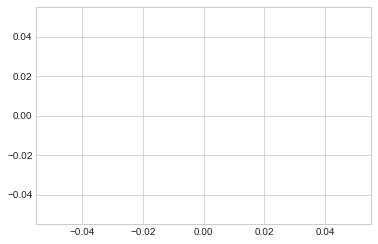

In [1367]:
bridge_presence['slope']=0
bridge_presence.slope.plot()

In [1368]:
bridge_absence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge==0] 
bridge_absence.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0    385509341.0       0  LINESTRING (933188.176 385539.916, 933234.338 ...   
1    385509341.0       0  LINESTRING (933185.874 385618.321, 933283.924 ...   
2    385509341.0       0  LINESTRING (933283.924 385619.198, 933326.778 ...   
3    385509341.0       0  LINESTRING (933326.778 385619.061, 933384.178 ...   
4    385509341.0       0  LINESTRING (933384.178 385618.916, 933388.051 ...   

      slope  index_right  
0  2.847572            0  
1  3.385707            0  
2  7.746800            0  
3  5.783622            0  
4  3.894838            0

In [1369]:
# now join again
buffer_clip_slope3=pd.concat([bridge_presence,bridge_absence])
# put the cap for the slope as maximum 25%
buffer_clip_slope3=buffer_clip_slope3[buffer_clip_slope3['slope']<25]
buffer_clip_slope3.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0    385509341.0       0  LINESTRING (933188.176 385539.916, 933234.338 ...   
1    385509341.0       0  LINESTRING (933185.874 385618.321, 933283.924 ...   
2    385509341.0       0  LINESTRING (933283.924 385619.198, 933326.778 ...   
3    385509341.0       0  LINESTRING (933326.778 385619.061, 933384.178 ...   
4    385509341.0       0  LINESTRING (933384.178 385618.916, 933388.051 ...   

      slope  index_right  
0  2.847572            0  
1  3.385707            0  
2  7.746800            0  
3  5.783622            0  
4  3.894838            0

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

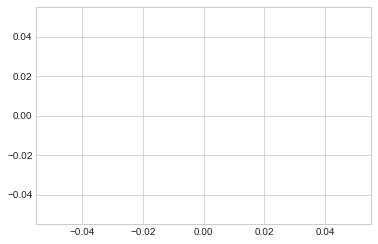

In [1370]:
check=buffer_clip_slope3[buffer_clip_slope3['bridge']== 1]
check.slope.plot()

In [1371]:
# Now calculate the mean slope for each count location
output_slope=buffer_clip_slope3.groupby(by=['osm_id_sensor'])['slope'].mean().reset_index()
output_slope.columns=['osm_id','slope']
output_slope.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     slope
0  17013477.0  4.676555
1  17016731.0  2.672485
2  17018038.0  4.803481
3  17018364.0  0.553971
4  17018830.0  0.999193

# Import Weather Daily level data from weather underground website Using python coding

1. https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/
2. https://bojanstavrikj.github.io/content/page1/wunderground_scraper

In [1372]:
#!pip install beautifulsoup4
#!pip install -U selenium
#!pip install webdriver-manager
#!pip install chromedriver 
#!pip3 install webdrivermanager


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1373]:
from bs4 import BeautifulSoup as BS #conda install -c anaconda beautifulsoup4 
from selenium import webdriver
from functools import reduce
import pandas as pd
import time

In [1374]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from os import system as System
from webdriver_manager.utils import ChromeType
#from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [1375]:
    def render_page(url):
        options = Options()
        options.add_argument("user-data-dir=C:\\Users\\mxm5116\\Desktop\\Profile 1")
        driver = webdriver.Chrome(executable_path=r'C:/Program Files/Google/Chrome/Application/chromedriver_win32/chromedriver.exe', chrome_options=options)
        driver.get(url)
        time.sleep(3)
        r = driver.page_source
        driver.quit()
        return r  

In [1376]:
# driver =webdriver.Chrome(r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')
# driver = webdriver.Firefox(executable_path=r'C:\Users\mxm5116\Downloads\geckodriver-v0.29.0-win64\geckodriver.exe')
#chrome_options = Options()
# chrome_options.add_argument('--headless')
#chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
#driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')

#driver.get(r'https://www.google.com')
#time.sleep(5)
#r = driver.page_source
#print(r)

In [1377]:
#def render_page(url):
#        chrome_options = Options()
#        chrome_options.add_argument('--headless')
#        chrome_options.add_argument('--no-sandbox')
#        chrome_options.add_argument('--disable-dev-shm-usage')
#        driver = webdriver.Chrome("executable_path=r"C:/Users/mxm5116/Downloads/chromedriver_win32/chromedriver.exe")
#        driver.get(url)
#        time.sleep(3)
#        r = driver.page_source
#        driver.quit()
#       return r

In [1378]:
  def scraper(page, dates):
        output = pd.DataFrame()

        for d in dates:

            url = str(str(page) + str(d))
            print(url)

            r = render_page(url)
            print(r)
            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            else:
                print('Data not in normal length')

            dfs = [Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation]

            df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

            df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

            output = output.append(df_final)

        print('Scraper done!')

        output = output[['Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                         'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                         'Pres_avg', 'Pres_min', 'Precipitation', 'Date']]

        return output


# Please input the date and page link to extract the data for your study area here

In [1379]:
dates = ['2019-1','2019-2','2019-3','2019-4','2019-5','2019-6','2019-7','2019-8','2019-9','2019-10','2019-11','2019-12']
# insert the date you want to extract the data
page = 'https://www.wunderground.com/history/monthly/us/or/eugene/KEUG/date/'
# insert your study location link here
#df_output = scraper(page,dates)

In [1380]:
w19=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/boulder_weather.csv")
w19

Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  Hum_max  Hum_avg  Hum_min  \
0         6.4         3        4      0.7       -2       88     77.9       65   
1        19.3         1       13      5.9       -3       88     61.3       28   
2        32.0        12       19     14.2        5       81     53.2       22   
3        38.8        21       22     18.3       15       89     48.6       20   
4        40.7        23       20     18.6       16       74     44.2       23   
..        ...       ...      ...      ...      ...      ...      ...      ...   
359      28.6        25       27     25.4       22       93     88.2       70   
360      26.0        24       27     22.1       12      100     86.2       58   
361      24.6        15       11      7.7        3       59     49.2       37   
362      20.2         9       17      8.2        1       77     60.9       40   
363      22.8        10       17     12.2        6       88     65.9       36   

     Wind_max  Wind_avg  Wind_min  Pres_max  Pres_avg  Pres_min  \
0          13       5.6         0      25.2      25.1      25.0   
1           9       3.7         0      25.0      25.0      25.0   
2           8       3.7         0      25.0      24.9      24.9   
3           9       4.8         0      25.0      25.0      24.9   
4          10       5.6         0      25.0      24.9      24.9   
..        ...       ...       ...       ...       ...       ...   
359        10       3.0         0      25.0      24.9      24.7   
360        30      17.9         6      24.9      24.8      24.7   
361        23      12.7         0      24.9      24.9      24.8   
362         8       3.8         0      25.1      25.0      25.0   
363         8       3.1         0      25.1      24.9      24.8   

     Precipitation        Date  
0             0.00    2019-1-1  
1             0.00    2019-1-2  
2             0.00    2019-1-3  
3             0.00    2019-1-4  
4             0.00    2019-1-5  
..             ...         ...  
359           0.00  2019-12-27  
360           0.01  2019-12-28  
361           0.00  2019-12-29  
362           0.00  2019-12-30  
363           0.00  2019-12-31  

[364 rows x 16 columns]

In [1381]:
output_weather=w19.loc[:, ['Temp_avg', 'Hum_avg','Precipitation']]
output_weather

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg  Hum_avg  Precipitation
0         6.4     77.9           0.00
1        19.3     61.3           0.00
2        32.0     53.2           0.00
3        38.8     48.6           0.00
4        40.7     44.2           0.00
..        ...      ...            ...
359      28.6     88.2           0.00
360      26.0     86.2           0.01
361      24.6     49.2           0.00
362      20.2     60.9           0.00
363      22.8     65.9           0.00

[364 rows x 3 columns]

In [1382]:
output_weather.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg         float64
Hum_avg          float64
Precipitation    float64
dtype: object

In [1383]:
# Convert object to float
output_weather2=output_weather.astype(str).astype(float)

In [1384]:
output_weather2.isnull().values.any()

False

In [1385]:
# Take the average for annual
output_weather3=output_weather2.mean()
output_weather3

Temp_avg         47.495330
Hum_avg          60.606044
Precipitation     0.021209
dtype: float64

# Aggregate all output together in a dataframe

In [1386]:
from functools import reduce
import pandas as pd
# compile the list of dataframes you want to merge
df_all = [emerging_data,output_bikecom,output_lane,output_intersection_densitya,output_commercial,commercial_distance1,commercialcc_distance1,output_industrial,industrial_distance1,industrialcc_distance1, output_residential,residential_distance1,residentialcc_distance1, output_retail,retail_distance1,retailcc_distance1,output_grass,grass_distance1,grasscc_distance1,output_park,Park_distance1,parkcc_distance1,output_water,water_distance1,watercc_distance1,output_forest,forest_distance1,forestcc_distance1,CBD_distance1,output_bparking,output_bstop,output_school,output_school_distance,output_college,output_college_distance,output_university,output_university_distance,output_intersection_density1,output_primary,output_secondary,output_tertiary,output_residential,output_path,output_cycleway,output_footway,output_bikeway_all_lane,output_bikeway_all_track, pt_road_type2,output_bikeway_all_lane_binary,output_bikeway_all_track_binary,output_meanspeed,output_pointspeed,output_bridge,output_point_bridge,output_pct_race1,output_pct_gender1,output_student,output_pct_edu1,output_median_age,output_income,output_hhdensity1,output_pdensity1,output_edensity1,output_job1,output_slope]

In [1387]:
#Merge by ID
df_merged_eco_short = reduce(lambda  left,right: pd.merge(left,right,on=['osm_id'],
                                            how='left'), df_all)
df_merged_eco_short=df_merged_eco_short.drop_duplicates(subset=['site_id'],keep='first')
df_merged_eco_short.head()

osm_id  site_id sensor_type       AADBT     stv_adb  stv_c_adb  \
0  385509341.0  P001BOU   permanent  206.745402  102.547945  14.027397   
1   43176757.0  P002BOU   permanent  479.543452   29.739726  10.452055   
2  439968204.0  P003BOU   permanent  607.273809   52.397260  16.424658   
3   43313642.0  P004BOU   permanent  502.851786   29.904110   9.972603   
4   46148772.0  P005BOU   permanent  601.530238   20.808219   9.095890   

   stl_raw  Total Commuter  Bike Commuter  Percentage of Bike Commuter  ...  \
0    218.0     1112.792256      59.918363                     5.384506  ...   
1   5359.0     9618.058227    1052.109026                    10.938892  ...   
2   4518.0     8173.684499    1126.429927                    13.781177  ...   
3   3750.0     8774.871073    1176.175915                    13.403911  ...   
4   2382.0     9675.615170    1167.052352                    12.061790  ...   

   pct_female Student Access  pct_at_least_college_education  Median Age  \
0   51.883097      50.034052                       89.194878   41.287548   
1   46.887068   11641.422246                       92.527534   23.541198   
2   49.377318    3397.596815                       93.677998   30.486882   
3   47.767064    5923.432751                       93.997917   27.510530   
4   47.064710    7768.510111                       93.901352   28.141864   

   Median_HH_income   HH_density  population_density  employment_density  \
0      89012.588460   437.280214          958.540924          614.597196   
1      30070.000176  3765.710096        10621.257232         5710.211261   
2      44945.106021  3413.505534         7381.233007         4861.308506   
3      41439.930693  3566.487369         8387.674356         5255.869472   
4      38324.363045  3887.080306         9828.537117         5811.074167   

   Number of jobs     slope  
0     1040.020452  2.924330  
1    13142.499832  2.245705  
2    14990.571931  1.503059  
3    19684.113930  1.619984  
4    21414.023790  2.620478  

[5 rows x 82 columns]

In [1388]:
#dfs = [df1, df2, df3, df4, df5] 
#from functools import partial 
#outer_merge = partial(pd.merge, how='left') 
#reduce(outer_merge, df_all )

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1389]:
# Add weather data in this new data frame
df_merged_eco_short['Temp_avg'] = pd.Series(output_weather3.Temp_avg, index=df_merged_eco_short.index)
df_merged_eco_short['Hum_avg '] = pd.Series(output_weather3.Hum_avg , index=df_merged_eco_short.index)
df_merged_eco_short['Precipitation'] = pd.Series(output_weather3.Precipitation, index=df_merged_eco_short.index)
df_merged_eco_short.head(5)

osm_id  site_id sensor_type       AADBT     stv_adb  stv_c_adb  \
0  385509341.0  P001BOU   permanent  206.745402  102.547945  14.027397   
1   43176757.0  P002BOU   permanent  479.543452   29.739726  10.452055   
2  439968204.0  P003BOU   permanent  607.273809   52.397260  16.424658   
3   43313642.0  P004BOU   permanent  502.851786   29.904110   9.972603   
4   46148772.0  P005BOU   permanent  601.530238   20.808219   9.095890   

   stl_raw  Total Commuter  Bike Commuter  Percentage of Bike Commuter  ...  \
0    218.0     1112.792256      59.918363                     5.384506  ...   
1   5359.0     9618.058227    1052.109026                    10.938892  ...   
2   4518.0     8173.684499    1126.429927                    13.781177  ...   
3   3750.0     8774.871073    1176.175915                    13.403911  ...   
4   2382.0     9675.615170    1167.052352                    12.061790  ...   

   Median Age Median_HH_income   HH_density  population_density  \
0   41.287548     89012.588460   437.280214          958.540924   
1   23.541198     30070.000176  3765.710096        10621.257232   
2   30.486882     44945.106021  3413.505534         7381.233007   
3   27.510530     41439.930693  3566.487369         8387.674356   
4   28.141864     38324.363045  3887.080306         9828.537117   

   employment_density  Number of jobs     slope  Temp_avg   Hum_avg   \
0          614.597196     1040.020452  2.924330  47.49533  60.606044   
1         5710.211261    13142.499832  2.245705  47.49533  60.606044   
2         4861.308506    14990.571931  1.503059  47.49533  60.606044   
3         5255.869472    19684.113930  1.619984  47.49533  60.606044   
4         5811.074167    21414.023790  2.620478  47.49533  60.606044   

   Precipitation  
0       0.021209  
1       0.021209  
2       0.021209  
3       0.021209  
4       0.021209  

[5 rows x 85 columns]

In [1390]:
# If you want to export the excel
pd.DataFrame.to_csv(df_merged_eco_short, 'Eco_short_Boulder_data_circular_0.75_mile_buffer_2019.csv', sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Use Keplergl to produce dynamic Map for all variables

In [1391]:
# Make dynamic visualization
#!pip install keplergl

In [1392]:
ecoshort.head()

site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...   
1             2.0  479.543452   29.739726  10.452055   5359.0  ...   
2             1.0  607.273809   52.397260  16.424658   4518.0  ...   
3             2.0  502.851786   29.904110   9.972603   3750.0  ...   
4             2.0  601.530238   20.808219   9.095890   2382.0  ...   

                                             comment  osm_id_sensor  \
0                                                NaN    385509341.0   
1                                                NaN     43176757.0   
2  obsolete OSM link parallel to street link (Id=...    439968204.0   
3                                                NaN     43313642.0   
4                                                NaN     46148772.0   

                        geometry  min_dist_to_school min_dist_to_college  \
0  POINT (932901.665 386478.901)         5155.748831        22889.223647   
1  POINT (934626.854 380273.771)         2995.203388         3427.045328   
2  POINT (934566.338 381533.917)         1809.498034         6857.187175   
3  POINT (934625.443 380996.780)         1954.097262         5322.953049   
4  POINT (933316.523 380773.375)         1671.759654         4333.880131   

   min_dist_to_university  lanes  maxspeed min_dist_to_polygon  \
0            14959.494580      2      55.0         1988.820553   
1             1166.086558      3      30.0          437.747658   
2             3806.818604      1      20.0         1193.369394   
3             2219.966504      4      30.0         2274.703848   
4             3434.960037      1      20.0         2400.267766   

   min_dist_to_CBD  
0     19492.883148  
1      4769.321567  
2      5537.399582  
3      4910.170002  
4       843.437835  

[5 rows x 22 columns]

In [1393]:
ecoshort_selected=ecoshort.loc[:,["osm_id_sensor","geometry"]]
ecoshort_selected
print(ecoshort_selected.crs)

epsg:2772


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1394]:
# set the co-ordinate system first
ecoshort_selected1 = ecoshort_selected.set_crs("EPSG:2772")
# Let's take a copy of our layer
ecoshort_selected_3D = ecoshort_selected1.copy()

# Reproject the geometries by replacing the values with projected ones
ecoshort_selected_3D  = ecoshort_selected_3D .to_crs(epsg=4211) # Initially given
ecoshort_selected_3D.head()

osm_id_sensor                     geometry
0    385509341.0  POINT (-105.28313 40.06877)
1     43176757.0  POINT (-105.26310 40.01285)
2    439968204.0  POINT (-105.26377 40.02420)
3     43313642.0  POINT (-105.26310 40.01936)
4     46148772.0  POINT (-105.27844 40.01738)

In [1395]:
ecoshort_selected_3D['Lon'] = ecoshort_selected_3D.geometry.x
ecoshort_selected_3D['Lat'] = ecoshort_selected_3D.geometry.y
ecoshort_selected_3D=ecoshort_selected_3D.drop(['geometry'],axis=1)
ecoshort_selected_3D.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         Lon        Lat
0    385509341.0 -105.283132  40.068772
1     43176757.0 -105.263103  40.012846
2    439968204.0 -105.263773  40.024197
3     43313642.0 -105.263097  40.019358
4     46148772.0 -105.278436  40.017376

In [1396]:
ecoshort_selected_3D.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    float64
Lon              float64
Lat              float64
dtype: object

In [1397]:
print(gdf1.crs)
# set the co-ordinate system first
gdf_selected1 = gdf1.set_crs("EPSG:2772")

# Reproject the geometries by replacing the values with projected ones
gdf_selected_3D  = gdf_selected1.to_crs(epsg=4211) # Initially given
gdf_selected_3D=gdf_selected_3D.loc[:,["osm_id_sensor","geometry"]]
gdf_selected_3D['geometry'] = gdf_selected_3D['geometry'].apply(shapely.geometry.shape)
gdf_selected_3D
newdf=(pd.merge(ecoshort_selected_3D, gdf_selected_3D, left_on='osm_id_sensor', right_on='osm_id_sensor', how='inner'))
buffer_vis=newdf
buffer_vis.columns=['osm_id_sensor','Lon','Lat','geometry']
buffer_vis.head()

epsg:2772


osm_id_sensor         Lon        Lat  \
0    385509341.0 -105.283132  40.068772   
1     43176757.0 -105.263103  40.012846   
2    439968204.0 -105.263773  40.024197   
3     43313642.0 -105.263097  40.019358   
4     46148772.0 -105.278436  40.017376   

                                            geometry  
0  POLYGON ((-105.26898 40.06874, -105.26905 40.0...  
1  POLYGON ((-105.24897 40.01282, -105.24904 40.0...  
2  POLYGON ((-105.24963 40.02417, -105.24970 40.0...  
3  POLYGON ((-105.24896 40.01933, -105.24903 40.0...  
4  POLYGON ((-105.26430 40.01735, -105.26437 40.0...

In [1398]:
# Make a copy of our data frame to visualize it
df_dynamic=df_merged_eco_short.copy()
#cols = df_dynamic.columns
#df_dynamic[cols[1:]] = df_dynamic[cols[1:]].astype(str).astype(float)
#df_dynamic
# Bring the buffer geometry
df_dynamic1=(pd.merge(df_dynamic, buffer_vis, left_on='osm_id', right_on='osm_id_sensor', how='inner'))
df_dynamic1
pd.DataFrame.to_csv(df_dynamic1, 'keplergl_eco_short_2019_Boulder_circular_0.75_mile_buffer.csv', sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

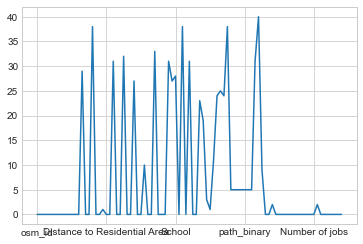

In [1399]:
df_dynamic1.isnull().sum().plot()


In [1400]:
# We do not have any null point. lets plot the map
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeplerGl()

In [1401]:
#cols = df_dynamic1.columns
#df_dynamic1[cols[1:]] = df_dynamic1[cols[1:]].astype(str).astype(float)
#df_dynamic1

In [1402]:
#from shapely import wkt
#df_dynamic1['str_geom'] = df_dynamic1.geometry.apply(lambda x: wkt.dumps(x))
#df_dynamic1=df_dynamic1.drop(['geometry'],axis=1)
#df_dynamic1
#df_dynamic1.rename(columns={'str_geom':'geometry'}, inplace=True)
#df_dynamic1

In [1403]:
#df_dynamic1.dtypes

In [1404]:
#df_dynamic2=df_dynamic1.drop(["geometry"],axis=1)
#df_dynamic3=df_dynamic1.copy()
#df_dynamic3['geometry'] = df_dynamic3['geometry'].apply(shapely.geometry.shape)
#df_dynamic3

In [1405]:
# Load a map with data and config and height
from keplergl import KeplerGl
data=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/keplergl_eco_short_2019_Boulder_circular_0.75_mile_buffer.csv")
data=data.fillna('0')
map_2 = KeplerGl(height=500, data={"data_1":data})
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':          osm_id  site_id sensor_type        AADBT     stv_adb  stv_c_adb  \
0   38550…

In [1406]:
data.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT     stv_adb  stv_c_adb  \
0  385509341.0  P001BOU   permanent  206.745402  102.547945  14.027397   
1   43176757.0  P002BOU   permanent  479.543452   29.739726  10.452055   
2  439968204.0  P003BOU   permanent  607.273809   52.397260  16.424658   
3   43313642.0  P004BOU   permanent  502.851786   29.904110   9.972603   
4   46148772.0  P005BOU   permanent  601.530238   20.808219   9.095890   

   stl_raw  Total Commuter  Bike Commuter  Percentage of Bike Commuter  ...  \
0    218.0     1112.792256      59.918363                     5.384506  ...   
1   5359.0     9618.058227    1052.109026                    10.938892  ...   
2   4518.0     8173.684499    1126.429927                    13.781177  ...   
3   3750.0     8774.871073    1176.175915                    13.403911  ...   
4   2382.0     9675.615170    1167.052352                    12.061790  ...   

   employment_density  Number of jobs     slope  Temp_avg   Hum_avg   \
0          614.597196     1040.020452  2.924330  47.49533  60.606044   
1         5710.211261    13142.499832  2.245705  47.49533  60.606044   
2         4861.308506    14990.571931  1.503059  47.49533  60.606044   
3         5255.869472    19684.113930  1.619984  47.49533  60.606044   
4         5811.074167    21414.023790  2.620478  47.49533  60.606044   

   Precipitation  osm_id_sensor         Lon        Lat  \
0       0.021209    385509341.0 -105.283132  40.068772   
1       0.021209     43176757.0 -105.263103  40.012846   
2       0.021209    439968204.0 -105.263773  40.024197   
3       0.021209     43313642.0 -105.263097  40.019358   
4       0.021209     46148772.0 -105.278436  40.017376   

                                            geometry  
0  POLYGON ((-105.2689832041993 40.06874421647863...  
1  POLYGON ((-105.2489654183381 40.01281591156852...  
2  POLYGON ((-105.2496325641003 40.02416689353465...  
3  POLYGON ((-105.248957968032 40.01932769075783,...  
4  POLYGON ((-105.2642977722615 40.01734796127062...  

[5 rows x 89 columns]

In [1407]:
# save as htm file
map_2.save_to_html(file_name="Boulder_Eco_2019_short_keplergl_circular_0.75__mile_buffer.html")

Map saved to Boulder_Eco_2019_short_keplergl_circular_0.75__mile_buffer.html!


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1408]:
#conda list ipython

In [1409]:
end = time.time()
print("Total Run Time:", end - start)

Total Run Time: 966.3885748386383


# Keplergl Dynamic map is done----END

# Run Random Forest to filter the variables

# Run Negative Binomial Model to predict the AADBT